# 0. 라이브러리 임포트

In [1]:
import numpy as np # 넘파이
import matplotlib.pyplot as plt # 매트플롯립
import pandas as pd # 판다스(csv)
import re # 정규식 표현

# 텐서플로우
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tqdm import tqdm

In [2]:
# 더 많은 특성을 보기 위한 설정
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [3]:
# 불러오기
train = pd.read_csv('/Users/minguinho/Documents/인공지능 대회 데이터/쿠아이 노트북 가격 예측/Adv_IMC_train.csv')
test = pd.read_csv('/Users/minguinho/Documents/인공지능 대회 데이터/쿠아이 노트북 가격 예측/Adv_IMC_test.csv')
print(train.shape, test.shape)

(1042, 12) (261, 11)


훈련 데이터에는 가격이 포함되어있으니 이를 제외하면 노트북을 나타내는 특성은 총 11개가 있다는 사실을 알 수 있다. 
<br>
어떤 특성이 있는지 알아보자

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1025 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight            1042 non-null   object 
 11  price             1042 non-null   float64
dtypes: float64(2), object(10)
memory usage: 97.8+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight            261 non-null    object 
dtypes: float64(1), object(10)
memory usage: 22.6+ KB


특성은 [제조사, 제품명, 노트북 타입, 화면 크기, 해상도, Cpu, 램, 저장장치, 그래픽카드, 운영체제, 무게]가 있다. 
<br>
그리고 데이터를 살펴본 결과, train파일에 결측치가 있다. 결측치가 있는 샘플을 살펴보자.

In [5]:
train[train['Inches'].isna()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
1,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,NaN,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.00
8,Dell,Inspiron 5379,2 in 1 Convertible,NaN,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,869.01
18,Asus,ROG Strix,Gaming,NaN,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.3kg,1655.00
25,Dell,Inspiron 3567,Notebook,NaN,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90
50,HP,ProBook 450,Notebook,NaN,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,2.1kg,1159.00
70,Asus,VivoBook S15,Ultrabook,NaN,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg,1049.90
73,Lenovo,Thinkpad E570,Notebook,NaN,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.3kg,1011.99
97,HP,17-bs001nv (i5-7200U/6GB/2TB/Radeon,Notebook,NaN,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,2TB HDD,AMD Radeon 520,Windows 10,2.71kg,699.00
219,Apple,MacBook Pro,Ultrabook,NaN,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
251,Lenovo,IdeaPad Y700-15ACZ,Gaming,NaN,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16GB,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.5kg,999.00


이 제품들은 시중에 다 파는 제품들이다. 그래서 인터넷에 노트북 이름을 검색하면 화면 크기를 알 수 있다. 
<br>
그래서 나는 인터넷에 나온 정보를 이용해 직접 결측치를 채우기로 했다. 

In [4]:
train['Inches'][1] = 15.6
train['Inches'][8] = 13.3
train['Inches'][18] = 15.6
train['Inches'][25] = 15.6
train['Inches'][50] = 15.6
train['Inches'][70] = 15.6
train['Inches'][73] = 15.6
train['Inches'][97] = 17.3
train['Inches'][219] = 15.4
train['Inches'][251] = 15.6
train['Inches'][298] = 15.6
train['Inches'][315] = 15.6
train['Inches'][500] = 15.6
train['Inches'][530] = 15.6
train['Inches'][630] = 15.6
train['Inches'][644] = 15.6
train['Inches'][648] = 15.6

결측치가 채워졌는지 확인해보자

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1042 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight            1042 non-null   object 
 11  price             1042 non-null   float64
dtypes: float64(2), object(10)
memory usage: 97.8+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight            261 non-null    object 
dtypes: float64(1), object(10)
memory usage: 22.6+ KB


결측치가 다 채워졌다. 이제 데이터를 분석해보자. 

# 1. 데이터 분석

## 1-1. 제조사

In [27]:
# 총 19개의 제조사가 있다.
train.groupby(['Company'], as_index=False)['price'].count()

,Company,price
0,Acer,82
1,Apple,19
2,Asus,130
3,Chuwi,3
4,Dell,229
5,Fujitsu,1
6,Google,3
7,HP,215
8,Huawei,1
9,LG,3


Lenovo, Dell, HP 제품이 각각 200개 이상 있다. 제조사별 평균 가격을 알아보자

In [28]:
train.groupby(['Company'], as_index=False)['price'].mean()

,Company,price
0,Acer,615.462317
1,Apple,1546.277368
2,Asus,1084.481769
3,Chuwi,314.296667
4,Dell,1227.100961
5,Fujitsu,799.000000
6,Google,1677.666667
7,HP,1068.984558
8,Huawei,1499.000000
9,LG,2099.000000


In [ ]:
Razer사의 노트북이 제일 비싸다. 그 다음은 LG에서 만든 노트북이 제일 비싸다는 사실도 확인할 수 있다. 

## 1-2. 노트북 타입

In [22]:
train.groupby(['TypeName'], as_index=False)['price'].count() # 노트북 종류는 6개다.

,TypeName,price
0,2 in 1 Convertible,91
1,Gaming,166
2,Netbook,24
3,Notebook,574
4,Ultrabook,163
5,Workstation,24


In [29]:
train.groupby(['TypeName'], as_index=False)['price'].mean()

,TypeName,price
0,2 in 1 Convertible,1342.035055
1,Gaming,1723.960723
2,Netbook,650.745833
3,Notebook,772.223972
4,Ultrabook,1563.751595
5,Workstation,2236.106250


노트북 형태에 따른 가격 차이가 꽤 많이 난다. 게이밍, 워크스테이션 등 더 많은 작업량을 소화할 수 있는 노트북일수록 높은 가격대가 형성되었다는걸 알 수 있다. 

## 1-3. 화면 크기, 해상도

In [23]:
train.groupby(['Inches'], as_index=False)['price'].count() # 화면 크키가 굉장히 세세하게 나눠져있다.

,Inches,price
0,10.1,4
1,11.3,1
2,11.6,27
3,12.0,5
4,12.3,5
5,12.5,36
6,13.0,1
7,13.3,133
8,13.5,4
9,13.9,5


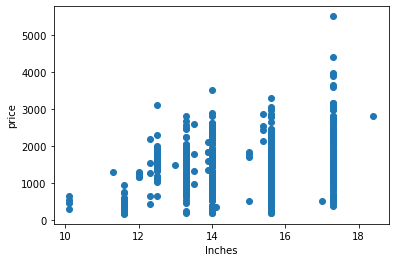

In [50]:
# 그래프로 확인해보자 
plt.scatter(train['Inches'],train['price'])
plt.xlabel('Inches')
plt.ylabel('price')
plt.show()

화면이 클 수록 가격의 상한선이 높다. 화면 크기가 가격 형성에 어느정도 영향을 미친다는 사실을 알 수 있다. 

<br>
이번에는 10~11인치, 12인치, 13인치, 14인치, 15인치, 17~18인치로 그룹을 나눠서 각 그룹별로 데이터를 살펴보자.  

In [8]:
train[(train['Inches'] >= 10.0) & (train['Inches'] < 12.0)].head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
28,Acer,TravelMate B,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,128GB SSD,Intel HD Graphics 400,Windows 10,1.4kg,435.0
67,Apple,MacBook Air,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4GB,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08kg,959.0
109,Samsung,Chromebook 3,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15kg,269.0
164,Lenovo,Yoga 11e,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Quad Core N3450 1.1GHz,4GB,128GB SSD,Intel HD Graphics 500,Windows 10,1.59kg,553.0
167,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,275.0
169,Acer,TravelMate B,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.4kg,485.0
224,Dell,Chromebook 11,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26kg,295.0
265,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.0
268,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,549.0
333,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.0


생각보다 가격 범위가 넓어서 놀랐다. 
<br>
화면이 작아서 그런지 화면 해상도가 낮은 노트북이 많고 이 중 FHD 해상도를 지닌 노트북의 평균 가격이 1366 * 768 해상도를 지닌 노트북보다 더 높은 가격대를 형성한다는 사실을 관측할 수 있다. 
<br>
해상도를 기준으로 노트북을 분류하고 싶지만 Touchscreen, IPS Panel 등 화면의 특징이 추가로 설명되어 있어 이를 분류하는 작업을 해야 해상도를 기준으로 노트북을 분류할 수 있다.
<br>
그러니 데이터를 가공할 때 ScreenResolution을 Panel종류, TouchSceen 유무, 해상도로 구분지어야겠다. 

In [9]:
train[(train['Inches'] >= 12.0) & (train['Inches'] < 13.0)].head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
4,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0
6,Google,Pixelbook (Core,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,1559.0
13,Dell,Latitude E5270,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.5kg,1413.1
16,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,1279.0
31,Lenovo,ThinkPad X270,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1429.0
55,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.26kg,1539.0
74,Lenovo,ThinkPad Yoga,Netbook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1650.0
89,HP,Elitebook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1335.0
116,HP,EliteBook Folio,Netbook,12.5,Full HD 1920x1080,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,0.97kg,1908.0
137,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,1159.0


12인치 노트북 데이터. 11인치 노트북 데이터에서 확인한 부분에서 화면에 관한 또다른 정보는 보이지 않는다. 
<br> 
더 큰 화면의 노트북에서도 화면에 관해선 추가적인 정보를 얻지 못할거라 판단해 다른 특성을 살펴보기로 했다. 

## 1-4. CPU

In [40]:
train.groupby(['Cpu'], as_index=False)['price'].mean()

,Cpu,price
0,AMD A10-Series 9600P 2.4GHz,569.000000
1,AMD A10-Series 9620P 2.5GHz,617.005000
2,AMD A10-Series A10-9620P 2.5GHz,571.950000
3,AMD A12-Series 9720P 2.7GHz,659.000000
4,AMD A12-Series 9720P 3.6GHz,625.666667
...,...,...
98,Intel Pentium Quad Core N3710 1.6GHz,403.665556
99,Intel Pentium Quad Core N4200 1.1GHz,426.525385
100,Intel Xeon E3-1505M V6 3GHz,3055.000000
101,Intel Xeon E3-1535M v5 2.9GHz,4389.000000


종류가 엄청 많다. 허나 자세히 보면 [제조사 + 모델명 + 클럭 수]로 Cpu가 구성되어있다. 
<br>
Cpu는 제조사, 모델 명, 클럭 수로 분류할 계획이다. 

## 1-5. Ram

In [41]:
train.groupby(['Ram'], as_index=False)['price'].mean()

,Ram,price
0,12GB,1283.046842
1,16GB,1942.756587
2,24GB,2675.000000
3,2GB,240.981250
4,32GB,3308.871667
5,4GB,572.971161
6,64GB,3975.000000
7,6GB,636.753939
8,8GB,1193.767324


Ram은 다행히도 용량 옆에 GB만 붙어있다. 용량이 클 수록 평균 가격이 높은 선형적인 구조라 데이터 가공하는게 매우 쉬울거라 예상된다. 

## 1-6. 저장공간

In [42]:
train.groupby(['Memory'], as_index=False)['price'].mean()

,Memory,price
0,1.0TB HDD,659.000000
1,1.0TB Hybrid,750.807500
2,128GB Flash Storage,707.985000
3,128GB HDD,590.000000
4,128GB SSD,736.386667
5,128GB SSD + 1TB HDD,1240.850641
6,128GB SSD + 2TB HDD,977.950000
7,16GB Flash Storage,348.816667
8,16GB SSD,224.333333
9,180GB SSD,1032.250000


종류가 꽤나 다양하다. 그래도 자세히 보면 [용량 + 저장 공간 종류]임을 알 수 있다. 
<br>
용량은 앞서 RAM에서 확인했듯 클 수록 평균 가격이 높다는걸 확인할 수 있다. 여기서 주목하고 싶은건 저장장치의 종류다. 저장장치의 종류가 SSD, HDD, Flash Storage, Hybrid가 있다. 
<br>
이 중 하나만 있는 노트북이 있고 HDD + SSD와 같이 같이 달려있는 노트북도 있다. 그래서 나는 저장장치 특성을 HDD, SSD, Flash Storage, Hybrid로 나눈 뒤 "각 요소의 값이 얼마인가?"를 나타낼 계획이다.
<br>
예 : HDD = 500, SSD = 250, Flash_Storage = 0, Hybrid = 0

## 1-7. GPU

In [43]:
train.groupby(['Gpu'], as_index=False)['price'].mean()

,Gpu,price
0,AMD FirePro W4190M,1495.000000
1,AMD FirePro W4190M,1269.000000
2,AMD FirePro W5130M,1369.000000
3,AMD R17M-M1-70,813.000000
4,AMD R4 Graphics,399.000000
...,...,...
97,Nvidia Quadro M3000M,3949.400000
98,Nvidia Quadro M500M,2050.380000
99,Nvidia Quadro M520M,2577.000000
100,Nvidia Quadro M620,1959.666667


무려 103개나 존재한다. 허나 이도 Cpu와 비슷하게 제조사, 모델명으로 이루어져있다. 
<br>
그래서 Gpu도 제조사, 모델명으로 나눌 계획이다. 

## 1-8. 운영체제

In [44]:
train.groupby(['OpSys'], as_index=False)['price'].mean()

,OpSys,price
0,Android,434.000000
1,Chrome OS,574.734783
2,Linux,598.496275
3,Mac OS X,1262.871250
4,No OS,577.663333
5,Windows 10,1172.867741
6,Windows 10 S,1222.498333
7,Windows 7,1700.307750
8,macOS,1752.390909


크게 나눠보면
<br>
1. 운영체제 미설치
<br>
2. 윈도우
<br>
3. 맥 os
<br>
4. 리눅스
<br>
5. 안드로이드
<br>
로 나뉜다. 이 때 윈도우는 7, 10, 10 S가 있는데 비교적 최신 운영체제인 윈도우 10이 설치되었다고 해서 윈도우 7이 설치된 노트북보다 비싼게 아니라 오히려 저렴하다. 
<br>
그리고 윈도우 10이랑 윈도우 10 S의 차이는 윈도우 10S가 윈도우 10보다 속도도 더 빠르고 안정된 OS라고 한다. 그래서 윈도우 10S, 윈도우10은 합치지 말고 구분짓는게 더 낫다고 본다. 차이가 있다는 뜻이니까. 
<br>
그리고 macOS와 Mac OS X는 같은 운영체제이므로 추후 데이터를 가공할 때 같은 운영체제라고 처리할거다. 

## 1-9. 무게

In [47]:
train.groupby(['Weight'], as_index=False)['price'].mean()

,Weight,price
0,0.69kg,498.317500
1,0.91kg,1950.000000
2,0.920kg,1226.750000
3,0.92kg,1262.400000
4,0.97kg,1961.000000
...,...,...
165,4.42kg,2876.378182
166,4.4kg,2799.000000
167,4.6kg,2706.495000
168,4.7kg,3890.000000


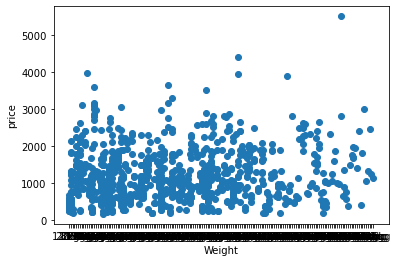

In [49]:
# 가격이 매우 다양하다. 그러니 그래프로 확인해보자.
plt.scatter(train['Weight'],train['price'])
plt.xlabel('Weight')
plt.ylabel('price')
plt.show()

무게가 무겁다고 더 비싸고 뭐 그런건 없다. 특별한 샘플을 제외하면 골고루 퍼져있다. 
<br>
무게 특성은 제일 무거운 무게를 기준으로 일반화 해야겠다. 

데이터를 다 살펴봤다. 이제 데이터를 가공해보겠다. 

# 2. 데이터 가공

## 2-1. 제조사
<br>

같은 성능의 노트북이여도 제조사에 따라 A/S, 이미지 등이 다르며 이는 가격 형성에 영향을 준다. 
<br>
그렇다고 제조사 별로 급이 나눠진 것도 아니고 하니 제조사 특성을 원-핫 인코딩으로 가공하기로 했다. 

In [5]:
train.insert(0, 'Company_Acer', 0) 
train.insert(1, 'Company_Apple', 0)
train.insert(2, 'Company_Asus', 0)
train.insert(3, 'Company_Chuwi', 0)
train.insert(4, 'Company_Dell', 0)
train.insert(5, 'Company_Fujitsu', 0)
train.insert(6, 'Company_Google', 0)
train.insert(7, 'Company_HP', 0)
train.insert(8, 'Company_Huawei', 0)
train.insert(9, 'Company_LG', 0) 
train.insert(10, 'Company_Lenovo', 0) 
train.insert(11, 'Company_MSI', 0) 
train.insert(12, 'Company_Mediacom', 0) 
train.insert(13, 'Company_Microsoft', 0) 
train.insert(14, 'Company_Razer', 0) 
train.insert(15, 'Company_Samsung', 0)
train.insert(16, 'Company_Toshiba', 0) 
train.insert(17, 'Company_Vero', 0)  
train.insert(18, 'Company_Xiaomi', 0) 

for i in range(0, len(train)):
    if train['Company'][i] == 'Acer':
        train['Company_Acer'][i] = 1
    elif train['Company'][i] == 'Apple':
        train['Company_Apple'][i] = 1
    elif train['Company'][i] == 'Asus':
        train['Company_Asus'][i] = 1
    elif train['Company'][i] == 'Chuwi':
        train['Company_Chuwi'][i] = 1
    elif train['Company'][i] == 'Dell':
        train['Company_Dell'][i] = 1
    elif train['Company'][i] == 'Fujitsu':
        train['Company_Fujitsu'][i] = 1
    elif train['Company'][i] == 'Google':
        train['Company_Google'][i] = 1
    elif train['Company'][i] == 'HP':
        train['Company_HP'][i] = 1
    elif train['Company'][i] == 'Huawei':
        train['Company_Huawei'][i] = 1
    elif train['Company'][i] == 'LG':
        train['Company_LG'][i] = 1
    elif train['Company'][i] == 'Lenovo':
        train['Company_Lenovo'][i] = 1
    elif train['Company'][i] == 'MSI':
        train['Company_MSI'][i] = 1
    elif train['Company'][i] == 'Mediacom':
        train['Company_Mediacom'][i] = 1
    elif train['Company'][i] == 'Microsoft':
        train['Company_Microsoft'][i] = 1
    elif train['Company'][i] == 'Razer':
        train['Company_Razer'][i] = 1
    elif train['Company'][i] == 'Samsung':
        train['Company_Samsung'][i] = 1
    elif train['Company'][i] == 'Toshiba':
        train['Company_Toshiba'][i] = 1
    elif train['Company'][i] == 'Vero':
        train['Company_Vero'][i] = 1
    elif train['Company'][i] == 'Xiaomi':
        train['Company_Xiaomi'][i] = 1


# 테스트 데이터도 추가
test.insert(0, 'Company_Acer', 0) 
test.insert(1, 'Company_Apple', 0)
test.insert(2, 'Company_Asus', 0)
test.insert(3, 'Company_Chuwi', 0)
test.insert(4, 'Company_Dell', 0)
test.insert(5, 'Company_Fujitsu', 0)
test.insert(6, 'Company_Google', 0)
test.insert(7, 'Company_HP', 0)
test.insert(8, 'Company_Huawei', 0)
test.insert(9, 'Company_LG', 0) 
test.insert(10, 'Company_Lenovo', 0) 
test.insert(11, 'Company_MSI', 0) 
test.insert(12, 'Company_Mediacom', 0) 
test.insert(13, 'Company_Microsoft', 0) 
test.insert(14, 'Company_Razer', 0) 
test.insert(15, 'Company_Samsung', 0)
test.insert(16, 'Company_Toshiba', 0) 
test.insert(17, 'Company_Vero', 0)  
test.insert(18, 'Company_Xiaomi', 0) 

for i in range(0, len(test)):
    if test['Company'][i] == 'Acer':
        test['Company_Acer'][i] = 1
    elif test['Company'][i] == 'Apple':
        test['Company_Apple'][i] = 1
    elif test['Company'][i] == 'Asus':
        test['Company_Asus'][i] = 1
    elif test['Company'][i] == 'Chuwi':
        test['Company_Chuwi'][i] = 1
    elif test['Company'][i] == 'Dell':
        test['Company_Dell'][i] = 1
    elif test['Company'][i] == 'Fujitsu':
        test['Company_Fujitsu'][i] = 1
    elif test['Company'][i] == 'Google':
        test['Company_Google'][i] = 1
    elif test['Company'][i] == 'HP':
        test['Company_HP'][i] = 1
    elif test['Company'][i] == 'Huawei':
        test['Company_Huawei'][i] = 1
    elif test['Company'][i] == 'LG':
        test['Company_LG'][i] = 1
    elif test['Company'][i] == 'Lenovo':
        test['Company_Lenovo'][i] = 1
    elif test['Company'][i] == 'MSI':
        test['Company_MSI'][i] = 1
    elif test['Company'][i] == 'Mediacom':
        test['Company_Mediacom'][i] = 1
    elif test['Company'][i] == 'Microsoft':
        test['Company_Microsoft'][i] = 1
    elif test['Company'][i] == 'Razer':
        test['Company_Razer'][i] = 1
    elif test['Company'][i] == 'Samsung':
        test['Company_Samsung'][i] = 1
    elif test['Company'][i] == 'Toshiba':
        test['Company_Toshiba'][i] = 1
    elif test['Company'][i] == 'Vero':
        test['Company_Vero'][i] = 1
    elif test['Company'][i] == 'Xiaomi':
        test['Company_Xiaomi'][i] = 1
# 'Cabin' 특성 드랍
train.drop('Company', axis=1, inplace=True)
test.drop('Company', axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       261 non-null    int64  
 1   Company_Apple      261 non-null    int64  
 2   Company_Asus       261 non-null    int64  
 3   Company_Chuwi      261 non-null    int64  
 4   Company_Dell       261 non-null    int64  
 5   Company_Fujitsu    261 non-null    int64  
 6   Company_Google     261 non-null    int64  
 7   Company_HP         261 non-null    int64  
 8   Company_Huawei     261 non-null    int64  
 9   Company_LG         261 non-null    int64  
 10  Company_Lenovo     261 non-null    int64  
 11  Company_MSI        261 non-null    int64  
 12  Company_Mediacom   261 non-null    int64  
 13  Company_Microsoft  261 non-null    int64  
 14  Company_Razer      261 non-null    int64  
 15  Company_Samsung    261 non-null    int64  
 16  Company_Toshiba    261 non

가공이 잘되었다는 사실을 확인할 수 있다. 

## 2-2. 노트북 타입 

노트북 타입별 가격을 다시 한 번 확인해보자 

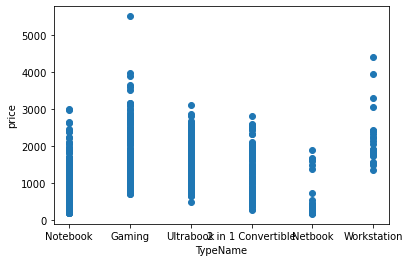

In [56]:
plt.scatter(train['TypeName'],train['price'])
plt.xlabel('TypeName')
plt.ylabel('price')
plt.show()

In [57]:
train.groupby(['TypeName'], as_index=False)['price'].mean()

,TypeName,price
0,2 in 1 Convertible,1342.035055
1,Gaming,1723.960723
2,Netbook,650.745833
3,Notebook,772.223972
4,Ultrabook,1563.751595
5,Workstation,2236.106250


게이밍, 워크스테이션 노트북이 좀 비싼 가격에 형성되어있고 노트북, 울트라북, 2 in 1 노트북은 비슷한 가격대를, 넷북은 낮은 가격대의 노트북들이 많이 있다. 
<br>
근데 노트북 종류가 가격 형성에 영향을 끼치는걸까? 이를 확인해보자. 

In [86]:
train[train['TypeName'] == '2 in 1 Convertible'].iloc[:5, 2:11]

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
8,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,869.01
17,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.00
19,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
30,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.74kg,629.00
33,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,1TB SSD,Intel UHD Graphics 620,Windows 10,1.29kg,2449.00


In [87]:
train[train['TypeName'] == 'Gaming'].iloc[:5, 2:11]

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
3,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
9,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,2415.0
10,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.0
14,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2699.0
18,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.3kg,1655.0


우선 2 in 1 노트북과 게이밍 노트북을 비교해보자. 화면 종류, Cpu 등 모든 부분에서 게이밍 노트북이 더 뛰어난 제품을 쓰고있다는 걸 확인할 수 있다. 
<br>
노트북의 종류가 달라서 다른 가격이 형성된게 아니라 부착된 부품이 어떻냐에 따라 가격이 다르며 부착된 부품에 따른 노트북의 속도, 배터리 타임, 무게 등에 따라 이 노트북은 울트라 북이니, 게이밍 노트북이니 등의 이름을 지어줬을 거라 생각된다. 
<br>
그래서, 나는 TypeName 특성은 제외하기로 했다. 

In [6]:
train.drop('TypeName', axis=1, inplace=True)
test.drop('TypeName', axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product            261 non-null    object 
 1   Inches             261 non-null    float64
 2   ScreenResolution   261 non-null    object 
 3   Cpu                261 non-null    object 
 4   Ram                261 non-null    object 
 5   Memory             261 non-null    object 
 6   Gpu                261 non-null    object 
 7   OpSys              261 non-null    object 
 8   Weight             261 non-null    object 
 9   Company_Acer       261 non-null    int64  
 10  Company_Apple      261 non-null    int64  
 11  Company_Asus       261 non-null    int64  
 12  Company_Chuwi      261 non-null    int64  
 13  Company_Dell       261 non-null    int64  
 14  Company_Fujitsu    261 non-null    int64  
 15  Company_Google     261 non-null    int64  
 16  Company_HP         261 non

제대로 처리되었다는 사실을 알 수 있다. 

## 2-3. 화면 크기

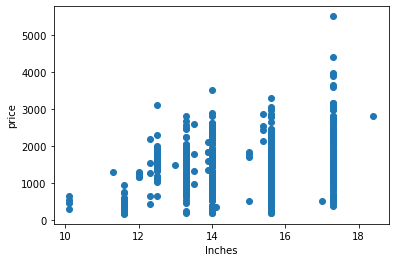

In [93]:
plt.scatter(train['Inches'],train['price'])
plt.xlabel('Inches')
plt.ylabel('price')
plt.show()

그래프를 다시 한 번 보자. 
<br>
앞서 화면이 클 수록 높은 가격의 제품이 존재하는 경향이 있다는 사실을 확인했다. 가장 화면이 큰 노트북의 가격이 생각보다 낮지만 이는 특별한 케이스라 생각된다.
<br>
그러니 화면 크기 특성은 가장 큰 화면을 기준으로 일반화를 할거다. 

In [95]:
train['Inches'].max()

18.4

In [96]:
test['Inches'].max()

17.3

훈련, 테스트 데이터를 통틀어 가장 큰 화면은 18.4인치다. 그러니 모든 화면 크기 데이터를 18.4로 나눠 0~1 사이의 값으로 만들거다. 

In [7]:
train['Inches'] = train['Inches'] / 18.4
test['Inches'] = test['Inches'] / 18.4

In [12]:
train['Inches'].value_counts()

0.847826    525
0.760870    158
0.722826    133
0.940217    127
0.679348     36
0.630435     27
0.755435      5
0.668478      5
0.652174      5
0.548913      4
0.815217      4
0.733696      4
0.836957      4
0.766304      1
0.614130      1
0.923913      1
0.706522      1
1.000000      1
Name: Inches, dtype: int64

In [13]:
test['Inches'].value_counts()

0.847826    140
0.760870     39
0.940217     37
0.722826     31
0.630435      6
0.679348      3
0.733696      2
0.755435      1
0.652174      1
0.706522      1
Name: Inches, dtype: int64

## 2-4. 화면 종류

앞서 확인했듯 ScreenResolution은 [패널 종류, 터치유무, 해상도]로 나뉜다. 
<br>
그러니 ScreenResolution을 분리해보자. 

In [107]:
list_str = test['ScreenResolution'][0].split(' ')
list_str

['IPS', 'Panel', 'Full', 'HD', '1920x1080']

In [113]:
list_str = test['ScreenResolution'][256].split(' ')
list_str[:-1]

['IPS', 'Panel', 'Full', 'HD', '/', 'Touchscreen']

In [108]:
test['ScreenResolution']

0                    IPS Panel Full HD 1920x1080
1                    IPS Panel Full HD 1920x1080
2                              Full HD 1920x1080
3                    IPS Panel Full HD 1920x1080
4                                       1366x768
                         ...                    
256    IPS Panel Full HD / Touchscreen 1920x1080
257                            Full HD 1920x1080
258                            Full HD 1920x1080
259                  IPS Panel Full HD 2560x1440
260                  IPS Panel Full HD 1920x1080
Name: ScreenResolution, Length: 261, dtype: object

띄어쓰기를 기준으로 문자열을 나눠봤다. 그리고 전체 'ScreenResolution' 특성을 확인해보니 해상도는 언제나 문자열의 마지막에 있다는 사실을 알 수 있었다. 
<br>
그래서 기존의 ScreenResolution 특성엔 터치 유무 등 다른 성질도 들어가있으니 해상도를 뺀 나머지 문자열로 바꾼 뒤 'Screen'으로 하고 해상도를 'Resolution' 특성에 넣을거다. 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [8]:
train.insert(21, 'Resolution', 0) 
train.insert(22, 'Screen', 0)

train['Resolution'] = 0
train['Screen'] = 0
for i in range(0, len(train)):
    list_str = train['ScreenResolution'][i].split(' ')
    train['Resolution'][i] = list_str[-1]
    train['Screen'][i] = ' '.join(list_str[:-1])


test.insert(21, 'Resolution', 0) 
test.insert(22, 'Screen', 0)
for i in range(0, len(test)):
    list_str = test['ScreenResolution'][i].split(' ')
    test['Resolution'][i] = list_str[-1]
    test['Screen'][i] = ' '.join(list_str[:-1])

# 기존의 'ScreenResolution' 특성은 드랍한다. 
train.drop('ScreenResolution', axis=1, inplace=True)
test.drop('ScreenResolution', axis=1, inplace=True)

In [10]:
train[:5]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution,Screen,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,250 G6,0.847826,1366x768,,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X541NA (N3350/4GB/1TB/FHD/W10),0.847826,1920x1080,Full HD,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15-AC110nv (i7-6500U/6GB/1TB/Radeon,0.847826,1366x768,,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 7559,0.847826,3840x2160,IPS Panel Touchscreen / 4K Ultra HD,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Blade Stealth,0.679348,3840x2160,IPS Panel 4K Ultra HD / Touchscreen,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


In [16]:
train['Resolution'].value_counts()

1920x1080    669
1366x768     241
3840x2160     34
3200x1800     23
1600x900      22
2560x1440     21
2304x1440      5
2560x1600      5
2400x1600      4
1440x900       4
2256x1504      4
2880x1800      4
1920x1200      4
2736x1824      1
2160x1440      1
Name: Resolution, dtype: int64

In [17]:
test['Resolution'].value_counts()

1920x1080    172
1366x768      67
3840x2160      9
3200x1800      4
2256x1504      2
2560x1440      2
2304x1440      1
1600x900       1
2560x1600      1
2160x1440      1
1920x1200      1
Name: Resolution, dtype: int64

잘 가공되었다. 
<br>
이제 터치 스크린이 포함된 노트북들을 살펴보자. 

In [18]:
train[train['Screen'].str.contains('Touchscreen')]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution,Screen,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 7559,0.847826,3840x2160,IPS Panel Touchscreen / 4K Ultra HD,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.00
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Blade Stealth,0.679348,3840x2160,IPS Panel 4K Ultra HD / Touchscreen,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.00
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Pixelbook (Core,0.668478,2400x1600,Touchscreen,Intel Core i5 7Y57 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,1559.00
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 5379,0.722826,1920x1080,Full HD / Touchscreen,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,869.01
17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 5579,0.847826,1920x1080,Full HD / Touchscreen,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,ProBook x360,0.630435,1366x768,Touchscreen,Intel Pentium Quad Core N4200 1.1GHz,4GB,256GB SSD,Intel HD Graphics 505,Windows 10,1.45kg,775.00
1012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,XPS 13,0.722826,1920x1080,IPS Panel Full HD / Touchscreen,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,899.00
1013,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Yoga Book,0.548913,1920x1200,IPS Panel Touchscreen,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69kg,646.27
1026,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Yoga 920-13IKB,0.755435,3840x2160,IPS Panel 4K Ultra HD / Touchscreen,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,2099.00


Screen 특성이 문자열이라 contains()로 터치스크린 유무를 확인할 수 있다. 

In [16]:
train[train['Screen'].str.contains('IPS')]

,Product,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Company_Acer,...,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Resolution,Screen
3,Inspiron 7559,0.847826,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.00,0,...,0,0,0,0,0,0,0,0,3840x2160,IPS Panel Touchscreen / 4K Ultra HD
4,Blade Stealth,0.679348,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.00,0,...,0,0,0,1,0,0,0,0,3840x2160,IPS Panel 4K Ultra HD / Touchscreen
7,Gram 15Z975,0.847826,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.09kg,2299.00,0,...,0,0,0,0,0,0,0,0,1920x1080,IPS Panel Full HD
10,ROG G701VO,0.940217,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.00,0,...,0,0,0,0,0,0,0,0,1920x1080,IPS Panel Full HD
14,Alienware 17,0.940217,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2699.00,0,...,0,0,0,0,0,0,0,0,1920x1080,IPS Panel Full HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Alienware 17,0.940217,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,3154.00,0,...,0,0,0,0,0,0,0,0,3840x2160,IPS Panel 4K Ultra HD
1024,Thinkpad X1,0.760870,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.13kg,2282.00,0,...,0,0,0,0,0,0,0,0,2560x1440,IPS Panel
1026,Yoga 920-13IKB,0.755435,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,2099.00,0,...,0,0,0,0,0,0,0,0,3840x2160,IPS Panel 4K Ultra HD / Touchscreen
1040,ThinkPad E570,0.847826,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,850.66,0,...,0,0,0,0,0,0,0,0,1920x1080,IPS Panel Full HD


같은 방법으로 IPS Panel 유무도 확인할 수 있다. 
<br>
그러니 IPS Panel, TouchScreen 특성을 만든 뒤 1, 0의 값을 주도록 하자.
<br>
4K Ultra HD 등의 특징도 있지만 이는 Resolution에 숫자로 나타나 있으니 무시하기로 했다.  

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [9]:
train.insert(22, 'IPS_Panel', 0) 
train.insert(23, 'TouchScreen', 0)

for i in range(0, len(train)):
    screen_str = train['Screen'][i]
    if "IPS" in screen_str :
        train['IPS_Panel'][i] = 1
    if "Touchscreen" in screen_str :
        train['TouchScreen'][i] = 1

test.insert(22, 'IPS_Panel', 0) 
test.insert(23, 'TouchScreen', 0)

for i in range(0, len(test)):
    screen_str = test['Screen'][i]
    if "IPS" in screen_str :
        test['IPS_Panel'][i] = 1
    if "Touchscreen" in screen_str :
        test['TouchScreen'][i] = 1

# # 기존의 'Screen' 특성은 드랍한다. 
train.drop('Screen', axis=1, inplace=True)
test.drop('Screen', axis=1, inplace=True)

In [12]:
train[:5]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution,IPS_Panel,TouchScreen,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,250 G6,0.847826,1366x768,0,0,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.9
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X541NA (N3350/4GB/1TB/FHD/W10),0.847826,1920x1080,0,0,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15-AC110nv (i7-6500U/6GB/1TB/Radeon,0.847826,1366x768,0,0,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 7559,0.847826,3840x2160,1,1,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72kg,1099.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Blade Stealth,0.679348,3840x2160,1,1,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0


In [18]:
train['IPS Panel'].value_counts()

0    752
1    290
Name: IPS Panel, dtype: int64

In [21]:
train['TouchScreen'].value_counts()

0    888
1    154
Name: TouchScreen, dtype: int64

In [19]:
test['IPS Panel'].value_counts()

0    186
1     75
Name: IPS Panel, dtype: int64

In [22]:
test['TouchScreen'].value_counts()

0    223
1     38
Name: TouchScreen, dtype: int64

잘 나온다. 이제 해상도를 알아보자. 

In [23]:
train.groupby(['Resolution'], as_index=False)['price'].max()

,Resolution,price
0,1366x768,1895.00
1,1440x900,1158.70
2,1600x900,1860.99
3,1920x1080,4389.00
4,1920x1200,646.27
5,2160x1440,1499.00
6,2256x1504,2589.00
7,2304x1440,1300.00
8,2400x1600,2199.00
9,2560x1440,2824.00


깔끔하게 15가지 해상도가 나온다. 

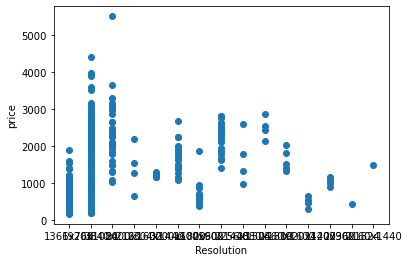

In [22]:
plt.scatter(train['Resolution'],train['price'])
plt.xlabel('Resolution')
plt.ylabel('price')
plt.show()

그런데 해상도가 높다고 가격이 꼭 높은건 아니다. FHD(1920 * 1080) 해상도일 때 노트북 가격이 가장 높게 나오는데 이는 높은 가격대에 형성된 게이밍, 워크스테이션 노트북들이 지니는 해상도가 FHD인 경우가 많아서 그런게 아닌가 싶다. 
<br>
그렇다고 해상도 특성이 학습에 도움이 안된다고 버릴 수는 없다. 왜냐하면 

In [27]:
train.groupby(['Resolution'], as_index=False)['price'].mean()

,Resolution,price
0,1366x768,539.198382
1,1440x900,1038.660000
2,1600x900,663.497273
3,1920x1080,1226.942526
4,1920x1200,498.317500
5,2160x1440,1499.000000
6,2256x1504,1679.250000
7,2304x1440,1233.880000
8,2400x1600,1423.000000
9,2560x1440,2268.419524


해상도별 평균값을 봤을 때 고해상도일 수록 평균값이 높은 경향을 보이기 때문이다. 저해상도 노트북의 평균값과 고해상도 노트북의 평균값을 따로 살펴보면 확인할 수 있다. 
<br>
그렇다고 15종류의 원-핫 인코딩으로 분류할 정도는 아니라 생각되므로 몇개씩 묶어 5개의 그룹으로 나눈 뒤 0, 0.25, 0.5, 0.5, 1의 값을 부여할거다. 

In [30]:
train.groupby(['Resolution'], as_index=False)['price'].count()

,Resolution,price
0,1366x768,241
1,1440x900,4
2,1600x900,22
3,1920x1080,669
4,1920x1200,4
5,2160x1440,1
6,2256x1504,4
7,2304x1440,5
8,2400x1600,4
9,2560x1440,21


3개씩 묶으면 되겠다. 

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [10]:
train.insert(21, 'Resolution_group', 0.0) 

for i in range(0, len(train)):
    if (train['Resolution'][i] == '1920x1080') or (train['Resolution'][i] == '1920x1200') or (train['Resolution'][i] == '2160x1440') :
        train['Resolution_group'][i] = 0.25
    elif (train['Resolution'][i] == '2256x1504') or (train['Resolution'][i] == '2304x1440') or (train['Resolution'][i] == '2400x1600') :
        train['Resolution_group'][i] = 0.5
    elif (train['Resolution'][i] == '2560x1440') or (train['Resolution'][i] == '2560x1600') or (train['Resolution'][i] == '2736x1824') :
        train['Resolution_group'][i] = 0.75
    elif (train['Resolution'][i] == '2880x1800') or (train['Resolution'][i] == '3200x1800') or (train['Resolution'][i] == '3840x2160') :
        train['Resolution_group'][i] = 1

test.insert(21, 'Resolution_group', 0.0) 

for i in range(0, len(test)):
    if (test['Resolution'][i] == '1920x1080') or (test['Resolution'][i] == '1920x1200') or (test['Resolution'][i] == '2160x1440') :
        test['Resolution_group'][i] = 0.25
    elif (test['Resolution'][i] == '2256x1504') or (test['Resolution'][i] == '2304x1440') or (test['Resolution'][i] == '2400x1600') :
        test['Resolution_group'][i] = 0.5
    elif (test['Resolution'][i] == '2560x1440') or (test['Resolution'][i] == '2560x1600') or (test['Resolution'][i] == '2736x1824') :
        test['Resolution_group'][i] = 0.75
    elif (test['Resolution'][i] == '2880x1800') or (test['Resolution'][i] == '3200x1800') or (test['Resolution'][i] == '3840x2160') :
        test['Resolution_group'][i] = 1




# 기존의 'Screen' 특성은 드랍한다. 
train.drop('Resolution', axis=1, inplace=True)
test.drop('Resolution', axis=1, inplace=True)

In [16]:
train['Resolution_group'].value_counts()

0.25    674
0.00    267
1.00     61
0.75     27
0.50     13
Name: Resolution_group, dtype: int64

In [17]:
test['Resolution_group'].value_counts()

0.25    174
0.00     68
1.00     13
0.50      3
0.75      3
Name: Resolution_group, dtype: int64

## 2-5. Ram

이제 램을 분류해보자. 램은 '(숫자) + GB' 양식의 문자열이라 분류가 쉽다.
<br>
Ram의 문자열에서 숫자만 추출해보자.  

In [11]:
for i in range(0, len(train)):
    train['Ram'][i] = int(re.findall("\d+", train['Ram'][i])[0])

for i in range(0, len(test)):
    test['Ram'][i] = int(re.findall("\d+", test['Ram'][i])[0])

데이터를 확인해보자. 

In [28]:
train['Ram'].value_counts()

8     482
4     310
16    167
6      33
12     19
2      16
32     12
24      2
64      1
Name: Ram, dtype: int64

In [28]:
test['Ram'].value_counts()

8     137
4      65
16     33
6       8
2       6
12      6
32      5
24      1
Name: Ram, dtype: int64

제대로 할당되었다. 이제 데이터셋에 있는 최대 램 용량을 기준으로 일반화 해보자. 

In [20]:
train['Ram'].max()

64

In [21]:
test['Ram'].max()

32

 최대 램 용량은 64다. 그러니 모든 Ram 데이터를 64로 나누자. 

In [12]:
train['Ram'] = train['Ram'] / 64
test['Ram'] = test['Ram'] / 64

In [16]:
train['Ram'].value_counts()

0.12500    482
0.06250    310
0.25000    167
0.09375     33
0.18750     19
0.03125     16
0.50000     12
0.37500      2
1.00000      1
Name: Ram, dtype: int64

In [31]:
test['Ram'].value_counts()

0.12500    137
0.06250     65
0.25000     33
0.09375      8
0.03125      6
0.18750      6
0.50000      5
0.37500      1
Name: Ram, dtype: int64

올바르게 일반화 되었다. 

## 2-6. 저장장치

앞서 저장장치는 SSD, HDD, Flash Storage, Hybrid가 있다는 사실을 알아냈다. 
<br>
그래서 저장장치 특성의 문자열을 분석해 이 노트북의 SSD는 얼마인지, HDD는 얼마인지, Flash Storage는 얼마인지, Hybrid는 얼마인지 각각 나타낼거다. 

"Memory" 문자열에서 'SSD' 앞에 있는 문자열이 SSD 용량, 'HDD' 앞에 있는 문자열이 HDD용량, 'Flash' 앞에 있는 문자열이 Flash Storage 용량, 'Hybrid' 앞의 문자열이 Hybrid 용량이다.
<br>
이를 이용해 각 저장장치의 용량만 뽑아보자.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [13]:
train.insert(26, 'SSD_Memory', 0.0) 
train.insert(27, 'HDD_Memory', 0.0) 
train.insert(28, 'Flash_Memory', 0.0) 
train.insert(29, 'Hybrid_Memory', 0.0) 

for i in range(0, len(train)):
    list_str = train['Memory'][i].split(' ')
    if "SSD" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("SSD") - 1] : mutiply_num = 1000
        train['SSD_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("SSD") - 1])[0]) * mutiply_num
    if "HDD" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("HDD") - 1] : mutiply_num = 1000
        train['HDD_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("HDD") - 1])[0]) * mutiply_num
    if "Flash" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("Flash") - 1] : mutiply_num = 1000
        train['Flash_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("Flash") - 1])[0]) * mutiply_num
    if "Hybrid" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("Hybrid") - 1] : mutiply_num = 1000
        train['Hybrid_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("Hybrid") - 1])[0]) * mutiply_num

test.insert(26, 'SSD_Memory', 0.0) 
test.insert(27, 'HDD_Memory', 0.0) 
test.insert(28, 'Flash_Memory', 0.0) 
test.insert(29, 'Hybrid_Memory', 0.0) 

for i in range(0, len(test)):
    list_str = test['Memory'][i].split(' ')
    if "SSD" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("SSD") - 1] : mutiply_num = 1000
        test['SSD_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("SSD") - 1])[0]) * mutiply_num
    if "HDD" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("HDD") - 1] : mutiply_num = 1000
        test['HDD_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("HDD") - 1])[0]) * mutiply_num
    if "Flash" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("Flash") - 1] : mutiply_num = 1000
        test['Flash_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("Flash") - 1])[0]) * mutiply_num
    if "Hybrid" in list_str :
        mutiply_num = 1
        if "TB" in list_str[list_str.index("Hybrid") - 1] : mutiply_num = 1000
        test['Hybrid_Memory'][i] = float(re.findall('\d+', list_str[list_str.index("Hybrid") - 1])[0]) * mutiply_num

# 기존의 'Screen' 특성은 드랍한다. 
train.drop('Memory', axis=1, inplace=True)
test.drop('Memory', axis=1, inplace=True)

In [14]:
print(train['SSD_Memory'].value_counts())
print()
print(train['HDD_Memory'].value_counts())
print()
print(train['Flash_Memory'].value_counts())
print()
print(train['Hybrid_Memory'].value_counts())

256.0     390
0.0       369
128.0     143
512.0     113
1000.0     13
32.0        4
180.0       4
16.0        3
64.0        1
8.0         1
240.0       1
Name: SSD_Memory, dtype: int64

0.0       575
1000.0    334
500.0     111
2000.0     21
128.0       1
Name: HDD_Memory, dtype: int64

0.0      980
32.0      28
64.0      14
256.0      8
16.0       6
128.0      4
512.0      2
Name: Flash_Memory, dtype: int64

0.0       1032
1000.0       9
508.0        1
Name: Hybrid_Memory, dtype: int64


In [23]:
print(test['SSD_Memory'].value_counts())
print()
print(test['HDD_Memory'].value_counts())
print()
print(test['Flash_Memory'].value_counts())
print()
print(test['Hybrid_Memory'].value_counts())

256.0     110
0.0        91
128.0      29
512.0      25
1000.0      3
32.0        2
180.0       1
Name: SSD_Memory, dtype: int64

0.0       152
1000.0     75
500.0      23
2000.0     10
32.0        1
Name: HDD_Memory, dtype: int64

0.0     248
32.0     10
64.0      2
16.0      1
Name: Flash_Memory, dtype: int64

0.0       259
1000.0      2
Name: Hybrid_Memory, dtype: int64


올바르게 정리 되었다.
<br> 
이제 각 무게를 일반화 해보자. 

전체 데이터셋에서 각 특성의 최대값을 기준으로 일반화를 진행해보자. 

In [15]:
train['SSD_Memory'] = train['SSD_Memory'] / 1000
test['SSD_Memory'] = test['SSD_Memory'] / 1000

train['HDD_Memory'] = train['HDD_Memory'] / 2000
test['HDD_Memory'] = test['HDD_Memory'] / 2000

train['Flash_Memory'] = train['Flash_Memory'] / 512
test['Flash_Memory'] = test['Flash_Memory'] / 512

train['Hybrid_Memory'] = train['Hybrid_Memory'] / 1000
test['Hybrid_Memory'] = test['Hybrid_Memory'] / 1000

In [25]:
print(train['SSD_Memory'].value_counts())
print()
print(train['HDD_Memory'].value_counts())
print()
print(train['Flash_Memory'].value_counts())
print()
print(train['Hybrid_Memory'].value_counts())

0.256    390
0.000    369
0.128    143
0.512    113
1.000     13
0.180      4
0.032      4
0.016      3
0.064      1
0.008      1
0.240      1
Name: SSD_Memory, dtype: int64

0.000    575
0.500    334
0.250    111
1.000     21
0.064      1
Name: HDD_Memory, dtype: int64

0.00000    980
0.06250     28
0.12500     14
0.50000      8
0.03125      6
0.25000      4
1.00000      2
Name: Flash_Memory, dtype: int64

0.000    1032
1.000       9
0.508       1
Name: Hybrid_Memory, dtype: int64


In [26]:
print(test['SSD_Memory'].value_counts())
print()
print(test['HDD_Memory'].value_counts())
print()
print(test['Flash_Memory'].value_counts())
print()
print(test['Hybrid_Memory'].value_counts())

0.256    110
0.000     91
0.128     29
0.512     25
1.000      3
0.032      2
0.180      1
Name: SSD_Memory, dtype: int64

0.000    152
0.500     75
0.250     23
1.000     10
0.016      1
Name: HDD_Memory, dtype: int64

0.00000    248
0.06250     10
0.12500      2
0.03125      1
Name: Flash_Memory, dtype: int64

0.0    259
1.0      2
Name: Hybrid_Memory, dtype: int64


잘 처리되었다. 

## 2-7 운영체제 

이제 운영체제 데이터를 정리해보자

In [85]:
train['OpSys'].value_counts()

Windows 10      850
Linux            51
No OS            51
Windows 7        40
Chrome OS        23
macOS            11
Mac OS X          8
Windows 10 S      6
Android           2
Name: OpSys, dtype: int64

윈도우 10 S는 윈도우의 보안을 강화한 대신 윈도우 스토어에서만 앱 설치가 가능한 운영체제다. 허나 그러한 점만 빼면 윈도우 10과 차이가 없다.
<br>
그리고 윈도우 10 S에서 윈도우 10으로 '무료'전환을 할 수 있다. 그러니 나는 윈도우 10 S와 윈도우 10을 같은 운영체제라고 판단, 데이터를 처리할거다. 
<br>
맥 os도 마찬가지다. macOS와 Mac OS X은 같은 운영체제를 다르게 말한거다. 그러니 이 역시 데이터를 처리할거다. 

모든 운영체제간 가격을 기준으로 우선순위를 매기는 것 보다는 원-핫 인코딩을 사용하는게 인공지능이 학습하는데 더 좋다고 생각된다.
<br>
그래서 '운영체제가 있는 경우'에 한해 원-핫 인코딩으로 처리하겠다. 운영체제가 없으면 운영체제에 관련된 모든 특성은 0인 것.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [16]:
train.insert(31, 'OS_Windows7', 0) 
train.insert(32, 'OS_Windows10', 0) 
train.insert(33, 'OS_MacOS', 0) 
train.insert(34, 'OS_Linux', 0) 
train.insert(35, 'OS_ChromeOS', 0) 
train.insert(36, 'OS_Android', 0) 

for i in range(0, len(train)):
    OS_str = train['OpSys'][i]
    if OS_str == 'Windows 7' : train['OS_Windows7'][i] = 1
    elif (OS_str == 'Windows 10 S') or (OS_str == 'Windows 10') : train['OS_Windows10'][i] = 1
    elif (OS_str == 'macOS') or (OS_str == 'Mac OS X') : train['OS_MacOS'][i] = 1
    elif OS_str == 'Linux' : train['OS_Linux'][i] = 1
    elif OS_str == 'Chrome OS' : train['OS_ChromeOS'][i] = 1
    elif OS_str == 'Android' : train['OS_Android'][i] = 1

test.insert(31, 'OS_Windows7', 0) 
test.insert(32, 'OS_Windows10', 0) 
test.insert(33, 'OS_MacOS', 0) 
test.insert(34, 'OS_Linux', 0) 
test.insert(35, 'OS_ChromeOS', 0) 
test.insert(36, 'OS_Android', 0)

for i in range(0, len(test)):
    OS_str = test['OpSys'][i]
    if OS_str == 'Windows 7' : test['OS_Windows7'][i] = 1
    elif (OS_str == 'Windows 10 S') or (OS_str == 'Windows 10') : test['OS_Windows10'][i] = 1
    elif (OS_str == 'macOS') or (OS_str == 'Mac OS X') : test['OS_MacOS'][i] = 1
    elif OS_str == 'Linux' : test['OS_Linux'][i] = 1
    elif OS_str == 'Chrome OS' : test['OS_ChromeOS'][i] = 1
    elif OS_str == 'Android' : test['OS_Android'][i] = 1


train.drop('OpSys', axis=1, inplace=True)
test.drop('OpSys', axis=1, inplace=True)

In [28]:
print(train['OS_Windows7'].value_counts())
print()
print(train['OS_Windows10'].value_counts())
print()
print(train['OS_MacOS'].value_counts())
print()
print(train['OS_Linux'].value_counts())
print()
print(train['OS_ChromeOS'].value_counts())
print()
print(train['OS_Android'].value_counts())

0    1002
1      40
Name: OS_Windows7, dtype: int64

1    856
0    186
Name: OS_Windows10, dtype: int64

0    1023
1      19
Name: OS_MacOS, dtype: int64

0    991
1     51
Name: OS_Linux, dtype: int64

0    1019
1      23
Name: OS_ChromeOS, dtype: int64

0    1040
1       2
Name: OS_Android, dtype: int64


In [29]:
print(test['OS_Windows7'].value_counts())
print()
print(test['OS_Windows10'].value_counts())
print()
print(test['OS_MacOS'].value_counts())
print()
print(test['OS_Linux'].value_counts())
print()
print(test['OS_ChromeOS'].value_counts())
print()
print(test['OS_Android'].value_counts())

0    256
1      5
Name: OS_Windows7, dtype: int64

1    224
0     37
Name: OS_Windows10, dtype: int64

0    259
1      2
Name: OS_MacOS, dtype: int64

0    250
1     11
Name: OS_Linux, dtype: int64

0    257
1      4
Name: OS_ChromeOS, dtype: int64

0    261
Name: OS_Android, dtype: int64


잘 가공되었다. 

## 2-8. 무게

이제 노트북 무게 데이터를 가공해보자. 노트묵 무게는 램 데이터를 처리할 때와 같이 가장 무거운 노트북의 무게를 기준으로 일반화를 할거다. 
<br>
그러기 전에, 노트북의 무게 데이터는 'kg'가 붙은 문자열이므로 kg를 제거 후 float 데이터로 만든 다음에 일반화를 할거다. 

In [17]:
for i in range(0, len(train)):
    weight_float = float('.'.join(re.findall('\d+', train['Weight'][i])))
    train['Weight'][i] = weight_float

for i in range(0, len(test)):
    weight_float = float('.'.join(re.findall('\d+', test['Weight'][i])))
    test['Weight'][i] = weight_float

In [31]:
train['Weight'].value_counts()

2.200    96
2.100    50
2.000    39
2.400    34
2.300    29
2.800    26
2.500    25
1.860    23
1.200    21
1.400    21
2.040    20
1.500    18
1.900    18
2.180    18
1.100    16
1.950    15
1.700    15
1.300    14
1.600    14
1.800    13
1.360    13
1.910    12
1.370    12
4.420    11
1.250    11
2.700    11
1.260    11
3.000    11
2.620    10
1.630     9
2.650     9
1.290     9
2.600     8
2.060     8
1.490     8
2.900     8
1.640     8
1.840     8
2.230     8
2.360     7
1.230     7
1.420     7
1.480     7
1.440     7
3.200     7
2.310     6
1.450     6
2.020     6
1.540     6
1.320     6
2.190     6
1.430     5
1.210     5
1.880     5
1.350     5
1.340     5
2.320     5
1.650     5
1.170     5
0.920     5
1.130     5
2.050     5
1.280     4
4.360     4
3.780     4
1.050     4
2.590     4
2.240     4
0.690     4
1.750     4
4.300     4
2.370     4
1.960     4
1.220     4
1.870     3
2.330     3
2.430     3
1.160     3
1.470     3
1.380     3
2.090     3
1.620     3
3.140     3
1.83

In [32]:
test['Weight'].value_counts()

2.200    30
2.500    13
2.300    12
2.400    10
2.100     8
1.900     6
1.600     6
2.000     6
2.180     5
3.000     5
1.200     5
1.930     4
1.260     4
1.800     4
2.250     4
2.040     4
1.700     4
2.600     4
1.300     3
1.050     3
1.620     3
1.400     3
1.950     3
3.350     3
1.500     3
1.480     3
1.910     2
2.620     2
1.280     2
4.600     2
1.160     2
1.860     2
1.980     2
2.060     2
1.630     2
1.252     2
1.650     2
1.470     2
1.680     2
0.810     2
2.230     2
2.560     2
2.310     2
1.580     2
1.290     2
1.540     2
1.490     2
1.440     2
2.800     2
1.750     2
1.840     2
2.630     2
1.380     1
4.140     1
2.020     1
2.770     1
2.450     1
1.150     1
2.900     1
2.990     1
2.750     1
1.370     1
1.340     1
1.960     1
0.920     1
2.170     1
1.360     1
1.850     1
2.670     1
2.080     1
2.730     1
1.880     1
4.330     1
1.830     1
2.710     1
1.560     1
1.240     1
3.210     1
1.250     1
3.580     1
2.700     1
3.780     1
1.740     1
3.60

잘 처리되었다. 이제 일반화를 시행하자. 

In [46]:
train['Weight'].max()

4.7

In [47]:
test['Weight'].max()

4.6

4.7kg가 가장 무거운 노트북의 무게다. 그러니 이를 일반화에 이용해보자. 

In [18]:
train['Weight'] = train['Weight'] / 4.7
test['Weight'] = test['Weight'] / 4.7

In [19]:
train['Weight'].value_counts()

0.468085    96
0.446809    50
0.425532    39
0.510638    34
0.489362    29
0.595745    26
0.531915    25
0.395745    23
0.255319    21
0.297872    21
0.434043    20
0.404255    18
0.463830    18
0.319149    18
0.234043    16
0.361702    15
0.414894    15
0.340426    14
0.276596    14
0.289362    13
0.382979    13
0.291489    12
0.406383    12
0.265957    11
0.940426    11
0.574468    11
0.638298    11
0.268085    11
0.557447    10
0.346809     9
0.563830     9
0.274468     9
0.391489     8
0.553191     8
0.348936     8
0.438298     8
0.617021     8
0.317021     8
0.474468     8
0.261702     7
0.306383     7
0.314894     7
0.302128     7
0.680851     7
0.502128     7
0.429787     6
0.491489     6
0.327660     6
0.308511     6
0.280851     6
0.465957     6
0.195745     5
0.493617     5
0.400000     5
0.257447     5
0.285106     5
0.240426     5
0.287234     5
0.351064     5
0.304255     5
0.248936     5
0.436170     5
0.259574     4
0.372340     4
0.476596     4
0.551064     4
0.927660  

In [20]:
test['Weight'].value_counts()

0.468085    30
0.531915    13
0.489362    12
0.510638    10
0.446809     8
0.340426     6
0.404255     6
0.425532     6
0.255319     5
0.463830     5
0.638298     5
0.268085     4
0.361702     4
0.553191     4
0.478723     4
0.382979     4
0.434043     4
0.410638     4
0.314894     3
0.297872     3
0.344681     3
0.712766     3
0.276596     3
0.319149     3
0.223404     3
0.414894     3
0.421277     2
0.272340     2
0.544681     2
0.559574     2
0.372340     2
0.274468     2
0.327660     2
0.406383     2
0.312766     2
0.246809     2
0.391489     2
0.346809     2
0.317021     2
0.474468     2
0.978723     2
0.395745     2
0.491489     2
0.438298     2
0.266383     2
0.336170     2
0.595745     2
0.557447     2
0.172340     2
0.357447     2
0.351064     2
0.306383     2
0.285106     1
0.370213     1
0.765957     1
0.423404     1
0.625532     1
0.761702     1
0.636170     1
0.293617     1
0.574468     1
0.236170     1
0.291489     1
0.444681     1
0.568085     1
0.393617     1
0.585106  

## 2-9. CPU

'Intel Core i5 7200U 2.5GHz'
<br>
'AMD Ryzen 1600 3.2GHz'
<br>
'Samsung Cortex A72&A53 2.0GHz
<br>
<br>
cpu 문자열들이다. 
<br>
이들을 살펴보면 <제조사> + <모델명> + <클럭 속도>로 구성되어있다.
<br>
공백을 기준으로 문자열을 나눠보면 첫번째 문자열이 제조사, 마지막 문자열이 클럭 속도가 된다. 
<br>
문제는 가운데 문자열들이다. 각 제조사별로 네이밍에 따른 CPU 급이 있는데 이를 어떻게 구분지으면 좋을까

우선 CPU의 제조사,모델,  클럭 속도를 추출해 Cpu_Company, Cpu_Model, Cpu_ClockSpeed 특성에 입력하자. 

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [21]:
train.insert(24, 'Cpu_Company', 0) # Cpu 제조사 
train.insert(25, 'Cpu_Model', 0) # Cpu 모델
train.insert(26, 'Cpu_ClockSpeed', 0.0) # Cpu 클럭 속도

for i in range(0, len(train)):
    cpu_str = train['Cpu'][i].split(' ')
    train['Cpu_Company'][i] = cpu_str[0]
    train['Cpu_Model'][i] = ' '.join(cpu_str[1:-1])
    train['Cpu_ClockSpeed'][i] = float(cpu_str[-1][:-3])

test.insert(24, 'Cpu_Company', 0) # Cpu 제조사 
test.insert(25, 'Cpu_Model', 0) # Cpu 모델
test.insert(26, 'Cpu_ClockSpeed', 0.0) # Cpu 클럭 속도

for i in range(0, len(test)):
    cpu_str = test['Cpu'][i].split(' ')
    test['Cpu_Company'][i] = cpu_str[0]
    test['Cpu_Model'][i] = ' '.join(cpu_str[1:-1])
    test['Cpu_ClockSpeed'][i] = float(cpu_str[-1][:-3])

train.drop('Cpu', axis=1, inplace=True)
test.drop('Cpu', axis=1, inplace=True)

데이터를 확인해보자

In [35]:
print(train['Cpu_Company'].value_counts())
print()
print(train['Cpu_Model'].value_counts())

Intel      993
AMD         48
Samsung      1
Name: Cpu_Company, dtype: int64

Core i5 7200U              146
Core i7 7700HQ             121
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
Core i5 6200U               55
Core i5 8250U               52
Core i7 6500U               41
Core i7 6700HQ              34
Core i3 7100U               31
Celeron Dual Core N3350     25
Core i5 7300HQ              23
Celeron Dual Core N3060     22
Core i7 6600U               15
Pentium Quad Core N4200     13
Core i5 7300U               10
Celeron Dual Core N3050     10
Core i3 6100U               10
Core i5                     10
Core i5 6300U               10
Pentium Quad Core N3710      9
A9-Series 9420               9
A6-Series 9220               7
Core i7 7600U                7
Core i7 6820HK               6
Core i7 6820HQ               6
Atom x5-Z8350                5
Core i7 7Y75                 5
Core M 6Y75                  5
Core M                 

In [36]:
print(test['Cpu_Company'].value_counts())
print()
print(test['Cpu_Model'].value_counts())

Intel    247
AMD       14
Name: Cpu_Company, dtype: int64

Core i5 7200U              47
Core i7 7700HQ             26
Core i7 7500U              22
Core i5 8250U              20
Core i5 6200U              13
Core i3 6006U              12
Core i5 7300HQ             10
Core i7 6500U              10
Core i7 6700HQ              9
Celeron Dual Core N3350     8
Core i7 8550U               8
Celeron Dual Core N3060     7
Core i7 7600U               6
Core i3 7100U               6
Core i3 7130U               4
Core i5 7300U               4
Core i5 6300HQ              4
Core i7 6820HK              4
A12-Series 9720P            3
Core i7 7820HK              3
A9-Series 9420              3
Core i7 6600U               3
Pentium Quad Core N3710     2
Core i5                     2
Core i7 7820HQ              2
A10-Series 9600P            1
E-Series 9000e              1
A8-Series 7410              1
Xeon E3-1505M V6            1
Pentium Dual Core 4405U     1
Xeon E3-1535M v6            1
Core i5 630

Cpu제조사는 인텔, AMD, 삼성이 있다. 이를 원-핫 인코딩으로 가공하자. 

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [22]:
train.insert(24, 'Cpu_Intel', 0)
train.insert(25, 'Cpu_AMD', 0)
train.insert(26, 'Cpu_Samsung', 0)

for i in range(0, len(train)):
    if train['Cpu_Company'][i] == 'Intel' :
        train['Cpu_Intel'][i] = 1
    elif train['Cpu_Company'][i] == 'AMD' :
        train['Cpu_AMD'][i] = 1
    elif train['Cpu_Company'][i] == 'Samsung' :
        train['Cpu_Samsung'][i] = 1

test.insert(24, 'Cpu_Intel', 0)
test.insert(25, 'Cpu_AMD', 0)
test.insert(26, 'Cpu_Samsung', 0)

for i in range(0, len(test)):
    if test['Cpu_Company'][i] == 'Intel' :
        test['Cpu_Intel'][i] = 1
    elif test['Cpu_Company'][i] == 'AMD' :
        test['Cpu_AMD'][i] = 1
    elif test['Cpu_Company'][i] == 'Samsung' :
        test['Cpu_Samsung'][i] = 1

train.drop('Cpu_Company', axis=1, inplace=True)
test.drop('Cpu_Company', axis=1, inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1042 non-null   int64  
 1   Company_Apple      1042 non-null   int64  
 2   Company_Asus       1042 non-null   int64  
 3   Company_Chuwi      1042 non-null   int64  
 4   Company_Dell       1042 non-null   int64  
 5   Company_Fujitsu    1042 non-null   int64  
 6   Company_Google     1042 non-null   int64  
 7   Company_HP         1042 non-null   int64  
 8   Company_Huawei     1042 non-null   int64  
 9   Company_LG         1042 non-null   int64  
 10  Company_Lenovo     1042 non-null   int64  
 11  Company_MSI        1042 non-null   int64  
 12  Company_Mediacom   1042 non-null   int64  
 13  Company_Microsoft  1042 non-null   int64  
 14  Company_Razer      1042 non-null   int64  
 15  Company_Samsung    1042 non-null   int64  
 16  Company_Toshiba    1042 

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       261 non-null    int64  
 1   Company_Apple      261 non-null    int64  
 2   Company_Asus       261 non-null    int64  
 3   Company_Chuwi      261 non-null    int64  
 4   Company_Dell       261 non-null    int64  
 5   Company_Fujitsu    261 non-null    int64  
 6   Company_Google     261 non-null    int64  
 7   Company_HP         261 non-null    int64  
 8   Company_Huawei     261 non-null    int64  
 9   Company_LG         261 non-null    int64  
 10  Company_Lenovo     261 non-null    int64  
 11  Company_MSI        261 non-null    int64  
 12  Company_Mediacom   261 non-null    int64  
 13  Company_Microsoft  261 non-null    int64  
 14  Company_Razer      261 non-null    int64  
 15  Company_Samsung    261 non-null    int64  
 16  Company_Toshiba    261 non

In [40]:
print(train['Cpu_Intel'].value_counts())
print()
print(train['Cpu_AMD'].value_counts())
print()
print(train['Cpu_Samsung'].value_counts())

1    993
0     49
Name: Cpu_Intel, dtype: int64

0    994
1     48
Name: Cpu_AMD, dtype: int64

0    1041
1       1
Name: Cpu_Samsung, dtype: int64


In [42]:
print(test['Cpu_Intel'].value_counts())
print()
print(test['Cpu_AMD'].value_counts())
print()
print(test['Cpu_Samsung'].value_counts())

1    247
0     14
Name: Cpu_Intel, dtype: int64

0    247
1     14
Name: Cpu_AMD, dtype: int64

0.0    261
Name: Cpu_Samsung, dtype: int64


이제 'Cpu Model' 데이터만 가공하면 된다. 

In [77]:
train['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             121
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
                          ... 
Xeon E3-1535M v5             1
Core M m7-6Y75               1
Pentium Dual Core N4200      1
A10-Series 9600P             1
Core i7 6560U                1
Name: Cpu_Model, Length: 84, dtype: int64

In [79]:
train[train['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             121
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
                          ... 
Core M m3                    1
Core i5 7500U                1
Atom x5-Z8300                1
Core i7 6920HQ               1
Pentium Quad Core N3700      1
Name: Cpu_Model, Length: 63, dtype: int64

Cpu를 보니 공백이 아니라 '-'를 공백 대신 사용한 경우가 있다. '-'를 공백으로 바꿔주자.

In [23]:
for i in range(0, len(train)):
    train['Cpu_Model'][i] = train['Cpu_Model'][i].replace('-', ' ')

for i in range(0, len(test)):
    test['Cpu_Model'][i] = test['Cpu_Model'][i].replace('-', ' ')

In [44]:
train['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             121
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
Core i5 6200U               55
Core i5 8250U               52
Core i7 6500U               41
Core i7 6700HQ              34
Core i3 7100U               31
Celeron Dual Core N3350     25
Core i5 7300HQ              23
Celeron Dual Core N3060     22
Core i7 6600U               15
Pentium Quad Core N4200     13
Celeron Dual Core N3050     10
Core i3 6100U               10
Core i5 7300U               10
Core i5 6300U               10
Core i5                     10
Pentium Quad Core N3710      9
A9 Series 9420               9
A6 Series 9220               7
Core i7 7600U                7
Core i7 6820HK               6
Core i7 6820HQ               6
Atom x5 Z8350                5
Core M 6Y75                  5
Core i7 7Y75                 5
Core M                       4
A12 Series 9720P             4
Celeron Dual Core 3205U      4
Core i7 

In [45]:
test['Cpu_Model'].value_counts()

Core i5 7200U              47
Core i7 7700HQ             26
Core i7 7500U              22
Core i5 8250U              20
Core i5 6200U              13
Core i3 6006U              12
Core i7 6500U              10
Core i5 7300HQ             10
Core i7 6700HQ              9
Core i7 8550U               8
Celeron Dual Core N3350     8
Celeron Dual Core N3060     7
Core i7 7600U               6
Core i3 7100U               6
Core i3 7130U               4
Core i7 6820HK              4
Core i5 6300HQ              4
Core i5 7300U               4
Core i7 6600U               3
A9 Series 9420              3
Core i7 7820HK              3
A12 Series 9720P            3
Pentium Quad Core N3710     2
Core i7 7820HQ              2
Core i5                     2
Core i5 6300U               1
E Series E2 6110            1
A10 Series 9600P            1
E Series 9000e              1
Pentium Dual Core 4405U     1
Core M 6Y30                 1
E Series E2 9000e           1
Atom Z8350                  1
Celeron Qu

우선 인텔 Cpu부터 보자. Cpu_Intel_model_Rank같은 특성에 0, 0.25...등의 값을 주고 싶었지만 xeon, atom같이 어느 순위에 둘지 애매한 cpu들이 존재한다. 
<br>


In [66]:
train[train['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             121
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
Core i5 6200U               55
Core i5 8250U               52
Core i7 6500U               41
Core i7 6700HQ              34
Core i3 7100U               31
Celeron Dual Core N3350     25
Core i5 7300HQ              23
Celeron Dual Core N3060     22
Core i7 6600U               15
Pentium Quad Core N4200     13
Core i5 6300U               10
Core i5                     10
Core i3 6100U               10
Core i5 7300U               10
Celeron Dual Core N3050     10
Pentium Quad Core N3710      9
Core i7 7600U                7
Core i7 6820HK               6
Core i7 6820HQ               6
Core M 6Y75                  5
Atom x5 Z8350                5
Core i7 7Y75                 5
Core i7 7820HK               4
Core M                       4
Celeron Dual Core 3205U      4
Atom x5 Z8550                4
Celeron Quad Core N3450      4
Core i3 

CPU이름을 통일해보자. Core M M3, Core M M5...등으로

In [24]:
for i in range(0, len(train)):
    if "Core M 6Y75" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m7 6Y75"
    elif "Core i7 7Y75" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m7 7Y75" # 원래 Core i7 7Y75가 맞지만 Core M에서 이름이 변경된 Cpu이므로 통일성을 위해 이전 명칭 방식을 사용
    elif "Core i7 7Y75" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m7 7Y75" 
    elif "Core i5 7Y57" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m5 7Y57"
    elif "Core M 6Y30" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m3 6Y30"
    elif "Core i5 7Y54" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m5 7Y54"
    elif "Core M 6Y54" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m5 6Y54"
    elif "Core M 7Y30" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m3 7Y30"
    elif "Core M M7 6Y75" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m7 6Y75"
    elif "Core M M3 6Y30" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Core M m3 6Y30"
    elif "Atom X5 Z8350" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Atom x5 Z8350"
    elif "Atom Z8350" in train['Cpu_Model'][i] :
        train['Cpu_Model'][i] = "Atom x5 Z8350"
        


for i in range(0, len(test)):
    if "Core M 6Y75" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m7 6Y75"
    elif "Core i7 7Y75" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m7 7Y75"
    elif "Core i7 7Y75" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m7 7Y75" 
    elif "Core i5 7Y57" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m5 7Y57"
    elif "Core M 6Y30" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m3 6Y30"
    elif "Core i5 7Y54" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m5 7Y54"
    elif "Core M 6Y54" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m5 6Y54"
    elif "Core M 7Y30" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m3 7Y30"
    elif "Core M M7 6Y75" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m7 6Y75"
    elif "Core M M3 6Y30" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Core M m3 6Y30"
    elif "Atom X5 Z8350" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Atom x5 Z8350"
    elif "Atom Z8350" in test['Cpu_Model'][i] :
        test['Cpu_Model'][i] = "Atom x5 Z8350"
        

In [23]:
train[train['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             121
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
Core i5 6200U               55
Core i5 8250U               52
Core i7 6500U               41
Core i7 6700HQ              34
Core i3 7100U               31
Celeron Dual Core N3350     25
Core i5 7300HQ              23
Celeron Dual Core N3060     22
Core i7 6600U               15
Pentium Quad Core N4200     13
Core i5                     10
Core i5 7300U               10
Core i5 6300U               10
Core i3 6100U               10
Celeron Dual Core N3050     10
Pentium Quad Core N3710      9
Atom x5 Z8350                7
Core i7 7600U                7
Core M m7 6Y75               7
Core i7 6820HK               6
Core i7 6820HQ               6
Core M m7 7Y75               5
Core i5 7440HQ               4
Atom x5 Z8550                4
Core M                       4
Core i3 7130U                4
Celeron Dual Core 3205U      4
Core i7 

In [30]:
test[test['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              47
Core i7 7700HQ             26
Core i7 7500U              22
Core i5 8250U              20
Core i5 6200U              13
Core i3 6006U              12
Core i7 6500U              10
Core i5 7300HQ             10
Core i7 6700HQ              9
Core i7 8550U               8
Celeron Dual Core N3350     8
Celeron Dual Core N3060     7
Core i7 7600U               6
Core i3 7100U               6
Core i5 7300U               4
Core i7 6820HK              4
Core i5 6300HQ              4
Core i3 7130U               4
Core i7 7820HK              3
Core i7 6600U               3
Core i5                     2
Core i7 7820HQ              2
Pentium Quad Core N3710     2
Core M m5 7Y54              1
Pentium Dual Core 4405U     1
Core i5 7440HQ              1
Celeron Dual Core N3050     1
Atom x5 Z8350               1
Core i7 6820HQ              1
Core i5 6300U               1
Xeon E3 1535M v6            1
Xeon E3 1505M V6            1
Pentium Quad Core N4200     1
Core M m3 

이제 Core i5, Core M, Core i7이라는 정보만 담긴 노트북을 알아보자. 

In [32]:
train[(train['Cpu_Model'] == 'Core M') | (train['Cpu_Model'] == 'Core i5') | (train['Cpu_Model'] == 'Core i7')]

,Product,Inches,Ram,Gpu,Weight,price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,IPS Panel,TouchScreen,Resolution_group,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,OS_NoOS,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Cpu_Model,Cpu_ClockSpeed,Cpu_Intel,Cpu_AMD,Cpu_Samsung
16,"MacBook 12""",0.652174,0.1250,Intel HD Graphics 515,0.195745,1279.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.50,0.000,0.0,1.00,0.0,0,0,0,1,0,0,0,Core M,1.2,1,0,0
67,MacBook Air,0.630435,0.0625,Intel HD Graphics 6000,0.229787,959.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,0.0,0.50,0.0,0,0,0,1,0,0,0,Core i5,1.6,1,0,0
157,MacBook Pro,0.836957,0.2500,AMD Radeon Pro 455,0.389362,2537.45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.00,0.512,0.0,0.00,0.0,0,0,0,1,0,0,0,Core i7,2.7,1,0,0
194,MacBook Pro,0.836957,0.2500,AMD Radeon Pro 555,0.389362,2439.97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.00,0.256,0.0,0.00,0.0,0,0,0,1,0,0,0,Core i7,2.8,1,0,0
219,MacBook Pro,0.836957,0.2500,Intel Iris Pro Graphics,0.434043,2139.97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.00,0.000,0.0,0.50,0.0,0,0,0,1,0,0,0,Core i7,2.2,1,0,0
260,MacBook Pro,0.722826,0.1250,Intel Iris Graphics 540,0.291489,1419.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.75,0.256,0.0,0.00,0.0,0,0,0,1,0,0,0,Core i5,2.0,1,0,0
287,"MacBook 12""",0.652174,0.1250,Intel HD Graphics 5300,0.195745,1163.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.50,0.000,0.0,0.50,0.0,0,0,0,1,0,0,0,Core M,1.1,1,0,0
314,"MacBook 12""",0.652174,0.1250,Intel HD Graphics 515,0.195745,1300.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.50,0.000,0.0,0.50,0.0,0,0,0,1,0,0,0,Core M,1.1,1,0,0
322,MacBook Pro,0.722826,0.1250,Intel Iris Plus Graphics 650,0.291489,2040.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.75,0.512,0.0,0.00,0.0,0,0,0,1,0,0,0,Core i5,3.1,1,0,0
384,Macbook Air,0.722826,0.1250,Intel HD Graphics 6000,0.285106,1158.70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000,0.0,0.50,0.0,0,0,0,1,0,0,0,Core i5,1.8,1,0,0


In [33]:
test[(test['Cpu_Model'] == 'Core M') | (test['Cpu_Model'] == 'Core i5') | (test['Cpu_Model'] == 'Core i7')]

,Product,Inches,Ram,Gpu,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,IPS Panel,TouchScreen,Resolution_group,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,OS_NoOS,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Cpu_Model,Cpu_ClockSpeed,Cpu_Intel,Cpu_AMD,Cpu_Samsung
90,"MacBook 12""",0.652174,0.125,Intel HD Graphics 615,0.195745,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.50,0.512,0.0,0.0,0.0,0,0,0,1,0,0,0,Core i5,1.3,1,0,0
145,MacBook Pro,0.722826,0.125,Intel Iris Graphics 550,0.291489,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.75,0.512,0.0,0.0,0.0,0,0,0,1,0,0,0,Core i5,2.9,1,0,0


모두 애플 노트북이다. 이는 갯수도 얼마 안되므로 직접 Cpu를 설명해주자. 

In [25]:
train['Cpu_Model'][16] = 'Core M m3 6Y30'
train['Cpu_Model'][67] = 'Core i5 5250U'
train['Cpu_Model'][157] = 'Core i7 6820HQ'
train['Cpu_Model'][194] = 'Core i7 7700HQ'
train['Cpu_Model'][219] = 'Core i7 4700HQ'
train['Cpu_Model'][260] = 'Core i5 6360U'
train['Cpu_Model'][287] = 'Core M m3 5Y31'
train['Cpu_Model'][314] = 'Core M m3 6Y30'
train['Cpu_Model'][322] = 'Core i5 7267U'
train['Cpu_Model'][384] = 'Core i5 5350U'
train['Cpu_Model'][425] = 'Core i5 7360U'
train['Cpu_Model'][593] = 'Core i5 7360U'
train['Cpu_Model'][690] = 'Core i5 7267U'
train['Cpu_Model'][767] = 'Core i7 7820HQ'
train['Cpu_Model'][795] = 'Core i5 5250U'
train['Cpu_Model'][879] = 'Core i5 5350U'
train['Cpu_Model'][920] = 'Core M m5 5Y51'
train['Cpu_Model'][986] = 'Core i5 5250U'

test['Cpu_Model'][90] =  'Core M m5 7Y54' 
test['Cpu_Model'][145] = 'Core i5 6267U'

데이터를 확인해보자

In [33]:
train[train['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             122
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
Core i5 6200U               55
Core i5 8250U               52
Core i7 6500U               41
Core i7 6700HQ              34
Core i3 7100U               31
Celeron Dual Core N3350     25
Core i5 7300HQ              23
Celeron Dual Core N3060     22
Core i7 6600U               15
Pentium Quad Core N4200     13
Core i5 6300U               10
Core i3 6100U               10
Celeron Dual Core N3050     10
Core i5 7300U               10
Pentium Quad Core N3710      9
Core M m7 6Y75               7
Core i7 7600U                7
Core i7 6820HQ               7
Atom x5 Z8350                7
Core i7 6820HK               6
Core M m7 7Y75               5
Core M m3 6Y30               5
Core i7 7820HQ               4
Core i3 7130U                4
Core i7 7820HK               4
Celeron Dual Core 3205U      4
Celeron Quad Core N3450      4
Core i5 

Cpu_Model이 Core M m3인 노트북이 있다. 확인해보자.

In [24]:
train[train['Cpu_Model'] == 'Core M m3']

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price


In [26]:
# 직접 채워주자 
train['Cpu_Model'][956] = 'Core M m3 7Y32'

In [68]:
train[train['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              146
Core i7 7700HQ             122
Core i7 7500U              113
Core i3 6006U               69
Core i7 8550U               65
Core i5 6200U               55
Core i5 8250U               52
Core i7 6500U               41
Core i7 6700HQ              34
Core i3 7100U               31
Celeron Dual Core N3350     25
Core i5 7300HQ              23
Celeron Dual Core N3060     22
Core i7 6600U               15
Pentium Quad Core N4200     13
Core i3 6100U               10
Core i5 7300U               10
Celeron Dual Core N3050     10
Core i5 6300U               10
Pentium Quad Core N3710      9
Core i7 6820HQ               7
Core i7 7600U                7
Atom x5 Z8350                7
Core M m7 6Y75               7
Core i7 6820HK               6
Core M m7 7Y75               5
Core M m3 6Y30               5
Core i7 7820HK               4
Core i5 7440HQ               4
Celeron Quad Core N3450      4
Celeron Dual Core 3205U      4
Core i7 7820HQ               4
Atom x5 

In [27]:
test[test['Cpu_Intel'] == 1]['Cpu_Model'].value_counts()

Core i5 7200U              47
Core i7 7700HQ             26
Core i7 7500U              22
Core i5 8250U              20
Core i5 6200U              13
Core i3 6006U              12
Core i5 7300HQ             10
Core i7 6500U              10
Core i7 6700HQ              9
Celeron Dual Core N3350     8
Core i7 8550U               8
Celeron Dual Core N3060     7
Core i7 7600U               6
Core i3 7100U               6
Core i3 7130U               4
Core i7 6820HK              4
Core i5 7300U               4
Core i5 6300HQ              4
Core i7 6600U               3
Core i7 7820HK              3
Core M m5 7Y54              2
Core i7 7820HQ              2
Pentium Quad Core N3710     2
Core M m3 6Y30              1
Xeon E3 1535M v6            1
Pentium Dual Core 4405U     1
Core i5 7440HQ              1
Core i5 6260U               1
Atom x5 Z8350               1
Core i5 6300U               1
Pentium Quad Core N3700     1
Xeon E3 1505M V6            1
Celeron Quad Core N3450     1
Core i5 62

Intel은 Cpu 종류가 Core i3, Core i5,...이 있다. 이제 AMD cpu를 확인해보자

In [76]:
train[train['Cpu_AMD'] == 1]['Cpu_Model'].value_counts()

A9 Series 9420          9
A6 Series 9220          7
A12 Series 9720P        4
A9 Series 9410          3
A8 Series 7410          3
Ryzen 1700              3
A10 Series A10 9620P    2
A10 Series 9620P        2
A6 Series A6 9220       2
E Series 7110           2
A9 Series A9 9420       2
A6 Series 7310          1
A10 Series 9600P        1
FX 9830P                1
E Series E2 9000e       1
E Series 9000           1
FX 8800P                1
A4 Series 7210          1
E Series 6110           1
Ryzen 1600              1
Name: Cpu_Model, dtype: int64

In [77]:
test[test['Cpu_AMD'] == 1]['Cpu_Model'].value_counts()

A9 Series 9420       3
A12 Series 9720P     3
E Series E2 9000     1
E Series 9000e       1
A10 Series 9600P     1
A8 Series 7410       1
A12 Series 9700P     1
A6 Series 9220       1
E Series E2 9000e    1
E Series E2 6110     1
Name: Cpu_Model, dtype: int64

A9, A6...등이 있다. test데이터셋에는 Ryzen, FX Cpu가 없다. 그래서 이들 데이터를 드랍해야겠다. 

In [28]:
train = train[(train['Cpu_Model'] != 'Ryzen 1700')]
train = train[(train['Cpu_Model'] != 'Ryzen 1600')]
train = train[(train['Cpu_Model'] != 'FX 9830P')]
train = train[(train['Cpu_Model'] != 'FX 8800P')]

In [29]:
train[train['Cpu_AMD'] == 1]['Cpu_Model'].value_counts()

A9 Series 9420          9
A6 Series 9220          7
A12 Series 9720P        4
A9 Series 9410          3
A8 Series 7410          3
A9 Series A9 9420       2
A10 Series A10 9620P    2
A6 Series A6 9220       2
E Series 7110           2
A10 Series 9620P        2
E Series 6110           1
A10 Series 9600P        1
A6 Series 7310          1
E Series 9000           1
E Series E2 9000e       1
A4 Series 7210          1
Name: Cpu_Model, dtype: int64

In [36]:
train[train['Cpu_Samsung'] == 1]['Cpu_Model'].value_counts()

Cortex A72&A53    1
Name: Cpu_Model, dtype: int64

In [37]:
test[test['Cpu_Samsung'] == 1]['Cpu_Model'].value_counts()

Series([], Name: Cpu_Model, dtype: int64)

In [30]:
# Samsung 역시 드랍해줘야겠다. 
train = train[(train['Cpu_Model'] != 'Cortex A72&A53')]

이제 이들을 다 원-핫 인코딩 처리해주자. 그 전에 인덱스를 초기화 해주자. 

In [31]:
train = train.reset_index()
train.drop('index', axis=1, inplace=True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1035 non-null   int64  
 1   Company_Apple      1035 non-null   int64  
 2   Company_Asus       1035 non-null   int64  
 3   Company_Chuwi      1035 non-null   int64  
 4   Company_Dell       1035 non-null   int64  
 5   Company_Fujitsu    1035 non-null   int64  
 6   Company_Google     1035 non-null   int64  
 7   Company_HP         1035 non-null   int64  
 8   Company_Huawei     1035 non-null   int64  
 9   Company_LG         1035 non-null   int64  
 10  Company_Lenovo     1035 non-null   int64  
 11  Company_MSI        1035 non-null   int64  
 12  Company_Mediacom   1035 non-null   int64  
 13  Company_Microsoft  1035 non-null   int64  
 14  Company_Razer      1035 non-null   int64  
 15  Company_Samsung    1035 non-null   int64  
 16  Company_Toshiba    1035 

초기화 했으니 원-핫 인코딩 처리를 한다.

In [33]:
train.insert(27, 'Cpu_Intel_Core_i3', 0)
train.insert(28, 'Cpu_Intel_Core_i5', 0)
train.insert(29, 'Cpu_Intel_Core_i7', 0)
train.insert(30, 'Cpu_Intel_Celeron', 0)
train.insert(31, 'Cpu_Intel_Pentium', 0)
train.insert(32, 'Cpu_Intel_Core_m3', 0)
train.insert(33, 'Cpu_Intel_Core_m5', 0)
train.insert(34, 'Cpu_Intel_Core_m7', 0)
train.insert(35, 'Cpu_Intel_Atom_x5', 0)
train.insert(36, 'Cpu_Intel_Xeon_E3', 0)
train.insert(37, 'Cpu_AMD_A4', 0)
train.insert(38, 'Cpu_AMD_A6', 0)
train.insert(39, 'Cpu_AMD_A8', 0)
train.insert(40, 'Cpu_AMD_A9', 0)
train.insert(41, 'Cpu_AMD_A10', 0)
train.insert(42, 'Cpu_AMD_A12', 0)
train.insert(43, 'Cpu_AMD_E_Series', 0)

for i in range(0, len(train)):
    cpu_model_str = train['Cpu_Model'][i]
    if 'Core i3' in cpu_model_str :
        train['Cpu_Intel_Core_i3'][i] = 1
    elif 'Core i5' in cpu_model_str :
        train['Cpu_Intel_Core_i5'][i] = 1
    elif 'Core i7' in cpu_model_str :
        train['Cpu_Intel_Core_i7'][i] = 1
    elif 'Celeron' in cpu_model_str :
        train['Cpu_Intel_Celeron'][i] = 1
    elif 'Pentium' in cpu_model_str :
        train['Cpu_Intel_Pentium'][i] = 1
    elif 'Core M m3' in cpu_model_str :
        train['Cpu_Intel_Core_m3'][i] = 1
    elif 'Core M m5' in cpu_model_str :
        train['Cpu_Intel_Core_m5'][i] = 1
    elif 'Core M m7' in cpu_model_str :
        train['Cpu_Intel_Core_m7'][i] = 1
    elif 'Atom x5' in cpu_model_str :
        train['Cpu_Intel_Atom_x5'][i] = 1
    elif 'Xeon E3' in cpu_model_str :
        train['Cpu_Intel_Xeon_E3'][i] = 1
    elif 'A4' in cpu_model_str :
        train['Cpu_AMD_A4'][i] = 1
    elif 'A6' in cpu_model_str :
        train['Cpu_AMD_A6'][i] = 1
    elif 'A8' in cpu_model_str :
        train['Cpu_AMD_A8'][i] = 1
    elif 'A9' in cpu_model_str :
        train['Cpu_AMD_A9'][i] = 1
    elif 'A10' in cpu_model_str :
        train['Cpu_AMD_A10'][i] = 1
    elif 'A12' in cpu_model_str :
        train['Cpu_AMD_A12'][i] = 1
    elif 'E Series' in cpu_model_str :
        train['Cpu_AMD_E_Series'][i] = 1

test.insert(27, 'Cpu_Intel_Core_i3', 0)
test.insert(28, 'Cpu_Intel_Core_i5', 0)
test.insert(29, 'Cpu_Intel_Core_i7', 0)
test.insert(30, 'Cpu_Intel_Celeron', 0)
test.insert(31, 'Cpu_Intel_Pentium', 0)
test.insert(32, 'Cpu_Intel_Core_m3', 0)
test.insert(33, 'Cpu_Intel_Core_m5', 0)
test.insert(34, 'Cpu_Intel_Core_m7', 0)
test.insert(35, 'Cpu_Intel_Atom_x5', 0)
test.insert(36, 'Cpu_Intel_Xeon_E3', 0)
test.insert(37, 'Cpu_AMD_A4', 0)
test.insert(38, 'Cpu_AMD_A6', 0)
test.insert(39, 'Cpu_AMD_A8', 0)
test.insert(40, 'Cpu_AMD_A9', 0)
test.insert(41, 'Cpu_AMD_A10', 0)
test.insert(42, 'Cpu_AMD_A12', 0)
test.insert(43, 'Cpu_AMD_E_Series', 0)
for i in range(0, len(test)):
    cpu_model_str = test['Cpu_Model'][i]
    if 'Core i3' in cpu_model_str :
        test['Cpu_Intel_Core_i3'][i] = 1
    elif 'Core i5' in cpu_model_str :
        test['Cpu_Intel_Core_i5'][i] = 1
    elif 'Core i7' in cpu_model_str :
        test['Cpu_Intel_Core_i7'][i] = 1
    elif 'Celeron' in cpu_model_str :
        test['Cpu_Intel_Celeron'][i] = 1
    elif 'Pentium' in cpu_model_str :
        test['Cpu_Intel_Pentium'][i] = 1
    elif 'Core M m3' in cpu_model_str :
        test['Cpu_Intel_Core_m3'][i] = 1
    elif 'Core M m5' in cpu_model_str :
        test['Cpu_Intel_Core_m5'][i] = 1
    elif 'Core M m7' in cpu_model_str :
        test['Cpu_Intel_Core_m7'][i] = 1
    elif 'Atom x5' in cpu_model_str :
        test['Cpu_Intel_Atom_x5'][i] = 1
    elif 'Xeon E3' in cpu_model_str :
        test['Cpu_Intel_Xeon_E3'][i] = 1
    elif 'A4' in cpu_model_str :
        test['Cpu_AMD_A4'][i] = 1
    elif 'A6' in cpu_model_str :
        test['Cpu_AMD_A6'][i] = 1
    elif 'A8' in cpu_model_str :
        test['Cpu_AMD_A8'][i] = 1
    elif 'A9' in cpu_model_str :
        test['Cpu_AMD_A9'][i] = 1
    elif 'A10' in cpu_model_str :
        test['Cpu_AMD_A10'][i] = 1
    elif 'A12' in cpu_model_str :
        test['Cpu_AMD_A12'][i] = 1
    elif 'E Series' in cpu_model_str :
        test['Cpu_AMD_E_Series'][i] = 1

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1035 non-null   int64  
 1   Company_Apple      1035 non-null   int64  
 2   Company_Asus       1035 non-null   int64  
 3   Company_Chuwi      1035 non-null   int64  
 4   Company_Dell       1035 non-null   int64  
 5   Company_Fujitsu    1035 non-null   int64  
 6   Company_Google     1035 non-null   int64  
 7   Company_HP         1035 non-null   int64  
 8   Company_Huawei     1035 non-null   int64  
 9   Company_LG         1035 non-null   int64  
 10  Company_Lenovo     1035 non-null   int64  
 11  Company_MSI        1035 non-null   int64  
 12  Company_Mediacom   1035 non-null   int64  
 13  Company_Microsoft  1035 non-null   int64  
 14  Company_Razer      1035 non-null   int64  
 15  Company_Samsung    1035 non-null   int64  
 16  Company_Toshiba    1035 

In [54]:
train.loc[:,'Cpu_Intel_Core_i3' : 'Cpu_AMD_E_Series']

,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Pentium,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1031,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1032,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1033,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
test.loc[:,'Cpu_Intel_Core_i3' : 'Cpu_AMD_E_Series']

,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Pentium,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
257,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
258,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


각 Cpu 모델마다 뒤에 숫자가 있다. 이는 <세대 + 그 세대에서의 급간>을 말한다. 
<br>
이 데이터들을 처리해보자.

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Acer       1035 non-null   int64  
 1   Company_Apple      1035 non-null   int64  
 2   Company_Asus       1035 non-null   int64  
 3   Company_Chuwi      1035 non-null   int64  
 4   Company_Dell       1035 non-null   int64  
 5   Company_Fujitsu    1035 non-null   int64  
 6   Company_Google     1035 non-null   int64  
 7   Company_HP         1035 non-null   int64  
 8   Company_Huawei     1035 non-null   int64  
 9   Company_LG         1035 non-null   int64  
 10  Company_Lenovo     1035 non-null   int64  
 11  Company_MSI        1035 non-null   int64  
 12  Company_Mediacom   1035 non-null   int64  
 13  Company_Microsoft  1035 non-null   int64  
 14  Company_Razer      1035 non-null   int64  
 15  Company_Samsung    1035 non-null   int64  
 16  Company_Toshiba    1035 

In [35]:
train.insert(30, 'Cpu_Intel_Core_i_gen', 0.0)
train.insert(31, 'Cpu_Intel_Core_i_num', 0.0)
for i in range(0, len(train)):
    if (train['Cpu_Intel_Core_i3'][i] == 1) | (train['Cpu_Intel_Core_i5'][i] == 1) | (train['Cpu_Intel_Core_i7'][i] == 1) :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[1])
        train['Cpu_Intel_Core_i_gen'][i] =  Cpu_num // 1000
        train['Cpu_Intel_Core_i_num'][i] = Cpu_num % 1000

test.insert(30, 'Cpu_Intel_Core_i_gen', 0.0)
test.insert(31, 'Cpu_Intel_Core_i_num', 0.0)
for i in range(0, len(test)):
    if (test['Cpu_Intel_Core_i3'][i] == 1) | (test['Cpu_Intel_Core_i5'][i] == 1) | (test['Cpu_Intel_Core_i7'][i] == 1) :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[1])
        test['Cpu_Intel_Core_i_gen'][i] =  Cpu_num // 1000
        test['Cpu_Intel_Core_i_num'][i] = Cpu_num % 1000

In [65]:
train['Cpu_Intel_Core_i_gen'].value_counts() # 0인 노트북들은 인텔 Core i~가 아닌 노트북들이다. 

7.0    478
6.0    254
0.0    178
8.0    119
5.0      5
4.0      1
Name: Cpu_Intel_Core_i_gen, dtype: int64

In [66]:
test['Cpu_Intel_Core_i_gen'].value_counts()

7.0    131
6.0     59
0.0     43
8.0     28
Name: Cpu_Intel_Core_i_gen, dtype: int64

다른 cpu도 처리해보자. 

In [88]:
train[train['Cpu_Intel_Celeron'] == 1]['Cpu_Model'].value_counts()

Celeron Dual Core N3350    25
Celeron Dual Core N3060    22
Celeron Dual Core N3050    10
Celeron Quad Core N3450     4
Celeron Dual Core 3205U     4
Celeron Dual Core 3855U     3
Celeron Quad Core N3160     2
Celeron Quad Core N3710     1
Name: Cpu_Model, dtype: int64

In [97]:
test[test['Cpu_Intel_Celeron'] == 1]['Cpu_Model'].value_counts()

Celeron Dual Core N3350    8
Celeron Dual Core N3060    7
Celeron Quad Core N3450    1
Celeron Dual Core N3050    1
Name: Cpu_Model, dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_Acer          1035 non-null   int64  
 1   Company_Apple         1035 non-null   int64  
 2   Company_Asus          1035 non-null   int64  
 3   Company_Chuwi         1035 non-null   int64  
 4   Company_Dell          1035 non-null   int64  
 5   Company_Fujitsu       1035 non-null   int64  
 6   Company_Google        1035 non-null   int64  
 7   Company_HP            1035 non-null   int64  
 8   Company_Huawei        1035 non-null   int64  
 9   Company_LG            1035 non-null   int64  
 10  Company_Lenovo        1035 non-null   int64  
 11  Company_MSI           1035 non-null   int64  
 12  Company_Mediacom      1035 non-null   int64  
 13  Company_Microsoft     1035 non-null   int64  
 14  Company_Razer         1035 non-null   int64  
 15  Company_Samsung      

In [36]:
# 셀러론 Cpu는 세대의 변화를 3205U, 3855U... -> N3050, N3350 식으로 표현했다.
# 그래서 U_num, N_num으로 구분하자. 
# # 그리고 이름에서 듀얼, 쿼드 코어 등도 나타난다. 이도 구별하자. 
train.insert(33, 'Cpu_Intel_Celeron_U_num', 0.0)
train.insert(34, 'Cpu_Intel_Celeron_N_num', 0.0)
train.insert(35, 'Cpu_Intel_Celeron_Core', 0.0)

for i in range(0, len(train)):
    if train['Cpu_Intel_Celeron'][i] == 1 :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[0])
        if(train['Cpu_Model'][i][-1] == 'U') :
            train['Cpu_Intel_Celeron_U_num'][i] = Cpu_num
        else : # 셀러론 Cpu의 경우 마지막 문자가 U가 아니면 다 N이 들어갔으니
            train['Cpu_Intel_Celeron_N_num'][i] = Cpu_num
        if 'Dual' in train['Cpu_Model'][i] :
            train['Cpu_Intel_Celeron_Core'][i] = 2
        elif 'Quad' in train['Cpu_Model'][i] :
            train['Cpu_Intel_Celeron_Core'][i] = 4

test.insert(33, 'Cpu_Intel_Celeron_U_num', 0.0)
test.insert(34, 'Cpu_Intel_Celeron_N_num', 0.0)
test.insert(35, 'Cpu_Intel_Celeron_Core', 0.0)

for i in range(0, len(test)):
    if test['Cpu_Intel_Celeron'][i] == 1 :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[0])
        if(test['Cpu_Model'][i][-1] == 'U') :
            test['Cpu_Intel_Celeron_U_num'][i] = Cpu_num
        else : # 셀러론 Cpu의 경우 마지막 문자가 U가 아니면 다 N이 들어갔으니
            test['Cpu_Intel_Celeron_N_num'][i] = Cpu_num
        if 'Dual' in test['Cpu_Model'][i] :
            test['Cpu_Intel_Celeron_Core'][i] = 2
        elif 'Quad' in test['Cpu_Model'][i] :
            test['Cpu_Intel_Celeron_Core'][i] = 4

In [37]:
train[train['Cpu_Intel_Celeron'] == 1][:5]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Celeron,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X541NA (N3350/4GB/1TB/FHD/W10),0.847826,0.25,0,0,1,0,0,0,0,0,0.0,0.0,1,0.0,3350.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3350,1.1,0.06250,0.000,0.50,0.0000,0.0,Intel HD Graphics 500,0,1,0,0,0,0,0.425532,344.0
28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TravelMate B,0.630435,0.00,0,0,1,0,0,0,0,0,0.0,0.0,1,0.0,3060.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3060,1.6,0.06250,0.128,0.00,0.0000,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.297872,435.0
45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aspire 1,0.760870,0.25,0,0,1,0,0,0,0,0,0.0,0.0,1,0.0,3450.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Quad Core N3450,1.1,0.06250,0.000,0.00,0.0625,0.0,Intel HD Graphics 500,0,1,0,0,0,0,0.340426,329.0
63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chromebook C910-C2ST,0.847826,0.00,0,0,1,0,0,0,0,0,0.0,0.0,1,3205.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core 3205U,1.5,0.03125,0.016,0.00,0.0000,0.0,Intel HD Graphics,0,0,0,0,1,0,0.465957,199.0
86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X553SA-XX031T (N3050/4GB/500GB/W10),0.847826,0.00,0,0,1,0,0,0,0,0,0.0,0.0,1,0.0,3050.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3050,1.6,0.06250,0.000,0.25,0.0000,0.0,Intel HD Graphics,0,1,0,0,0,0,0.468085,369.0


In [47]:
test[test['Cpu_Intel_Celeron'] == 1][:5]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight
39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chromebook 14,0.760870,0.0,0,0,1,0,0.0,0,0,0,1,0.0,0.0,0,0.0,3060.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3060,1.6,0.03125,0.000,0.00,0.0625,0.0,Intel HD Graphics 400,0,0,0,0,1,0,0.357447
47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Stream 14-AX001nv,0.760870,0.0,0,0,1,0,0.0,0,0,0,1,0.0,0.0,0,0.0,3060.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3060,1.6,0.03125,0.000,0.00,0.0625,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.306383
56,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Stream 14-AX000nv,0.760870,0.0,0,0,1,0,0.0,0,0,0,1,0.0,0.0,0,0.0,3060.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3060,1.6,0.03125,0.000,0.00,0.0625,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.306383
64,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,250 G6,0.847826,0.0,0,0,1,0,0.0,0,0,0,1,0.0,0.0,0,0.0,3060.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3060,1.6,0.06250,0.128,0.00,0.0000,0.0,Intel HD Graphics 400,0,0,0,0,0,0,0.395745
74,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 3552,0.847826,0.0,0,0,1,0,0.0,0,0,0,1,0.0,0.0,0,0.0,3060.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,Celeron Dual Core N3060,1.6,0.06250,0.000,0.25,0.0000,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.382979


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Acer             1035 non-null   int64  
 1   Company_Apple            1035 non-null   int64  
 2   Company_Asus             1035 non-null   int64  
 3   Company_Chuwi            1035 non-null   int64  
 4   Company_Dell             1035 non-null   int64  
 5   Company_Fujitsu          1035 non-null   int64  
 6   Company_Google           1035 non-null   int64  
 7   Company_HP               1035 non-null   int64  
 8   Company_Huawei           1035 non-null   int64  
 9   Company_LG               1035 non-null   int64  
 10  Company_Lenovo           1035 non-null   int64  
 11  Company_MSI              1035 non-null   int64  
 12  Company_Mediacom         1035 non-null   int64  
 13  Company_Microsoft        1035 non-null   int64  
 14  Company_Razer           

이제 Pentium Cpu를 보자. 

In [109]:
train[train['Cpu_Intel_Pentium'] == 1]['Cpu_Model'].value_counts()

Pentium Quad Core N4200    13
Pentium Quad Core N3710     9
Pentium Quad Core N3700     1
Pentium Dual Core N4200     1
Name: Cpu_Model, dtype: int64

In [110]:
test[test['Cpu_Intel_Pentium'] == 1]['Cpu_Model'].value_counts()

Pentium Quad Core N3710    2
Pentium Dual Core 4405Y    1
Pentium Quad Core N4200    1
Pentium Quad Core N3700    1
Pentium Dual Core 4405U    1
Name: Cpu_Model, dtype: int64

Pentium은 N,Y,U가 있다. 처리 방식은 Celeron과 같다. 

In [38]:
train.insert(37, 'Cpu_Intel_Pentium_N_num', 0.0)
train.insert(38, 'Cpu_Intel_Pentium_Y_num', 0.0)
train.insert(39, 'Cpu_Intel_Pentium_U_num', 0.0)
train.insert(40, 'Cpu_Intel_Pentium_Core', 0.0)

for i in range(0, len(train)):
    if train['Cpu_Intel_Pentium'][i] == 1 :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[0])
        if train['Cpu_Model'][i][-1] == 'U' :
            train['Cpu_Intel_Pentium_U_num'][i] = Cpu_num
        elif train['Cpu_Model'][i][-1] == 'Y' :
            train['Cpu_Intel_Pentium_Y_num'][i] = Cpu_num
        else : 
            train['Cpu_Intel_Pentium_N_num'][i] = Cpu_num
        if 'Dual' in train['Cpu_Model'][i] :
            train['Cpu_Intel_Pentium_Core'][i] = 2
        elif 'Quad' in train['Cpu_Model'][i] :
            train['Cpu_Intel_Pentium_Core'][i] = 4
       
test.insert(37, 'Cpu_Intel_Pentium_N_num', 0.0)
test.insert(38, 'Cpu_Intel_Pentium_Y_num', 0.0)
test.insert(39, 'Cpu_Intel_Pentium_U_num', 0.0)
test.insert(40, 'Cpu_Intel_Pentium_Core', 0.0)

for i in range(0, len(test)):
    if test['Cpu_Intel_Pentium'][i] == 1 :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[0])
        if test['Cpu_Model'][i][-1] == 'U' :
            test['Cpu_Intel_Pentium_U_num'][i] = Cpu_num
        elif test['Cpu_Model'][i][-1] == 'Y' :
            test['Cpu_Intel_Pentium_Y_num'][i] = Cpu_num
        else : 
            test['Cpu_Intel_Pentium_N_num'][i] = Cpu_num
        if 'Dual' in test['Cpu_Model'][i] :
            test['Cpu_Intel_Pentium_Core'][i] = 2
        elif 'Quad' in test['Cpu_Model'][i] :
            test['Cpu_Intel_Pentium_Core'][i] = 4
       


In [49]:
train[train['Cpu_Intel_Pentium'] == 1][:5]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
168,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TravelMate B,0.630435,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,3710.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N3710,1.6,0.0625,0.0,0.00,0.25,0.0,Intel HD Graphics 405,0,1,0,0,0,0,0.297872,485.00
179,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 3552,0.847826,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,3710.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N3710,1.6,0.0625,0.0,0.25,0.00,0.0,Intel HD Graphics,0,0,0,1,0,0,0.468085,324.00
263,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X541NA-PD1003Y (N4200/4GB/500GB/W10),0.847826,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,4200.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N4200,1.1,0.0625,0.0,0.25,0.00,0.0,Intel HD Graphics 500,0,1,0,0,0,0,0.425532,304.00
292,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X751SV-TY001T (N3710/4GB/1TB/GeForce,0.940217,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,3710.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N3710,1.6,0.0625,0.0,0.50,0.00,0.0,Nvidia GeForce 920MX,0,1,0,0,0,0,0.595745,530.00
316,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,IdeaPad 320-15IAP,0.847826,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,4200.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N4200,1.1,0.0625,0.0,0.50,0.00,0.0,Intel HD Graphics 505,0,0,0,0,0,0,0.468085,359.99


In [50]:
test[test['Cpu_Intel_Pentium'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight
81,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Chromebook 13,0.722826,1.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,0,4405,0,2,0,0,0,0,0,0,0,0,0,0,0,Pentium Dual Core 4405Y,1.5,0.0625,0.000,0.00,0.0625,0.0,Intel HD Graphics 515,0,0,0,0,1,0,0.274468
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Satellite Pro,0.760870,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,0,0,4405,2,0,0,0,0,0,0,0,0,0,0,0,Pentium Dual Core 4405U,2.1,0.0625,0.128,0.00,0.0000,0.0,Intel HD Graphics 510,0,1,0,0,0,0,0.372340
125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X751NV-TY001T (N4200/4GB/1TB/GeForce,0.940217,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,4200,0,0,4,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N4200,1.1,0.0625,0.000,0.50,0.0000,0.0,Nvidia GeForce 920MX,0,1,0,0,0,0,0.595745
139,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15-AY023na (N3710/8GB/2TB/W10),0.847826,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,3710,0,0,4,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N3710,1.6,0.1250,0.000,1.00,0.0000,0.0,Intel HD Graphics 405,0,1,0,0,0,0,0.434043
147,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 3552,0.847826,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,3700,0,0,4,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N3700,1.6,0.0625,0.000,0.25,0.0000,0.0,Intel HD Graphics,0,1,0,0,0,0,0.468085
250,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,250 G5,0.847826,0.0,0,0,1,0,0.0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0,3710,0,0,4,0,0,0,0,0,0,0,0,0,0,0,Pentium Quad Core N3710,1.6,0.0625,0.000,0.50,0.0000,0.0,Intel HD Graphics 405,0,1,0,0,0,0,0.417021


Core M 시리즈

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Acer             1035 non-null   int64  
 1   Company_Apple            1035 non-null   int64  
 2   Company_Asus             1035 non-null   int64  
 3   Company_Chuwi            1035 non-null   int64  
 4   Company_Dell             1035 non-null   int64  
 5   Company_Fujitsu          1035 non-null   int64  
 6   Company_Google           1035 non-null   int64  
 7   Company_HP               1035 non-null   int64  
 8   Company_Huawei           1035 non-null   int64  
 9   Company_LG               1035 non-null   int64  
 10  Company_Lenovo           1035 non-null   int64  
 11  Company_MSI              1035 non-null   int64  
 12  Company_Mediacom         1035 non-null   int64  
 13  Company_Microsoft        1035 non-null   int64  
 14  Company_Razer           

In [76]:
print(train[train['Cpu_Intel_Core_m3'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_Intel_Core_m5'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_Intel_Core_m7'] == 1]['Cpu_Model'].value_counts())

Core M m3 6Y30    5
Core M m3 7Y30    2
Core M m3 7Y32    1
Core M m3 5Y31    1
Name: Cpu_Model, dtype: int64

Core M m5 7Y57    2
Core M m5 7Y54    2
Core M m5 6Y54    1
Core M m5 5Y51    1
Name: Cpu_Model, dtype: int64

Core M m7 6Y75    7
Core M m7 7Y75    5
Name: Cpu_Model, dtype: int64


In [77]:
print(test[test['Cpu_Intel_Core_m3'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_Intel_Core_m5'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_Intel_Core_m7'] == 1]['Cpu_Model'].value_counts())

Core M m3 6Y30    1
Name: Cpu_Model, dtype: int64

Core M m5 7Y54    2
Name: Cpu_Model, dtype: int64

Series([], Name: Cpu_Model, dtype: int64)


cpu를 살펴본 결과, Y앞에 있는 5,6,7의 숫자는 세대고 Y뒤에 있는 30,32,54 등은 m3일 때 30대, m5일 때 50대, m7일 때 70대의 숫자임을 알 수 있다. 
<br>
Cpu_Intel_Core_m_gen, Cpu_Intel_Core_m_num으로 데이터를 가공하자. 

In [39]:
train.insert(44, 'Cpu_Intel_Core_m_gen', 0.0)
train.insert(45, 'Cpu_Intel_Core_m_num', 0.0)

for i in range(0, len(train)):
    if (train['Cpu_Intel_Core_m3'][i] == 1) | (train['Cpu_Intel_Core_m5'][i] == 1) | (train['Cpu_Intel_Core_m7'][i] == 1) :
        Cpu_gen = int(re.findall('\d+', train['Cpu_Model'][i])[1])
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[2]) % 10
        
        train['Cpu_Intel_Core_m_gen'][i] = Cpu_gen
        train['Cpu_Intel_Core_m_num'][i] = Cpu_num

test.insert(44, 'Cpu_Intel_Core_m_gen', 0.0)
test.insert(45, 'Cpu_Intel_Core_m_num', 0.0)

for i in range(0, len(test)):
    if (test['Cpu_Intel_Core_m3'][i] == 1) | (test['Cpu_Intel_Core_m5'][i] == 1) | (test['Cpu_Intel_Core_m7'][i] == 1) :
        Cpu_gen = int(re.findall('\d+', test['Cpu_Model'][i])[1])
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[2]) % 10
        
        test['Cpu_Intel_Core_m_gen'][i] = Cpu_gen
        test['Cpu_Intel_Core_m_num'][i] = Cpu_num

In [52]:
train[train['Cpu_Intel_Core_m3'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MacBook 12""",0.652174,0.50,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,6.0,0.0,0,0,0,0,0,0,0,0,Core M m3 6Y30,1.2,0.1250,0.000,0.0,1.000,0.0,Intel HD Graphics 515,0,0,1,0,0,0,0.195745,1279.0
142,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZenBook UX305CA-UBM1,0.722826,0.25,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,6.0,0.0,0,0,0,0,0,0,0,0,Core M m3 6Y30,0.9,0.1250,0.512,0.0,0.000,0.0,Intel HD Graphics 515,0,1,0,0,0,0,0.255319,729.0
284,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MacBook 12""",0.652174,0.50,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,5.0,1.0,0,0,0,0,0,0,0,0,Core M m3 5Y31,1.1,0.1250,0.000,0.0,0.500,0.0,Intel HD Graphics 5300,0,0,1,0,0,0,0.195745,1163.0
311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MacBook 12""",0.652174,0.50,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,6.0,0.0,0,0,0,0,0,0,0,0,Core M m3 6Y30,1.1,0.1250,0.000,0.0,0.500,0.0,Intel HD Graphics 515,0,0,1,0,0,0,0.195745,1300.0
336,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Surface Laptop,0.733696,0.50,0,1,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,7.0,0.0,0,0,0,0,0,0,0,0,Core M m3 7Y30,2.2,0.0625,0.128,0.0,0.000,0.0,Intel HD Graphics 615,0,1,0,0,0,0,0.266383,989.0
581,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZenBook UX305CA-UBM1,0.722826,0.25,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,6.0,0.0,0,0,0,0,0,0,0,0,Core M m3 6Y30,0.9,0.1250,0.512,0.0,0.000,0.0,Intel HD Graphics 515,0,1,0,0,0,0,0.255319,729.0
704,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chromebook Flip,0.679348,0.25,0,1,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,6.0,0.0,0,0,0,0,0,0,0,0,Core M m3 6Y30,0.9,0.0625,0.000,0.0,0.125,0.0,Intel HD Graphics 515,0,0,0,0,1,0,0.255319,669.0
942,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 3179,0.630435,0.00,0,1,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,7.0,0.0,0,0,0,0,0,0,0,0,Core M m3 7Y30,1.0,0.0625,0.128,0.0,0.000,0.0,Intel HD Graphics 615,0,1,0,0,0,0,0.295745,603.0
949,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"MacBook 12""",0.652174,0.50,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,0,0,7.0,2.0,0,0,0,0,0,0,0,0,Core M m3 7Y32,1.2,0.1250,0.256,0.0,0.000,0.0,Intel HD Graphics 615,0,0,1,0,0,0,0.195745,1262.4


In [53]:
test[test['Cpu_Intel_Core_m3'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight
134,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZenBook UX305CA-UBM1,0.722826,0.25,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,6.0,0.0,0,0,0,0,0,0,0,0,Core M m3 6Y30,0.9,0.125,0.512,0.0,0.0,0.0,Intel HD Graphics 515,0,1,0,0,0,0,0.255319


이제 Atom_x5다.

In [80]:
train[train['Cpu_Intel_Atom_x5'] == 1]['Cpu_Model'].value_counts()

Atom x5 Z8350    7
Atom x5 Z8550    4
Atom x5 Z8300    1
Name: Cpu_Model, dtype: int64

In [81]:
test[test['Cpu_Intel_Atom_x5'] == 1]['Cpu_Model'].value_counts()

Atom x5 Z8350    1
Name: Cpu_Model, dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Acer             1035 non-null   int64  
 1   Company_Apple            1035 non-null   int64  
 2   Company_Asus             1035 non-null   int64  
 3   Company_Chuwi            1035 non-null   int64  
 4   Company_Dell             1035 non-null   int64  
 5   Company_Fujitsu          1035 non-null   int64  
 6   Company_Google           1035 non-null   int64  
 7   Company_HP               1035 non-null   int64  
 8   Company_Huawei           1035 non-null   int64  
 9   Company_LG               1035 non-null   int64  
 10  Company_Lenovo           1035 non-null   int64  
 11  Company_MSI              1035 non-null   int64  
 12  Company_Mediacom         1035 non-null   int64  
 13  Company_Microsoft        1035 non-null   int64  
 14  Company_Razer           

In [40]:
train.insert(47, 'Cpu_Intel_Atom_x5_num', 0.0)

for i in range(0, len(train)):
    if train['Cpu_Intel_Atom_x5'][i] == 1 :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[1])
        train['Cpu_Intel_Atom_x5_num'][i] = Cpu_num

test.insert(47, 'Cpu_Intel_Atom_x5_num', 0.0)

for i in range(0, len(test)):
    if test['Cpu_Intel_Atom_x5'][i] == 1 :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[1])
        test['Cpu_Intel_Atom_x5_num'][i] = Cpu_num

In [55]:
train[train['Cpu_Intel_Atom_x5'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Xeon_E3,Cpu_Intel_Atom_x5_num,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,V131 (X5-Z8350/4GB/32GB/FHD/W10),0.722826,0.25,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.06250,0.000,0.0,0.0625,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.287234,196.00
99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,SmartBook 140,0.760870,0.25,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.03125,0.000,0.0,0.0625,0.0,Intel HD Graphics,0,1,0,0,0,0,0.297872,239.00
144,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"LapBook 15.6""",0.847826,0.25,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8300.0,0,0,0,0,0,0,0,Atom x5 Z8300,1.44,0.06250,0.000,0.0,0.1250,0.0,Intel HD Graphics,0,1,0,0,0,0,0.402128,244.99
265,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Yoga Book,0.548913,0.25,1,1,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8550.0,0,0,0,0,0,0,0,Atom x5 Z8550,1.44,0.06250,0.000,0.0,0.1250,0.0,Intel HD Graphics 400,0,0,0,0,0,1,0.146809,549.00
287,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,SmartBook 141,0.760870,0.25,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.06250,0.032,0.0,0.0000,0.0,Intel HD Graphics,0,1,0,0,0,0,0.297872,249.00
489,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Lapbook 15,6",0.847826,0.25,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.06250,0.000,0.0,0.1250,0.0,Intel HD Graphics,0,1,0,0,0,0,0.402128,248.90
531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,V142 (X5-Z8350/2GB/32GB/W10),0.760870,0.00,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.03125,0.000,0.0,0.0625,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.308511,210.80
706,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Yoga Book,0.548913,0.25,1,1,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8550.0,0,0,0,0,0,0,0,Atom x5 Z8550,1.44,0.06250,0.000,0.0,0.1250,0.0,Intel HD Graphics 400,0,0,0,0,0,1,0.146809,319.00
894,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,SmartBook 130,0.722826,0.25,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.06250,0.000,0.0,0.0625,0.0,Intel HD Graphics,0,1,0,0,0,0,0.287234,255.00
994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vivobook E200HA,0.630435,0.00,0,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0,8350.0,0,0,0,0,0,0,0,Atom x5 Z8350,1.44,0.03125,0.000,0.0,0.0625,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.208511,191.90


In [85]:
test[test['Cpu_Intel_Atom_x5'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Pentium,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Core_m3,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Xeon_E3,Cpu_Intel_Atom_x5_num,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight
23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Smartbook 142,0.76087,0.25,1,0,1,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,8350,0,0,0,0,0,0,0,Atom x5 Z8350,1.92,0.0625,0.0,0.016,0.0,0.0,Intel HD Graphics 400,0,1,0,0,0,0,0.297872


이제 Xeon E3이다.

In [137]:
train[train['Cpu_Intel_Xeon_E3'] == 1]['Cpu_Model'].value_counts()

Xeon E3 1505M V6    1
Xeon E3 1535M v5    1
Name: Cpu_Model, dtype: int64

In [138]:
test[test['Cpu_Intel_Xeon_E3'] == 1]['Cpu_Model'].value_counts()

Xeon E3 1535M v6    1
Xeon E3 1505M V6    1
Name: Cpu_Model, dtype: int64

종류가 1535, 1505고 뒤에 v6, v5 두 종류밖에 없다.
<br>
그러니 Cpu_Intel_Xeon_E3_Rank, Cpu_Intel_Xeon_E3_v_Rank로 정리해보자. 

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Acer             1035 non-null   int64  
 1   Company_Apple            1035 non-null   int64  
 2   Company_Asus             1035 non-null   int64  
 3   Company_Chuwi            1035 non-null   int64  
 4   Company_Dell             1035 non-null   int64  
 5   Company_Fujitsu          1035 non-null   int64  
 6   Company_Google           1035 non-null   int64  
 7   Company_HP               1035 non-null   int64  
 8   Company_Huawei           1035 non-null   int64  
 9   Company_LG               1035 non-null   int64  
 10  Company_Lenovo           1035 non-null   int64  
 11  Company_MSI              1035 non-null   int64  
 12  Company_Mediacom         1035 non-null   int64  
 13  Company_Microsoft        1035 non-null   int64  
 14  Company_Razer           

In [41]:
train.insert(49, 'Cpu_Intel_Xeon_E3_Rank', 0.0)
train.insert(50, 'Cpu_Intel_Xeon_E3_v_Rank', 0.0)

for i in range(0, len(train)):
    if train['Cpu_Intel_Xeon_E3'][i] == 1 :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[1])
        Cpu_v_num = int(re.findall('\d+', train['Cpu_Model'][i])[2])
        if Cpu_num == 1505 :
            train['Cpu_Intel_Xeon_E3_Rank'][i] = 0.5
        elif Cpu_num == 1535 :
            train['Cpu_Intel_Xeon_E3_Rank'][i] = 1.0

        if Cpu_v_num == 5 :
            train['Cpu_Intel_Xeon_E3_v_Rank'][i] = 0.5
        elif Cpu_v_num == 6 :
            train['Cpu_Intel_Xeon_E3_v_Rank'][i] = 1.0

test.insert(49, 'Cpu_Intel_Xeon_E3_Rank', 0.0)
test.insert(50, 'Cpu_Intel_Xeon_E3_v_Rank', 0.0)

for i in range(0, len(test)):
    if test['Cpu_Intel_Xeon_E3'][i] == 1 :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[1])
        Cpu_v_num = int(re.findall('\d+', test['Cpu_Model'][i])[2])
        if Cpu_num == 1505 :
            test['Cpu_Intel_Xeon_E3_Rank'][i] = 0.5
        elif Cpu_num == 1535 :
            test['Cpu_Intel_Xeon_E3_Rank'][i] = 1.0

        if Cpu_v_num == 5 :
            test['Cpu_Intel_Xeon_E3_v_Rank'][i] = 0.5
        elif Cpu_v_num == 6 :
            test['Cpu_Intel_Xeon_E3_v_Rank'][i] = 1.0

In [141]:
train[train['Cpu_Intel_Xeon_E3'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Celeron,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Pentium,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_Ryzen,Cpu_AMD_E_Series,Cpu_AMD_FX,Cpu_SamSung_Cortex,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
283,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Precision 7520,0.847826,1.00,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,1.0,1,0,0,0,0,0,0,0,0,0,0,Xeon E3 1505M V6,3.0,0.25,0.256,0.5,0.0,0.0,Nvidia Quadro M1200,0,1,0,0,0,0,0.595745,3055.0
800,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Zbook 17,0.940217,0.25,1,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.5,1,0,0,0,0,0,0,0,0,0,0,Xeon E3 1535M v5,2.9,0.25,0.256,0.0,0.0,0.0,Nvidia Quadro M2000M,1,0,0,0,0,0,0.638298,4389.0


In [142]:
test[test['Cpu_Intel_Xeon_E3'] == 1]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Celeron,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Pentium,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_Ryzen,Cpu_AMD_E_Series,Cpu_AMD_FX,Cpu_SamSung_Cortex,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight
77,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Precision 3520,0.847826,0.25,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,1.0,1,0,0,0,0,0,0,0,0,0,0,Xeon E3 1505M V6,3.0,0.125,0.0,0.5,0.125,0.0,Nvidia Quadro M620,0,1,0,0,0,0,0.474468
164,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Thinkpad P51,0.847826,1.00,1,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,Xeon E3 1535M v6,3.1,0.500,1.0,0.0,0.000,0.0,Nvidia Quadro M2200M,0,1,0,0,0,0,0.531915


이제 AMD Cpu다. 넘어가기 전에 필요없다 생각되는 특성들을 몇개 드랍하자. 

In [42]:
train.drop('Cpu_Intel_Celeron', axis=1, inplace=True)
train.drop('Cpu_Intel_Pentium', axis=1, inplace=True)
train.drop('Cpu_Intel_Atom_x5', axis=1, inplace=True)
train.drop('Cpu_Intel_Xeon_E3', axis=1, inplace=True)

test.drop('Cpu_Intel_Celeron', axis=1, inplace=True)
test.drop('Cpu_Intel_Pentium', axis=1, inplace=True)
test.drop('Cpu_Intel_Atom_x5', axis=1, inplace=True)
test.drop('Cpu_Intel_Xeon_E3', axis=1, inplace=True)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company_Acer              1035 non-null   int64  
 1   Company_Apple             1035 non-null   int64  
 2   Company_Asus              1035 non-null   int64  
 3   Company_Chuwi             1035 non-null   int64  
 4   Company_Dell              1035 non-null   int64  
 5   Company_Fujitsu           1035 non-null   int64  
 6   Company_Google            1035 non-null   int64  
 7   Company_HP                1035 non-null   int64  
 8   Company_Huawei            1035 non-null   int64  
 9   Company_LG                1035 non-null   int64  
 10  Company_Lenovo            1035 non-null   int64  
 11  Company_MSI               1035 non-null   int64  
 12  Company_Mediacom          1035 non-null   int64  
 13  Company_Microsoft         1035 non-null   int64  
 14  Company_

그리고 생각해보니 Core i cpu들은 뒤에 U 등의 알파벳으로 저전력 Cpu인지 고성능 Cpu인지 구분한다. 이 역시 처리해야한다. 

In [153]:
train[(train['Cpu_Intel_Core_i3'] == 1) | (train['Cpu_Intel_Core_i5'] == 1) | (train['Cpu_Intel_Core_i7'] == 1)]['Cpu_Model'].value_counts()

Core i5 7200U     146
Core i7 7700HQ    122
Core i7 7500U     113
Core i3 6006U      69
Core i7 8550U      65
Core i5 6200U      55
Core i5 8250U      52
Core i7 6500U      41
Core i7 6700HQ     34
Core i3 7100U      31
Core i5 7300HQ     23
Core i7 6600U      15
Core i5 6300U      10
Core i3 6100U      10
Core i5 7300U      10
Core i7 6820HQ      7
Core i7 7600U       7
Core i7 6820HK      6
Core i7 7820HQ      4
Core i7 7820HK      4
Core i5 7440HQ      4
Core i3 7130U       4
Core i5 6300HQ      3
Core i7 7660U       3
Core i5 5250U       3
Core i7 8650U       2
Core i5 5350U       2
Core i5 7360U       2
Core i5 7267U       2
Core i7 7560U       2
Core i7 6920HQ      1
Core i7 6560U       1
Core i5 7500U       1
Core i5 6360U       1
Core i7 4700HQ      1
Core i5 6440HQ      1
Name: Cpu_Model, dtype: int64

In [154]:
test[(test['Cpu_Intel_Core_i3'] == 1) | (test['Cpu_Intel_Core_i5'] == 1) | (test['Cpu_Intel_Core_i7'] == 1)]['Cpu_Model'].value_counts()

Core i5 7200U     47
Core i7 7700HQ    26
Core i7 7500U     22
Core i5 8250U     20
Core i5 6200U     13
Core i3 6006U     12
Core i7 6500U     10
Core i5 7300HQ    10
Core i7 6700HQ     9
Core i7 8550U      8
Core i7 7600U      6
Core i3 7100U      6
Core i5 6300HQ     4
Core i7 6820HK     4
Core i5 7300U      4
Core i3 7130U      4
Core i7 6600U      3
Core i7 7820HK     3
Core i7 7820HQ     2
Core i5 6260U      1
Core i5 6267U      1
Core i7 6820HQ     1
Core i5 6300U      1
Core i5 7440HQ     1
Name: Cpu_Model, dtype: int64

검색해보니 성능을 기준으로 HK >= HQ > U다.
<br>
그러니 Cpu_Intel_Core_i_Char_Rank 특성을 사용해 가공하자. 

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company_Acer              1035 non-null   int64  
 1   Company_Apple             1035 non-null   int64  
 2   Company_Asus              1035 non-null   int64  
 3   Company_Chuwi             1035 non-null   int64  
 4   Company_Dell              1035 non-null   int64  
 5   Company_Fujitsu           1035 non-null   int64  
 6   Company_Google            1035 non-null   int64  
 7   Company_HP                1035 non-null   int64  
 8   Company_Huawei            1035 non-null   int64  
 9   Company_LG                1035 non-null   int64  
 10  Company_Lenovo            1035 non-null   int64  
 11  Company_MSI               1035 non-null   int64  
 12  Company_Mediacom          1035 non-null   int64  
 13  Company_Microsoft         1035 non-null   int64  
 14  Company_

In [44]:
train.insert(32, 'Cpu_Intel_Core_i_Char_Rank', 0.0)
for i in range(0, len(train)):
    if (train['Cpu_Intel_Core_i3'][i] == 1) | (train['Cpu_Intel_Core_i5'][i] == 1) | (train['Cpu_Intel_Core_i7'][i] == 1) :
        if train['Cpu_Model'][i][-1] == 'U' :
            train['Cpu_Intel_Core_i_Char_Rank'][i] = 0.3
        elif train['Cpu_Model'][i][-1] == 'Q' :
            train['Cpu_Intel_Core_i_Char_Rank'][i] = 0.8
        elif train['Cpu_Model'][i][-1] == 'K' :
            train['Cpu_Intel_Core_i_Char_Rank'][i] = 1.0

test.insert(32, 'Cpu_Intel_Core_i_Char_Rank', 0.0)
for i in range(0, len(test)):
    if (test['Cpu_Intel_Core_i3'][i] == 1) | (test['Cpu_Intel_Core_i5'][i] == 1) | (test['Cpu_Intel_Core_i7'][i] == 1) :
        if test['Cpu_Model'][i][-1] == 'U' :
            test['Cpu_Intel_Core_i_Char_Rank'][i] = 0.3
        elif test['Cpu_Model'][i][-1] == 'Q' :
            test['Cpu_Intel_Core_i_Char_Rank'][i] = 0.8
        elif test['Cpu_Model'][i][-1] == 'K' :
            test['Cpu_Intel_Core_i_Char_Rank'][i] = 1.0

In [92]:
train[(train['Cpu_Intel_Core_i3'] == 1) | (train['Cpu_Intel_Core_i5'] == 1) | (train['Cpu_Intel_Core_i7'] == 1)]

,index,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel,Cpu_AMD,Cpu_Samsung,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_E_Series,Cpu_Model,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,250 G6,0.847826,0.00,0,0,1,0,0.0,0,1,0,7.0,200.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i5 7200U,2.5,0.06250,0.000,0.25,0.0,0.0,Intel HD Graphics 620,0,0,0,0,0,0,0.395745,393.90
2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15-AC110nv (i7-6500U/6GB/1TB/Radeon,0.847826,0.00,0,0,1,0,0.0,0,0,1,6.0,500.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i7 6500U,2.5,0.09375,0.000,0.50,0.0,0.0,AMD Radeon R5 M330,0,1,0,0,0,0,0.465957,764.00
3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Inspiron 7559,0.847826,1.00,1,1,1,0,0.0,0,0,1,6.0,700.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i7 6700HQ,2.6,0.25000,0.128,0.50,0.0,0.0,Nvidia GeForce GTX 960M,0,1,0,0,0,0,0.578723,1099.00
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Blade Stealth,0.679348,1.00,1,1,1,0,0.0,0,0,1,7.0,500.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i7 7500U,2.5,0.25000,0.512,0.00,0.0,0.0,Intel HD Graphics 620,0,1,0,0,0,0,0.274468,1799.00
5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Latitude 5480,0.760870,0.25,0,0,1,0,0.0,0,1,0,7.0,300.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i5 7300U,2.6,0.12500,0.256,0.00,0.0,0.0,Intel HD Graphics 620,0,1,0,0,0,0,0.348936,1279.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1035,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,GS63VR 7RG,0.847826,0.25,0,0,1,0,0.0,0,0,1,7.0,700.0,0.8,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i7 7700HQ,2.8,0.25000,0.256,1.00,0.0,0.0,Nvidia GeForce GTX 1070,0,1,0,0,0,0,0.382979,2241.50
1029,1036,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,EliteBook 840,0.760870,0.25,0,0,1,0,0.0,0,1,0,6.0,200.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i5 6200U,2.3,0.06250,0.000,0.25,0.0,0.0,Intel HD Graphics 520,0,1,0,0,0,0,0.327660,1000.00
1030,1037,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Aspire F5-573G,0.847826,0.25,0,0,1,0,0.0,0,1,0,7.0,200.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i5 7200U,2.5,0.12500,0.256,0.50,0.0,0.0,Nvidia GeForce GTX 950M,0,1,0,0,0,0,0.510638,799.00
1031,1038,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,15-bs078cl (i7-7500U/8GB/2TB/W10),0.847826,0.00,0,0,1,0,0.0,0,0,1,7.0,500.0,0.3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,Core i7 7500U,2.7,0.12500,0.000,1.00,0.0,0.0,Intel HD Graphics 620,0,1,0,0,0,0,0.434043,629.00


생각해보니 i3, i5, i7을 'Cpu_Intel_Core_i'에 3,5,7로 넣어도 된다.

In [45]:
train.insert(27, 'Cpu_Intel_Core_i', 0.0)

for i in range(0, len(train)):
    if train['Cpu_Intel_Core_i3'][i] == 1 :
       train['Cpu_Intel_Core_i'][i] = 3
    elif train['Cpu_Intel_Core_i5'][i] == 1 :
       train['Cpu_Intel_Core_i'][i] = 5 
    elif train['Cpu_Intel_Core_i7'][i] == 1 :
       train['Cpu_Intel_Core_i'][i] = 7 

test.insert(27, 'Cpu_Intel_Core_i', 0.0)

for i in range(0, len(test)):
    if test['Cpu_Intel_Core_i3'][i] == 1 :
       test['Cpu_Intel_Core_i'][i] = 3
    elif test['Cpu_Intel_Core_i5'][i] == 1 :
       test['Cpu_Intel_Core_i'][i] = 5 
    elif test['Cpu_Intel_Core_i7'][i] == 1 :
       test['Cpu_Intel_Core_i'][i] = 7 

train.drop('Cpu_Intel_Core_i3', axis=1, inplace=True)
train.drop('Cpu_Intel_Core_i5', axis=1, inplace=True)
train.drop('Cpu_Intel_Core_i7', axis=1, inplace=True)

test.drop('Cpu_Intel_Core_i3', axis=1, inplace=True)
test.drop('Cpu_Intel_Core_i5', axis=1, inplace=True)
test.drop('Cpu_Intel_Core_i7', axis=1, inplace=True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [47]:
train['Cpu_Intel_Core_i'].value_counts()

7.0    428
5.0    315
0.0    178
3.0    114
Name: Cpu_Intel_Core_i, dtype: int64

In [98]:
test['Cpu_Intel_Core_i'].value_counts()

5.0    102
7.0     94
0.0     43
3.0     22
Name: Cpu_Intel_Core_i, dtype: int64

Core M 시리즈도 같은 과정을 처리하자.

In [48]:
train.insert(38, 'Cpu_Intel_Core_m', 0.0)

for i in range(0, len(train)):
    if train['Cpu_Intel_Core_m3'][i] == 1 :
       train['Cpu_Intel_Core_m'][i] = 3
    elif train['Cpu_Intel_Core_m5'][i] == 1 :
       train['Cpu_Intel_Core_m'][i] = 5 
    elif train['Cpu_Intel_Core_m7'][i] == 1 :
       train['Cpu_Intel_Core_m'][i] = 7 

test.insert(38, 'Cpu_Intel_Core_m', 0.0)

for i in range(0, len(test)):
    if test['Cpu_Intel_Core_m3'][i] == 1 :
       test['Cpu_Intel_Core_m'][i] = 3
    elif test['Cpu_Intel_Core_m5'][i] == 1 :
       test['Cpu_Intel_Core_m'][i] = 5 
    elif test['Cpu_Intel_Core_m7'][i] == 1 :
       test['Cpu_Intel_Core_m'][i] = 7

train.drop('Cpu_Intel_Core_m3', axis=1, inplace=True)
train.drop('Cpu_Intel_Core_m5', axis=1, inplace=True)
train.drop('Cpu_Intel_Core_m7', axis=1, inplace=True)

test.drop('Cpu_Intel_Core_m3', axis=1, inplace=True)
test.drop('Cpu_Intel_Core_m5', axis=1, inplace=True)
test.drop('Cpu_Intel_Core_m7', axis=1, inplace=True)

In [49]:
train['Cpu_Intel_Core_m'].value_counts()

0.0    1008
7.0      12
3.0       9
5.0       6
Name: Cpu_Intel_Core_m, dtype: int64

In [99]:
test['Cpu_Intel_Core_m'].value_counts()

0.0    258
5.0      2
3.0      1
Name: Cpu_Intel_Core_m, dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

이제 AMD Cpu를 손보자

In [51]:
print(train[train['Cpu_AMD_A4'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_AMD_A6'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_AMD_A8'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_AMD_A9'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_AMD_A10'] == 1]['Cpu_Model'].value_counts())
print()
print(train[train['Cpu_AMD_A12'] == 1]['Cpu_Model'].value_counts())
print()

A4 Series 7210    1
Name: Cpu_Model, dtype: int64

A6 Series 9220       7
A6 Series A6 9220    2
A6 Series 7310       1
Name: Cpu_Model, dtype: int64

A8 Series 7410    3
Name: Cpu_Model, dtype: int64

A9 Series 9420       9
A9 Series 9410       3
A9 Series A9 9420    2
Name: Cpu_Model, dtype: int64

A10 Series 9620P        2
A10 Series A10 9620P    2
A10 Series 9600P        1
Name: Cpu_Model, dtype: int64

A12 Series 9720P    4
Name: Cpu_Model, dtype: int64



In [102]:
print(test[test['Cpu_AMD_A4'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_AMD_A6'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_AMD_A8'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_AMD_A9'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_AMD_A10'] == 1]['Cpu_Model'].value_counts())
print()
print(test[test['Cpu_AMD_A12'] == 1]['Cpu_Model'].value_counts())
print()

Series([], Name: Cpu_Model, dtype: int64)

A6 Series 9220    1
Name: Cpu_Model, dtype: int64

A8 Series 7410    1
Name: Cpu_Model, dtype: int64

A9 Series 9420    3
Name: Cpu_Model, dtype: int64

A10 Series 9600P    1
Name: Cpu_Model, dtype: int64

A12 Series 9720P    3
A12 Series 9700P    1
Name: Cpu_Model, dtype: int64



뒤에 7210, 9220 등의 숫자를 처리하면 되겠다.
<br>
'P'가 붙었냐 안붙었냐 여부도 처리해주자. 찾아보니 P가 붙으면 더 좋은 Cpu다.

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [52]:
train.insert(50, 'Cpu_AMD_A_Series_Gen', 0.0) # 세대
train.insert(51, 'Cpu_AMD_A_Series_Num', 0.0) # 숫자
train.insert(52, 'Cpu_AMD_A_Series_P', 0.0) # 뒤에 P가 붙었나?

for i in range(0, len(train)):
    if (train['Cpu_AMD_A4'][i] == 1) | (train['Cpu_AMD_A6'][i] == 1) | (train['Cpu_AMD_A8'][i] == 1) | (train['Cpu_AMD_A9'][i] == 1) | (train['Cpu_AMD_A10'][i] == 1) | (train['Cpu_AMD_A12'][i] == 1) :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[-1])
        train['Cpu_AMD_A_Series_Gen'][i] = Cpu_num // 1000
        train['Cpu_AMD_A_Series_Num'][i] = Cpu_num % 1000
        if train['Cpu_Model'][i][-1] == 'P' :
             train['Cpu_AMD_A_Series_P'][i] = 1.0

test.insert(50, 'Cpu_AMD_A_Series_Gen', 0.0) # 세대
test.insert(51, 'Cpu_AMD_A_Series_Num', 0.0) # 숫자
test.insert(52, 'Cpu_AMD_A_Series_P', 0.0) # 뒤에 P가 붙었나?

for i in range(0, len(test)):
    if (test['Cpu_AMD_A4'][i] == 1) | (test['Cpu_AMD_A6'][i] == 1) | (test['Cpu_AMD_A8'][i] == 1) | (test['Cpu_AMD_A9'][i] == 1) | (test['Cpu_AMD_A10'][i] == 1) | (test['Cpu_AMD_A12'][i] == 1) :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[-1])
        test['Cpu_AMD_A_Series_Gen'][i] = Cpu_num // 1000
        test['Cpu_AMD_A_Series_Num'][i] = Cpu_num % 1000
        if test['Cpu_Model'][i][-1] == 'P' :
             test['Cpu_AMD_A_Series_P'][i] = 1.0

In [57]:
train[(train['Cpu_AMD_A4'] == 1) | (train['Cpu_AMD_A6'] == 1) | (train['Cpu_AMD_A8'] == 1) | (train['Cpu_AMD_A9'] == 1) | (train['Cpu_AMD_A10'] == 1) | (train['Cpu_AMD_A12'] == 1)].loc[:,'Cpu_AMD_A_Series' : 'Cpu_Model']

KeyError: 'Cpu_AMD_A4'

In [53]:
# A Series도 A4, A6...등이 있다. 이 역시 하나로 처리하자. 
train.insert(44, 'Cpu_AMD_A_Series', 0.0)

for i in range(0, len(train)):
    if train['Cpu_AMD_A4'][i] == 1 : 
            train['Cpu_AMD_A_Series'][i] = 4
    elif train['Cpu_AMD_A6'][i] == 1 : 
        train['Cpu_AMD_A_Series'][i] = 6
    elif train['Cpu_AMD_A8'][i] == 1 : 
        train['Cpu_AMD_A_Series'][i] = 8
    elif train['Cpu_AMD_A9'][i] == 1 : 
        train['Cpu_AMD_A_Series'][i] = 9
    elif train['Cpu_AMD_A10'][i] == 1 : 
        train['Cpu_AMD_A_Series'][i] = 10
    elif train['Cpu_AMD_A12'][i] == 1 : 
        train['Cpu_AMD_A_Series'][i] = 12
        

test.insert(44, 'Cpu_AMD_A_Series', 0.0)

for i in range(0, len(test)):
    if test['Cpu_AMD_A4'][i] == 1 : 
            test['Cpu_AMD_A_Series'][i] = 4
    elif test['Cpu_AMD_A6'][i] == 1 : 
        test['Cpu_AMD_A_Series'][i] = 6
    elif test['Cpu_AMD_A8'][i] == 1 : 
        test['Cpu_AMD_A_Series'][i] = 8
    elif test['Cpu_AMD_A9'][i] == 1 : 
        test['Cpu_AMD_A_Series'][i] = 9
    elif test['Cpu_AMD_A10'][i] == 1 : 
        test['Cpu_AMD_A_Series'][i] = 10
    elif test['Cpu_AMD_A12'][i] == 1 : 
        test['Cpu_AMD_A_Series'][i] = 12

In [54]:
train.drop('Cpu_AMD_A4', axis=1, inplace=True)
train.drop('Cpu_AMD_A6', axis=1, inplace=True)
train.drop('Cpu_AMD_A8', axis=1, inplace=True)
train.drop('Cpu_AMD_A9', axis=1, inplace=True)
train.drop('Cpu_AMD_A10', axis=1, inplace=True)
train.drop('Cpu_AMD_A12', axis=1, inplace=True)

test.drop('Cpu_AMD_A4', axis=1, inplace=True)
test.drop('Cpu_AMD_A6', axis=1, inplace=True)
test.drop('Cpu_AMD_A8', axis=1, inplace=True)
test.drop('Cpu_AMD_A9', axis=1, inplace=True)
test.drop('Cpu_AMD_A10', axis=1, inplace=True)
test.drop('Cpu_AMD_A12', axis=1, inplace=True)

In [56]:
train[train['Cpu_AMD_A_Series'] != 0].loc[:,'Cpu_AMD_A_Series' : 'Cpu_Model']

,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series,Cpu_Model
34,4.0,7.0,210.0,0.0,0,A4 Series 7210
92,6.0,9.0,220.0,0.0,0,A6 Series 9220
134,10.0,9.0,620.0,1.0,0,A10 Series A10 9620P
164,9.0,9.0,420.0,0.0,0,A9 Series A9 9420
171,9.0,9.0,420.0,0.0,0,A9 Series 9420
214,10.0,9.0,620.0,1.0,0,A10 Series A10 9620P
222,10.0,9.0,620.0,1.0,0,A10 Series 9620P
242,6.0,9.0,220.0,0.0,0,A6 Series A6 9220
318,8.0,7.0,410.0,0.0,0,A8 Series 7410
333,9.0,9.0,420.0,0.0,0,A9 Series 9420


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                261 non-null    int64  
 1   Company_Apple               261 non-null    int64  
 2   Company_Asus                261 non-null    int64  
 3   Company_Chuwi               261 non-null    int64  
 4   Company_Dell                261 non-null    int64  
 5   Company_Fujitsu             261 non-null    int64  
 6   Company_Google              261 non-null    int64  
 7   Company_HP                  261 non-null    int64  
 8   Company_Huawei              261 non-null    int64  
 9   Company_LG                  261 non-null    int64  
 10  Company_Lenovo              261 non-null    int64  
 11  Company_MSI                 261 non-null    int64  
 12  Company_Mediacom            261 non-null    int64  
 13  Company_Microsoft           261 non

이제 E 시리즈다.

In [176]:
train[train['Cpu_AMD_E_Series'] == 1]['Cpu_Model'].value_counts() 

E Series 7110        2
E Series E2 9000e    1
E Series 6110        1
E Series 9000        1
Name: Cpu_Model, dtype: int64

In [177]:
test[test['Cpu_AMD_E_Series'] == 1]['Cpu_Model'].value_counts() 

E Series E2 9000e    1
E Series E2 9000     1
E Series E2 6110     1
E Series 9000e       1
Name: Cpu_Model, dtype: int64


제대로 정리를 안했다.
<br>
검색 결과, E Series 9000 == E Series E2 9000, E Series 6110  == E Series E2 6110, E Series 7110 == E Series E2 7110이다. 
<br>
즉, 모든 E Series == E2 Series로 판단해도 되겠다.   

In [58]:
train.insert(49, 'Cpu_AMD_E_Series_Gen', 0.0)
train.insert(50, 'Cpu_AMD_E_Series_Num', 0) # 110이면 1, 아니면 0
train.insert(51, 'Cpu_AMD_E_Series_E', 0) # 뒤에 e가 붙었으면 1, 아니면 0

for i in range(0, len(train)):
    if train['Cpu_AMD_E_Series'][i] == 1 :
        Cpu_num = int(re.findall('\d+', train['Cpu_Model'][i])[-1])
        train['Cpu_AMD_E_Series_Gen'][i] = Cpu_num // 1000
        if(Cpu_num % 1000 == 110) :
            train['Cpu_AMD_E_Series_Num'][i] = 1
        if train['Cpu_Model'][i][-1] == 'e' :
            train['Cpu_AMD_E_Series_E'][i] = 1

test.insert(49, 'Cpu_AMD_E_Series_Gen', 0.0)
test.insert(50, 'Cpu_AMD_E_Series_Num', 0) # 110이면 1, 아니면 0
test.insert(51, 'Cpu_AMD_E_Series_E', 0) # 뒤에 e가 붙었으면 1, 아니면 0

for i in range(0, len(test)):
    if test['Cpu_AMD_E_Series'][i] == 1 :
        Cpu_num = int(re.findall('\d+', test['Cpu_Model'][i])[-1])
        test['Cpu_AMD_E_Series_Gen'][i] = Cpu_num // 1000
        if(Cpu_num % 1000 == 110) :
            test['Cpu_AMD_E_Series_Num'][i] = 1
        if test['Cpu_Model'][i][-1] == 'e' :
            test['Cpu_AMD_E_Series_E'][i] = 1

In [60]:
train[train['Cpu_AMD_E_Series'] == 1].loc[:,'Cpu_AMD_A_Series' : 'Cpu_Model']

,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series,Cpu_AMD_E_Series_Gen,Cpu_AMD_E_Series_Num,Cpu_AMD_E_Series_E,Cpu_Model
153,0.0,0.0,0.0,0.0,1,7.0,1,0,E Series 7110
576,0.0,0.0,0.0,0.0,1,7.0,1,0,E Series 7110
604,0.0,0.0,0.0,0.0,1,9.0,0,1,E Series E2 9000e
608,0.0,0.0,0.0,0.0,1,9.0,0,0,E Series 9000
762,0.0,0.0,0.0,0.0,1,6.0,1,0,E Series 6110


In [59]:
test[test['Cpu_AMD_E_Series'] == 1].loc[:,'Cpu_AMD_A_Series' : 'Cpu_Model']

,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series,Cpu_AMD_E_Series_Gen,Cpu_AMD_E_Series_Num,Cpu_AMD_E_Series_E,Cpu_Model
9,0.0,0.0,0.0,0.0,1,9.0,0,1,E Series E2 9000e
100,0.0,0.0,0.0,0.0,1,9.0,0,1,E Series 9000e
152,0.0,0.0,0.0,0.0,1,6.0,1,0,E Series E2 6110
214,0.0,0.0,0.0,0.0,1,9.0,0,0,E Series E2 9000


In [61]:
train.drop('Cpu_AMD_E_Series', axis=1, inplace=True)

test.drop('Cpu_AMD_E_Series', axis=1, inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

이제 코어 수랑 클락 속도 데이터를 일반화하자. 코어 숫자는 앞서 데이터를 가공하는 과정에서 8이 최대값임을 알았으니 클락 속도의 최대값만 알면 된다. 

In [121]:
print(train['Cpu_ClockSpeed'].max())
print(test['Cpu_ClockSpeed'].max())

3.6
3.6



3.6이 최대값이다.

In [62]:
train['Cpu_ClockSpeed'] = train['Cpu_ClockSpeed'] / 3.6
test['Cpu_ClockSpeed'] = test['Cpu_ClockSpeed'] / 3.6

In [124]:
print("[train]")
print(train['Cpu_ClockSpeed'].value_counts())
print()
print()
print()
print("[test]")
print(test['Cpu_ClockSpeed'].value_counts())

[train]
0.694444    225
0.750000    133
0.777778    132
0.444444    103
0.555556     72
0.638889     69
0.500000     69
0.722222     60
0.305556     44
0.666667     44
0.805556     14
0.333333     14
0.400000     12
0.833333     12
0.611111      9
0.416667      6
0.361111      5
0.250000      3
1.000000      3
0.861111      2
0.527778      2
0.583333      1
0.277778      1
Name: Cpu_ClockSpeed, dtype: int64



[test]
0.694444    68
0.750000    33
0.777778    33
0.444444    31
0.638889    17
0.722222    16
0.555556    13
0.305556     9
0.500000     9
0.666667     8
0.805556     7
0.416667     4
0.833333     3
1.000000     2
0.611111     2
0.533333     1
0.583333     1
0.250000     1
0.333333     1
0.861111     1
0.361111     1
Name: Cpu_ClockSpeed, dtype: int64


GPU로 넘어가기 전에 필요없는 특성 몇개를 드랍하자. 

In [63]:
train.drop('Cpu_Intel', axis=1, inplace=True)
train.drop('Cpu_AMD', axis=1, inplace=True)
train.drop('Cpu_Samsung', axis=1, inplace=True)

test.drop('Cpu_Intel', axis=1, inplace=True)
test.drop('Cpu_AMD', axis=1, inplace=True)
test.drop('Cpu_Samsung', axis=1, inplace=True)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

미처 일반화하지 못했던 데이터들을 일반화하자.

In [65]:
Cpu_Intel_Core_i_max = max([train['Cpu_Intel_Core_i'].max(), test['Cpu_Intel_Core_i'].max()])
Cpu_Intel_Core_i_gen_max = max([train['Cpu_Intel_Core_i_gen'].max(), test['Cpu_Intel_Core_i_gen'].max()])
Cpu_Intel_Core_i_num_max = max([train['Cpu_Intel_Core_i_num'].max(), test['Cpu_Intel_Core_i_num'].max()])

Cpu_Intel_Celeron_U_num_max = max([train['Cpu_Intel_Celeron_U_num'].max(), test['Cpu_Intel_Celeron_U_num'].max()])
Cpu_Intel_Celeron_N_num_max = max([train['Cpu_Intel_Celeron_N_num'].max(), test['Cpu_Intel_Celeron_N_num'].max()])

Cpu_Intel_Pentium_N_num_max = max([train['Cpu_Intel_Pentium_N_num'].max(), test['Cpu_Intel_Pentium_N_num'].max()])
Cpu_Intel_Pentium_Y_num_max = max([train['Cpu_Intel_Pentium_Y_num'].max(), test['Cpu_Intel_Pentium_Y_num'].max()])
Cpu_Intel_Pentium_U_num_max = max([train['Cpu_Intel_Pentium_U_num'].max(), test['Cpu_Intel_Pentium_U_num'].max()])

Cpu_Intel_Core_m_max = max([train['Cpu_Intel_Core_m'].max(), test['Cpu_Intel_Core_m'].max()])
Cpu_Intel_Core_m_gen_max = max([train['Cpu_Intel_Core_m_gen'].max(), test['Cpu_Intel_Core_m_gen'].max()])
Cpu_Intel_Core_m_num_max = max([train['Cpu_Intel_Core_m_num'].max(), test['Cpu_Intel_Core_m_num'].max()])

Cpu_Intel_Atom_x5_num_max = max([train['Cpu_Intel_Atom_x5_num'].max(), test['Cpu_Intel_Atom_x5_num'].max()])

Cpu_AMD_A_Series_max = max([train['Cpu_AMD_A_Series'].max(), test['Cpu_AMD_A_Series'].max()])
Cpu_AMD_A_Series_Gen_max = max([train['Cpu_AMD_A_Series_Gen'].max(), test['Cpu_AMD_A_Series_Gen'].max()])
Cpu_AMD_A_Series_Num_max = max([train['Cpu_AMD_A_Series_Num'].max(), test['Cpu_AMD_A_Series_Num'].max()])


train['Cpu_Intel_Core_i'] = train['Cpu_Intel_Core_i'] / Cpu_Intel_Core_i_max
train['Cpu_Intel_Core_i_gen'] = train['Cpu_Intel_Core_i_gen'] / Cpu_Intel_Core_i_gen_max
train['Cpu_Intel_Core_i_num'] = train['Cpu_Intel_Core_i_num'] / Cpu_Intel_Core_i_num_max

train['Cpu_Intel_Celeron_U_num'] = train['Cpu_Intel_Celeron_U_num'] / Cpu_Intel_Celeron_U_num_max
train['Cpu_Intel_Celeron_N_num'] = train['Cpu_Intel_Celeron_N_num'] / Cpu_Intel_Celeron_N_num_max
train['Cpu_Intel_Celeron_Core'] = train['Cpu_Intel_Celeron_Core'] / 4

train['Cpu_Intel_Pentium_N_num'] = train['Cpu_Intel_Pentium_N_num'] / Cpu_Intel_Pentium_N_num_max
train['Cpu_Intel_Pentium_Y_num'] = train['Cpu_Intel_Pentium_Y_num'] / Cpu_Intel_Pentium_Y_num_max
train['Cpu_Intel_Pentium_U_num'] = train['Cpu_Intel_Pentium_U_num'] / Cpu_Intel_Pentium_U_num_max
train['Cpu_Intel_Pentium_Core'] = train['Cpu_Intel_Pentium_Core'] / 4

train['Cpu_Intel_Core_m'] = train['Cpu_Intel_Core_m'] / Cpu_Intel_Core_m_max
train['Cpu_Intel_Core_m_gen'] = train['Cpu_Intel_Core_m_gen'] / Cpu_Intel_Core_m_gen_max
train['Cpu_Intel_Core_m_num'] = train['Cpu_Intel_Core_m_num'] / Cpu_Intel_Core_m_num_max

train['Cpu_Intel_Atom_x5_num'] = train['Cpu_Intel_Atom_x5_num'] / Cpu_Intel_Atom_x5_num_max

train['Cpu_AMD_A_Series'] = train['Cpu_AMD_A_Series'] / Cpu_AMD_A_Series_max
train['Cpu_AMD_A_Series_Gen'] = train['Cpu_AMD_A_Series_Gen'] / Cpu_AMD_A_Series_Gen_max
train['Cpu_AMD_A_Series_Num'] = train['Cpu_AMD_A_Series_Num'] / Cpu_AMD_A_Series_Num_max


test['Cpu_Intel_Core_i'] = test['Cpu_Intel_Core_i'] / Cpu_Intel_Core_i_max
test['Cpu_Intel_Core_i_gen'] = test['Cpu_Intel_Core_i_gen'] / Cpu_Intel_Core_i_gen_max
test['Cpu_Intel_Core_i_num'] = test['Cpu_Intel_Core_i_num'] / Cpu_Intel_Core_i_num_max

test['Cpu_Intel_Celeron_U_num'] = test['Cpu_Intel_Celeron_U_num'] / Cpu_Intel_Celeron_U_num_max
test['Cpu_Intel_Celeron_N_num'] = test['Cpu_Intel_Celeron_N_num'] / Cpu_Intel_Celeron_N_num_max
test['Cpu_Intel_Celeron_Core'] = test['Cpu_Intel_Celeron_Core'] / 4

test['Cpu_Intel_Pentium_N_num'] = test['Cpu_Intel_Pentium_N_num'] / Cpu_Intel_Pentium_N_num_max
test['Cpu_Intel_Pentium_Y_num'] = test['Cpu_Intel_Pentium_Y_num'] / Cpu_Intel_Pentium_Y_num_max
test['Cpu_Intel_Pentium_U_num'] = test['Cpu_Intel_Pentium_U_num'] / Cpu_Intel_Pentium_U_num_max
test['Cpu_Intel_Pentium_Core'] = test['Cpu_Intel_Pentium_Core'] / 4

test['Cpu_Intel_Core_m'] = test['Cpu_Intel_Core_m'] / Cpu_Intel_Core_m_max
test['Cpu_Intel_Core_m_gen'] = test['Cpu_Intel_Core_m_gen'] / Cpu_Intel_Core_m_gen_max
test['Cpu_Intel_Core_m_num'] = test['Cpu_Intel_Core_m_num'] / Cpu_Intel_Core_m_num_max

test['Cpu_Intel_Atom_x5_num'] = test['Cpu_Intel_Atom_x5_num'] / Cpu_Intel_Atom_x5_num_max

test['Cpu_AMD_A_Series'] = test['Cpu_AMD_A_Series'] / Cpu_AMD_A_Series_max
test['Cpu_AMD_A_Series_Gen'] = test['Cpu_AMD_A_Series_Gen'] / Cpu_AMD_A_Series_Gen_max
test['Cpu_AMD_A_Series_Num'] = test['Cpu_AMD_A_Series_Num'] / Cpu_AMD_A_Series_Num_max



In [66]:
train.drop('Cpu_Model', axis=1, inplace=True)
test.drop('Cpu_Model', axis=1, inplace=True)

In [67]:
train.loc[:,'Cpu_Intel_Core_i' : 'Cpu_AMD_A_Series_Num']

,Cpu_Intel_Core_i,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num
0,0.714286,0.875,0.217391,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
1,0.000000,0.000,0.000000,0.0,0.0,0.902965,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
2,1.000000,0.750,0.543478,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
3,1.000000,0.750,0.760870,0.8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
4,1.000000,0.875,0.543478,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.714286,0.875,0.217391,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
1031,1.000000,0.875,0.543478,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
1032,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.569444
1033,0.714286,0.875,0.217391,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000


In [68]:
test.loc[:,'Cpu_Intel_Core_i' : 'Cpu_AMD_A_Series_Num']

,Cpu_Intel_Core_i,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num
0,0.714286,0.875,0.217391,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.714286,0.875,0.217391,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,1.0,0.833333
3,1.000000,0.750,0.760870,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.714286,0.750,0.217391,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1.000000,0.875,0.543478,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
257,1.000000,1.000,0.597826,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
258,1.000000,0.875,0.891304,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
259,1.000000,0.875,0.760870,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


이제 GPU를 가공하러 가자

## 2-10. GPU

GPU도 CPU 분류하듯 분류해보자. 

In [69]:
train.insert(55, 'Gpu_Company', 0.0) # 제조사
train.insert(56, 'Gpu_Model', 0.0) # 모델

for i in range(0, len(train)):
    cpu_str = train['Gpu'][i].split(' ')
    train['Gpu_Company'][i] = cpu_str[0]
    train['Gpu_Model'][i] = ' '.join(cpu_str[1:])

test.insert(55, 'Gpu_Company', 0.0)
test.insert(56, 'Gpu_Model', 0.0)

for i in range(0, len(test)):
    cpu_str = test['Gpu'][i].split(' ')
    test['Gpu_Company'][i] = cpu_str[0]
    test['Gpu_Model'][i] = ' '.join(cpu_str[1:])

train.drop('Gpu', axis=1, inplace=True)
test.drop('Gpu', axis=1, inplace=True)

데이터를 확인해보자

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [76]:
train['Gpu_Company'].value_counts()

Intel     584
Nvidia    307
AMD       144
Name: Gpu_Company, dtype: int64

In [86]:
test['Gpu_Company'].value_counts()

Intel     138
Nvidia     93
AMD        30
Name: Gpu_Company, dtype: int64

In [78]:
train['Gpu_Model'].value_counts()

HD Graphics 620            222
HD Graphics 520            151
UHD Graphics 620            56
GeForce GTX 1050            52
GeForce GTX 1060            39
GeForce 940MX               37
Radeon 530                  33
HD Graphics 500             30
HD Graphics 400             29
HD Graphics                 26
GeForce GTX 1070            25
GeForce GTX 1050 Ti         20
Radeon R5 M430              17
Radeon 520                  15
Radeon R7 M445              13
HD Graphics 515             13
GeForce 930MX               13
HD Graphics 615             12
HD Graphics 505             12
GeForce 920MX               11
GeForce MX150               11
GeForce GTX 960M             9
Radeon R5 M420               8
Radeon R5                    8
Quadro M1200                 7
Radeon R5 M330               7
Iris Plus Graphics 640       7
HD Graphics 405              7
GeForce 930M                 6
GeForce GTX 980M             6
Radeon R7 M440               5
Radeon R4 Graphics           5
GeForce 

In [50]:
test['Gpu_Company'].value_counts()

Intel     138
Nvidia     93
AMD        30
Name: Gpu_Company, dtype: int64

In [51]:
test['Gpu_Model'].value_counts()

HD Graphics 620           59
HD Graphics 520           34
GeForce GTX 1050          14
UHD Graphics 620          12
GeForce GTX 1060           9
HD Graphics 500            9
HD Graphics 400            8
Radeon 530                 8
GeForce GTX 1050 Ti        8
GeForce 930MX              7
GeForce 940MX              6
GeForce GTX 960M           5
Radeon R5 M430             5
GeForce GTX 1070           5
GeForce MX130              4
GeForce MX150              4
GeForce GTX 980M           4
Radeon R5                  3
HD Graphics 630            3
GeForce GTX 1080           3
HD Graphics                3
GeForce 930MX              3
GeForce GTX 965M           3
Radeon R2                  3
GeForce 920MX              2
Quadro M620                2
HD Graphics 405            2
Radeon 520                 2
GeForce GTX 950M           2
HD Graphics 615            2
GeForce 920M               2
GeForce GT 940MX           2
Quadro M1200               2
HD Graphics 515            2
GeForce GTX 10

우선 가장 데이터가 많은 인텔 Gpu부터 정리해보자. 

In [79]:
train[train['Gpu_Company'] == 'Intel']['Gpu_Model'].value_counts()

HD Graphics 620           222
HD Graphics 520           151
UHD Graphics 620           56
HD Graphics 500            30
HD Graphics 400            29
HD Graphics                26
HD Graphics 515            13
HD Graphics 505            12
HD Graphics 615            12
Iris Plus Graphics 640      7
HD Graphics 405             7
HD Graphics 6000            5
HD Graphics 510             3
HD Graphics 5300            2
Iris Plus Graphics 650      2
Iris Graphics 540           2
HD Graphics 620             1
HD Graphics 630             1
HD Graphics 530             1
Iris Pro Graphics           1
Graphics 620                1
Name: Gpu_Model, dtype: int64

In [61]:
test[test['Gpu_Company'] == 'Intel']['Gpu_Model'].value_counts()

HD Graphics 620           59
HD Graphics 520           34
UHD Graphics 620          12
HD Graphics 500            9
HD Graphics 400            8
HD Graphics 630            3
HD Graphics                3
HD Graphics 405            2
HD Graphics 615            2
HD Graphics 515            2
Iris Graphics 550          1
HD Graphics 510            1
HD Graphics 540            1
Iris Plus Graphics 640     1
Name: Gpu_Model, dtype: int64

Gpu가 'Graphics 620'인 노트북이 있다. 확인해보자. 

In [80]:
train[train['Gpu_Model'] == 'Graphics 620'] 

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i,Cpu_Intel_Core_i_num,Cpu_Intel_Celeron_U_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series_Gen,Cpu_AMD_E_Series_Num,Cpu_AMD_E_Series_E,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu_Company,Gpu_Model,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Swift 3,0.76087,0.25,1,0,0.875,0.714286,0.217391,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.694444,0.125,0.256,0.0,0.0,0.0,Intel,Graphics 620,0,1,0,0,0,0,0.382979,919.0


In [57]:
test[test['Gpu_Model'] == 'Graphics 620'] 

,Product,Inches,Ram,Weight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,IPS Panel,TouchScreen,Resolution_group,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Cpu_ClockSpeed,Cpu_Intel_Core_i3,Cpu_Intel_Core_i5,Cpu_Intel_Core_i7,Cpu_Intel_Celeron,Cpu_Intel_Pentium,Cpu_Intel_Core_m3,Cpu_Intel_Core_m5,Cpu_Intel_Core_m7,Cpu_Intel_Atom_x5,Cpu_Intel_Xeon_E3,Cpu_AMD_A4,Cpu_AMD_A6,Cpu_AMD_A8,Cpu_AMD_A9,Cpu_AMD_A10,Cpu_AMD_A12,Cpu_AMD_Ryzen,Cpu_AMD_E_Series,Cpu_AMD_FX,Cpu_SamSung_Cortex,Cpu_core,Gpu_Company,Gpu_Model


In [70]:
# 구글링으로 정보를 찾아 수정했다. 
train['Gpu_Model'][995] = 'HD Graphics 620'


그래픽 제조사가 Intel인 컴퓨터는 외장 그래픽을 따로 부착한게 아니라 Cpu 내부에 있는 그래픽을 사용하는 것이다.
<br>
내장 그래픽의 성능은 Cpu가 몇세대 Cpu냐, 어떤 모델이냐에 따라 결정된다. 그러니 내장 그래픽은 가격에 고려할 요소가 아니라고 생각한다.
<br>
허나 AMD cpu도 내장 그래픽이 포함된 모델이 있으며 AMD cpu 중 어떤 cpu가 내장그래픽이 있는지 없는지 모른다.
<br>
그래서 우선 AMD gpu 중 내장 그래픽이 있는지 확인해볼거다 

In [82]:
train[train['Gpu_Company'] == 'AMD']['Gpu_Model'].value_counts()

Radeon 530            33
Radeon R5 M430        17
Radeon 520            15
Radeon R7 M445        13
Radeon R5 M420         8
Radeon R5              8
Radeon R5 M330         7
Radeon R7 M440         5
Radeon R4 Graphics     5
Radeon RX 550          4
Radeon R5 M420X        3
Radeon R4              3
Radeon R2 Graphics     3
Radeon R2              2
Radeon RX 540          2
Radeon R5 M315         1
Radeon R7              1
Radeon R5 520          1
Radeon R7 M460         1
R4 Graphics            1
Radeon Pro 560         1
Radeon RX 580          1
Radeon R3              1
Radeon Pro 555         1
FirePro W4190M         1
Radeon R7 M465         1
FirePro W4190M         1
Radeon 540             1
Radeon Pro 455         1
R17M-M1-70             1
FirePro W5130M         1
Name: Gpu_Model, dtype: int64

In [84]:
test[test['Gpu_Company'] == 'AMD']['Gpu_Model'].value_counts()

Radeon 530            8
Radeon R5 M430        5
Radeon R2             3
Radeon R5             3
Radeon 520            2
Radeon R7 M365X       1
FirePro W6150M        1
Radeon R7 Graphics    1
Radeon R2 Graphics    1
Radeon R5 430         1
Radeon R7 M445        1
Radeon R7 M460        1
Radeon R7 M360        1
FirePro W4190M        1
Name: Gpu_Model, dtype: int64

검색 결과, 모두 외장 gpu였다. 그리고 일부 모델의 이름을 변경해야할 필요를 느껴 변경하도록 하겠다. 

In [71]:
train[train['Gpu_Model'] == 'R17M-M1-70']

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel_Core_i,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series_Gen,Cpu_AMD_E_Series_Num,Cpu_AMD_E_Series_E,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,Gpu_Company,Gpu_Model,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
47,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,V310-15IKB (i5-7200U/8GB/1TB,0.847826,0.25,0,0,0.714286,0.875,0.217391,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.694444,0.125,0.128,0.5,0.0,0.0,AMD,R17M-M1-70,0,1,0,0,0,0,0.404255,813.0


In [72]:
train['Gpu_Model'][47] = 'Radeon R7 M530'

그럼 이제 외장 그래픽 유무를 데이터에 포함시키자.

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [73]:
train.insert(54, 'External_gpu_Nvidia', 0)
train.insert(55, 'External_gpu_AMD', 0)

for i in range(0, len(train)):
    if train['Gpu_Company'][i] == 'Nvidia' : 
        train['External_gpu_Nvidia'][i] = 1
    elif train['Gpu_Company'][i] == 'AMD' : 
        train['External_gpu_AMD'][i] = 1

test.insert(54, 'External_gpu_Nvidia', 0)
test.insert(55, 'External_gpu_AMD', 0)

for i in range(0, len(test)):
    if test['Gpu_Company'][i] == 'Nvidia' : 
        test['External_gpu_Nvidia'][i] = 1
    elif test['Gpu_Company'][i] == 'AMD' : 
        test['External_gpu_AMD'][i] = 1

train.drop('Gpu_Company', axis=1, inplace=True)
test.drop('Gpu_Company', axis=1, inplace=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                261 non-null    int64  
 1   Company_Apple               261 non-null    int64  
 2   Company_Asus                261 non-null    int64  
 3   Company_Chuwi               261 non-null    int64  
 4   Company_Dell                261 non-null    int64  
 5   Company_Fujitsu             261 non-null    int64  
 6   Company_Google              261 non-null    int64  
 7   Company_HP                  261 non-null    int64  
 8   Company_Huawei              261 non-null    int64  
 9   Company_LG                  261 non-null    int64  
 10  Company_Lenovo              261 non-null    int64  
 11  Company_MSI                 261 non-null    int64  
 12  Company_Mediacom            261 non-null    int64  
 13  Company_Microsoft           261 non

이제 외장 그래픽 모델 데이터를 가공해보자. 우선 Nvidia부터

In [59]:
train[train['External_gpu_Nvidia'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050           52
GeForce GTX 1060           39
GeForce 940MX              37
GeForce GTX 1070           25
GeForce GTX 1050 Ti        20
GeForce 930MX              13
GeForce MX150              11
GeForce 920MX              11
GeForce GTX 960M            9
Quadro M1200                7
GeForce 930M                6
GeForce GTX 980M            6
GeForce GTX 970M            5
GeForce GTX 950M            5
GeForce 920M                4
GeForce 920MX               4
Quadro M1000M               4
Quadro M620                 3
GeForce GTX 1080            3
GeForce GTX 940MX           3
GeForce GT 940MX            3
GeForce GTX 960             2
Quadro M2000M               2
GeForce GTX 1050M           2
GeForce GTX 1050Ti          2
Quadro M520M                2
GeForce 150MX               2
Quadro M2200                2
GeForce 930MX               2
Quadro M2200M               2
GeForce MX130               2
GeForce GTX 960<U+039C>     2
GeForce GTX 965M            1
Quadro M30

In [96]:
test[test['External_gpu_Nvidia'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050       14
GeForce GTX 1060        9
GeForce GTX 1050 Ti     8
GeForce 930MX           7
GeForce 940MX           6
GeForce GTX 1070        5
GeForce GTX 960M        5
GeForce GTX 980M        4
GeForce MX130           4
GeForce MX150           4
GeForce GTX 965M        3
GeForce GTX 1080        3
GeForce 930MX           3
GeForce 920M            2
Quadro M1200            2
Quadro M620             2
GeForce GT 940MX        2
GeForce 920MX           2
GeForce GTX 950M        2
Quadro M2200M           1
GeForce 920MX           1
GeForce 940M            1
GeForce GTX 1050M       1
GeForce 150MX           1
GeForce GTX 940MX       1
Name: Gpu_Model, dtype: int64

쿼드로 시리즈는 네이밍이 다르다. 그러니 Geforce Gpu만 손보자.  
<br>
모바일 gpu 그래픽 카드에는 다 M이라는 글자가 붙는다. 그러니 이를 제거하자. 

In [74]:
train[train['Gpu_Model'] == 'GTX 980 SLI']

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Product,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel_Core_i,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series_Gen,Cpu_AMD_E_Series_Num,Cpu_AMD_E_Series_E,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,External_gpu_Nvidia,External_gpu_AMD,Gpu_Model,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight,price
376,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,GT80S 6QF-074US,1.0,0.25,0,0,1.0,0.75,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.805556,0.5,0.512,0.5,0.0,0.0,1,0,GTX 980 SLI,0,1,0,0,0,0,0.93617,2799.0


In [75]:
train['Gpu_Model'][376] = 'Geforce GTX 980 SLI'

In [62]:
train[train['External_gpu_Nvidia'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050           52
GeForce GTX 1060           39
GeForce 940MX              37
GeForce GTX 1070           25
GeForce GTX 1050 Ti        20
GeForce 930MX              13
GeForce MX150              11
GeForce 920MX              11
GeForce GTX 960M            9
Quadro M1200                7
GeForce 930M                6
GeForce GTX 980M            6
GeForce GTX 950M            5
GeForce GTX 970M            5
Quadro M1000M               4
GeForce 920M                4
GeForce 920MX               4
GeForce GT 940MX            3
Quadro M620                 3
GeForce GTX 940MX           3
GeForce GTX 1080            3
GeForce GTX 1050M           2
GeForce 930MX               2
Quadro M2200M               2
GeForce MX130               2
Quadro M520M                2
GeForce GTX 960<U+039C>     2
GeForce GTX 960             2
Quadro M2000M               2
GeForce GTX 1050Ti          2
Quadro M2200                2
GeForce 150MX               2
GeForce GTX 1070M           1
GeForce 92

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Acer                1035 non-null   int64  
 1   Company_Apple               1035 non-null   int64  
 2   Company_Asus                1035 non-null   int64  
 3   Company_Chuwi               1035 non-null   int64  
 4   Company_Dell                1035 non-null   int64  
 5   Company_Fujitsu             1035 non-null   int64  
 6   Company_Google              1035 non-null   int64  
 7   Company_HP                  1035 non-null   int64  
 8   Company_Huawei              1035 non-null   int64  
 9   Company_LG                  1035 non-null   int64  
 10  Company_Lenovo              1035 non-null   int64  
 11  Company_MSI                 1035 non-null   int64  
 12  Company_Mediacom            1035 non-null   int64  
 13  Company_Microsoft           1035 

In [76]:
train.insert(55, 'External_gpu_Nvidia_Geforce', 0)

for i in range(0, len(train)):
    if train['External_gpu_Nvidia'][i] == 1 :
        if 'GeForce' in train['Gpu_Model'][i] :
            if train['Gpu_Model'][i][-1] == 'M' :
                train['Gpu_Model'][i] = train['Gpu_Model'][i][:-1]
            train['External_gpu_Nvidia_Geforce'][i] = 1

test.insert(55, 'External_gpu_Nvidia_Geforce', 0)

for i in range(0, len(test)):
    if test['External_gpu_Nvidia'][i] == 1 :
        if 'GeForce' in test['Gpu_Model'][i] :
            if test['Gpu_Model'][i][-1] == 'M' :
                test['Gpu_Model'][i] = test['Gpu_Model'][i][:-1]
            test['External_gpu_Nvidia_Geforce'][i] = 1

In [77]:
train[train['External_gpu_Nvidia_Geforce'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050           54
GeForce GTX 1060           39
GeForce 940MX              37
GeForce GTX 1070           26
GeForce GTX 1050 Ti        20
GeForce 930MX              13
GeForce MX150              11
GeForce 920MX              11
GeForce GTX 960            11
GeForce 930                 6
GeForce GTX 980             6
GeForce GTX 950             5
GeForce GTX 970             5
GeForce 920                 5
GeForce 920MX               4
GeForce GTX 940MX           3
GeForce GT 940MX            3
GeForce GTX 1080            3
GeForce 150MX               2
GeForce GTX 960<U+039C>     2
GeForce 930MX               2
GeForce MX130               2
GeForce GTX 1050Ti          2
GeForce GTX 930MX           1
GeForce GTX1080             1
GeForce GTX1060             1
GeForce GTX1050 Ti          1
GeForce GTX 940             1
GeForce GTX 965             1
GeForce GTX 980             1
GeForce 960                 1
Name: Gpu_Model, dtype: int64

In [78]:
# 일부 Geforce 모델의 이름을 수정해주자.
for i in range(0, len(train)):
    if train['Gpu_Model'][i] == 'GeForce GTX 960<U+039C>' :
        train['Gpu_Model'][i] = 'GeForce GTX 960'
    elif train['Gpu_Model'][i] == 'GeForce GTX1060' :
        train['Gpu_Model'][i] = 'GeForce GTX 1060'
    elif train['Gpu_Model'][i] == 'GeForce GTX1050 Ti' :
        train['Gpu_Model'][i] = 'GeForce GTX 1050 Ti'
    elif train['Gpu_Model'][i] == 'GeForce GTX 1050Ti' :
        train['Gpu_Model'][i] = 'GeForce GTX 1050 Ti'
    elif train['Gpu_Model'][i] == 'GeForce GTX1080' :
        train['Gpu_Model'][i] = 'GeForce GTX 1080'

for i in range(0, len(test)):
    if test['Gpu_Model'][i] == 'GeForce GTX 960<U+039C>' :
        test['Gpu_Model'][i] = 'GeForce GTX 960'
    elif test['Gpu_Model'][i] == 'GeForce GTX1060' :
        test['Gpu_Model'][i] = 'GeForce GTX 1060'
    elif test['Gpu_Model'][i] == 'GeForce GTX1050 Ti' :
        test['Gpu_Model'][i] = 'GeForce GTX 1050 Ti'
    elif test['Gpu_Model'][i] == 'GeForce GTX 1050Ti' :
        test['Gpu_Model'][i] = 'GeForce GTX 1050 Ti'
    elif test['Gpu_Model'][i] == 'GeForce GTX1080' :
        test['Gpu_Model'][i] = 'GeForce GTX 1080'

In [79]:
train[train['External_gpu_Nvidia_Geforce'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050       54
GeForce GTX 1060       40
GeForce 940MX          37
GeForce GTX 1070       26
GeForce GTX 1050 Ti    23
GeForce 930MX          13
GeForce GTX 960        13
GeForce 920MX          11
GeForce MX150          11
GeForce GTX 980         6
GeForce 930             6
GeForce GTX 950         5
GeForce 920             5
GeForce GTX 970         5
GeForce GTX 1080        4
GeForce 920MX           4
GeForce GT 940MX        3
GeForce GTX 940MX       3
GeForce 150MX           2
GeForce MX130           2
GeForce 930MX           2
GeForce 960             1
GeForce GTX 940         1
GeForce GTX 930MX       1
GeForce GTX 965         1
GeForce GTX 980         1
Name: Gpu_Model, dtype: int64

In [80]:
test[test['External_gpu_Nvidia_Geforce'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050       15
GeForce GTX 1060        9
GeForce GTX 1050 Ti     8
GeForce 930MX           7
GeForce 940MX           6
GeForce GTX 960         5
GeForce GTX 1070        5
GeForce MX150           4
GeForce GTX 980         4
GeForce MX130           4
GeForce GTX 1080        3
GeForce 930MX           3
GeForce GTX 965         3
GeForce 920             2
GeForce GT 940MX        2
GeForce 920MX           2
GeForce GTX 950         2
GeForce 150MX           1
GeForce 920MX           1
GeForce GTX 940MX       1
GeForce 940             1
Name: Gpu_Model, dtype: int64

Geforce Gpu는 성능이 낮은것부터 나열하면 Geforce, Geforce GT, Geforce GTX다. 
<br>
그리고 GTX 1050 ti가 있을 때 1050에서 뒤에 50이 GTX 10~ GPU 모델간 급을 나타내는 숫자고 앞에 10은 세대를 나타낸다고 보면 된다.
<br>
마지막으로 ti, MX, SLI 등의 단어는 기존 모델(GTX 1050 등)에서 어떠한 변화를 준 GPU를 의미한다.
<br>
이를 고려해 데이터를 가공해보자. 

In [89]:
test_str = "GeForce GTX 1050"
int(re.findall('\d+', test_str)[0]) % 100

50

In [81]:
train.insert(56, 'External_gpu_Nvidia_Geforce_gen', 0.0)
train.insert(57, 'External_gpu_Nvidia_Geforce_num', 0.0)
train.insert(58, 'External_gpu_Nvidia_GT_gen', 0.0)
train.insert(59, 'External_gpu_Nvidia_GT_num', 0.0)
train.insert(60, 'External_gpu_Nvidia_GTX_gen', 0.0)
train.insert(61, 'External_gpu_Nvidia_GTX_num', 0.0)

for i in range(0, len(train)):
    if train['External_gpu_Nvidia_Geforce'][i] == 1 :
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[0])
        if 'GeForce GTX' in train['Gpu_Model'][i] :
            train['External_gpu_Nvidia_GTX_gen'][i] = gpu_num // 100
            train['External_gpu_Nvidia_GTX_num'][i] = gpu_num % 100
        elif 'GeForce GT' in train['Gpu_Model'][i] :
            train['External_gpu_Nvidia_GT_gen'][i] = gpu_num // 100
            train['External_gpu_Nvidia_GT_num'][i] = gpu_num % 100
        elif 'GeForce' in train['Gpu_Model'][i] :
            train['External_gpu_Nvidia_Geforce_gen'][i] = gpu_num // 100
            train['External_gpu_Nvidia_Geforce_num'][i] = gpu_num % 100

test.insert(56, 'External_gpu_Nvidia_Geforce_gen', 0.0)
test.insert(57, 'External_gpu_Nvidia_Geforce_num', 0.0)
test.insert(58, 'External_gpu_Nvidia_GT_gen', 0.0)
test.insert(59, 'External_gpu_Nvidia_GT_num', 0.0)
test.insert(60, 'External_gpu_Nvidia_GTX_gen', 0.0)
test.insert(61, 'External_gpu_Nvidia_GTX_num', 0.0)

for i in range(0, len(test)):
    if test['External_gpu_Nvidia_Geforce'][i] == 1 :
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[0])
        if 'GeForce GTX' in test['Gpu_Model'][i] :
            test['External_gpu_Nvidia_GTX_gen'][i] = gpu_num // 100
            test['External_gpu_Nvidia_GTX_num'][i] = gpu_num % 100
        elif 'GeForce GT' in test['Gpu_Model'][i] :
            test['External_gpu_Nvidia_GT_gen'][i] = gpu_num // 100
            test['External_gpu_Nvidia_GT_num'][i] = gpu_num % 100
        elif 'GeForce' in test['Gpu_Model'][i] :
            test['External_gpu_Nvidia_Geforce_gen'][i] = gpu_num // 100
            test['External_gpu_Nvidia_Geforce_num'][i] = gpu_num % 100

In [71]:
print(train['External_gpu_Nvidia_Geforce_gen'].value_counts())
print()
print(train['External_gpu_Nvidia_Geforce_num'].value_counts())
print()
print(train['External_gpu_Nvidia_GT_gen'].value_counts())
print()
print(train['External_gpu_Nvidia_GT_num'].value_counts())
print()
print(train['External_gpu_Nvidia_GTX_gen'].value_counts())
print()
print(train['External_gpu_Nvidia_GTX_num'].value_counts())
print()

0.0    941
9.0     79
1.0     15
Name: External_gpu_Nvidia_Geforce_gen, dtype: int64

0.0     941
40.0     37
30.0     23
20.0     20
50.0     13
60.0      1
Name: External_gpu_Nvidia_Geforce_num, dtype: int64

0.0    1032
9.0       3
Name: External_gpu_Nvidia_GT_gen, dtype: int64

0.0     1032
40.0       3
Name: External_gpu_Nvidia_GT_num, dtype: int64

0.0     852
10.0    147
9.0      36
Name: External_gpu_Nvidia_GTX_gen, dtype: int64

0.0     852
50.0     82
60.0     53
70.0     31
80.0     11
40.0      4
30.0      1
65.0      1
Name: External_gpu_Nvidia_GTX_num, dtype: int64



In [72]:
print(test['External_gpu_Nvidia_Geforce_gen'].value_counts())
print()
print(test['External_gpu_Nvidia_Geforce_num'].value_counts())
print()
print(test['External_gpu_Nvidia_GT_gen'].value_counts())
print()
print(test['External_gpu_Nvidia_GT_num'].value_counts())
print()
print(test['External_gpu_Nvidia_GTX_gen'].value_counts())
print()
print(test['External_gpu_Nvidia_GTX_num'].value_counts())
print()

0.0    230
9.0     22
1.0      9
Name: External_gpu_Nvidia_Geforce_gen, dtype: int64

0.0     230
30.0     14
40.0      7
20.0      5
50.0      5
Name: External_gpu_Nvidia_Geforce_num, dtype: int64

0.0    259
9.0      2
Name: External_gpu_Nvidia_GT_gen, dtype: int64

0.0     259
40.0      2
Name: External_gpu_Nvidia_GT_num, dtype: int64

0.0     206
10.0     40
9.0      15
Name: External_gpu_Nvidia_GTX_gen, dtype: int64

0.0     206
50.0     25
60.0     14
80.0      7
70.0      5
65.0      3
40.0      1
Name: External_gpu_Nvidia_GTX_num, dtype: int64



In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1035 non-null   int64  
 1   Company_Apple                    1035 non-null   int64  
 2   Company_Asus                     1035 non-null   int64  
 3   Company_Chuwi                    1035 non-null   int64  
 4   Company_Dell                     1035 non-null   int64  
 5   Company_Fujitsu                  1035 non-null   int64  
 6   Company_Google                   1035 non-null   int64  
 7   Company_HP                       1035 non-null   int64  
 8   Company_Huawei                   1035 non-null   int64  
 9   Company_LG                       1035 non-null   int64  
 10  Company_Lenovo                   1035 non-null   int64  
 11  Company_MSI                      1035 non-null   int64  
 12  Company_Mediacom    

In [82]:
# 이제 사용할 일이 없는 External_gpu_Nvidia_Geforce 특성을 버리고 앞서 얻은 값들을 일반화 하자. 
train.drop('External_gpu_Nvidia_Geforce', axis=1, inplace=True)
test.drop('External_gpu_Nvidia_Geforce', axis=1, inplace=True)

In [83]:
External_gpu_Nvidia_Geforce_gen_max = [train['External_gpu_Nvidia_Geforce_gen'].max(), test['External_gpu_Nvidia_Geforce_gen'].max()]
External_gpu_Nvidia_Geforce_num_max = [train['External_gpu_Nvidia_Geforce_num'].max(), test['External_gpu_Nvidia_Geforce_num'].max()]
External_gpu_Nvidia_GT_gen_max = [train['External_gpu_Nvidia_GT_gen'].max(), test['External_gpu_Nvidia_GT_gen'].max()]
External_gpu_Nvidia_GT_num_max = [train['External_gpu_Nvidia_GT_num'].max(), test['External_gpu_Nvidia_GT_num'].max()]
External_gpu_Nvidia_GTX_gen_max = [train['External_gpu_Nvidia_GTX_gen'].max(), test['External_gpu_Nvidia_GTX_gen'].max()]
External_gpu_Nvidia_GTX_num_max = [train['External_gpu_Nvidia_GTX_num'].max(), test['External_gpu_Nvidia_GTX_num'].max()]

train['External_gpu_Nvidia_Geforce_gen'] = train['External_gpu_Nvidia_Geforce_gen'] / max(External_gpu_Nvidia_Geforce_gen_max)
train['External_gpu_Nvidia_Geforce_num'] = train['External_gpu_Nvidia_Geforce_num'] / max(External_gpu_Nvidia_Geforce_num_max)
train['External_gpu_Nvidia_GT_gen'] = train['External_gpu_Nvidia_GT_gen'] / max(External_gpu_Nvidia_GT_gen_max)
train['External_gpu_Nvidia_GT_num'] = train['External_gpu_Nvidia_GT_num'] / max(External_gpu_Nvidia_GT_num_max)
train['External_gpu_Nvidia_GTX_gen'] = train['External_gpu_Nvidia_GTX_gen'] / max(External_gpu_Nvidia_GTX_gen_max)
train['External_gpu_Nvidia_GTX_num'] = train['External_gpu_Nvidia_GTX_num'] / max(External_gpu_Nvidia_GTX_num_max)

test['External_gpu_Nvidia_Geforce_gen'] = test['External_gpu_Nvidia_Geforce_gen'] / max(External_gpu_Nvidia_Geforce_gen_max)
test['External_gpu_Nvidia_Geforce_num'] = test['External_gpu_Nvidia_Geforce_num'] / max(External_gpu_Nvidia_Geforce_num_max)
test['External_gpu_Nvidia_GT_gen'] = test['External_gpu_Nvidia_GT_gen'] / max(External_gpu_Nvidia_GT_gen_max)
test['External_gpu_Nvidia_GT_num'] = test['External_gpu_Nvidia_GT_num'] / max(External_gpu_Nvidia_GT_num_max)
test['External_gpu_Nvidia_GTX_gen'] = test['External_gpu_Nvidia_GTX_gen'] / max(External_gpu_Nvidia_GTX_gen_max)
test['External_gpu_Nvidia_GTX_num'] = test['External_gpu_Nvidia_GTX_num'] / max(External_gpu_Nvidia_GTX_num_max)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1035 non-null   int64  
 1   Company_Apple                    1035 non-null   int64  
 2   Company_Asus                     1035 non-null   int64  
 3   Company_Chuwi                    1035 non-null   int64  
 4   Company_Dell                     1035 non-null   int64  
 5   Company_Fujitsu                  1035 non-null   int64  
 6   Company_Google                   1035 non-null   int64  
 7   Company_HP                       1035 non-null   int64  
 8   Company_Huawei                   1035 non-null   int64  
 9   Company_LG                       1035 non-null   int64  
 10  Company_Lenovo                   1035 non-null   int64  
 11  Company_MSI                      1035 non-null   int64  
 12  Company_Mediacom    

이제 Ti, SLI 등에 대한 경우를 처리해보자. 근데 SLI Gpu가 train데이터셋에만 있다. 
<br>
그래서 SLI Gpu를 갖고 있는 노트북 데이터를 드랍할거다. 

In [90]:
train = train[(train['Gpu_Model'] != 'Geforce GTX 980 SLI')]
train = train.reset_index()
train.drop('index', axis=1, inplace=True)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1034 non-null   int64  
 1   Company_Apple                    1034 non-null   int64  
 2   Company_Asus                     1034 non-null   int64  
 3   Company_Chuwi                    1034 non-null   int64  
 4   Company_Dell                     1034 non-null   int64  
 5   Company_Fujitsu                  1034 non-null   int64  
 6   Company_Google                   1034 non-null   int64  
 7   Company_HP                       1034 non-null   int64  
 8   Company_Huawei                   1034 non-null   int64  
 9   Company_LG                       1034 non-null   int64  
 10  Company_Lenovo                   1034 non-null   int64  
 11  Company_MSI                      1034 non-null   int64  
 12  Company_Mediacom    

In [92]:
train.insert(61, 'External_gpu_Nvidia_Geforce_Ti', 0)
train.insert(62, 'External_gpu_Nvidia_Geforce_MX', 0)

for i in range(0, len(train)):
    if "GeForce" in train['Gpu_Model'][i] :
        if "Ti" in train['Gpu_Model'][i] :
            train['External_gpu_Nvidia_Geforce_Ti'][i] = 1
        elif "MX" in train['Gpu_Model'][i] :
            train['External_gpu_Nvidia_Geforce_MX'][i] = 1

test.insert(61, 'External_gpu_Nvidia_Geforce_Ti', 0)
test.insert(62, 'External_gpu_Nvidia_Geforce_MX', 0)

for i in range(0, len(test)):
    if "GeForce" in test['Gpu_Model'][i] :
        if "Ti" in test['Gpu_Model'][i] :
            test['External_gpu_Nvidia_Geforce_Ti'][i] = 1
        elif "MX" in test['Gpu_Model'][i] :
            test['External_gpu_Nvidia_Geforce_MX'][i] = 1

In [116]:
print(train['External_gpu_Nvidia_Geforce_Ti'].value_counts())
print()
print(train['External_gpu_Nvidia_Geforce_MX'].value_counts())
print()
print()
print(test['External_gpu_Nvidia_Geforce_Ti'].value_counts())
print()
print(test['External_gpu_Nvidia_Geforce_MX'].value_counts())

0    1011
1      23
Name: External_gpu_Nvidia_Geforce_Ti, dtype: int64

0    945
1     89
Name: External_gpu_Nvidia_Geforce_MX, dtype: int64


0    253
1      8
Name: External_gpu_Nvidia_Geforce_Ti, dtype: int64

0    230
1     31
Name: External_gpu_Nvidia_Geforce_MX, dtype: int64


이제 Quadro Gpu 데이터를 가공해보자.

In [117]:
train[train['External_gpu_Nvidia'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050       54
GeForce GTX 1060       40
GeForce 940MX          37
GeForce GTX 1070       26
GeForce GTX 1050 Ti    23
GeForce GTX 960        13
GeForce 930MX          13
GeForce 920MX          11
GeForce MX150          11
Quadro M1200            7
GeForce 930             6
GeForce GTX 980         6
GeForce GTX 970         5
GeForce GTX 950         5
GeForce 920             5
GeForce 920MX           4
Quadro M1000M           4
GeForce GTX 1080        4
GeForce GTX 940MX       3
GeForce GT 940MX        3
Quadro M620             3
GeForce MX130           2
Quadro M2000M           2
Quadro M520M            2
Quadro M2200            2
Quadro M2200M           2
GeForce 150MX           2
GeForce 930MX           2
Quadro M620M            1
GeForce GTX 980         1
Quadro M3000M           1
Quadro M500M            1
GeForce GTX 930MX       1
GeForce GTX 940         1
GeForce 960             1
GeForce GTX 965         1
Quadro 3000M            1
Name: Gpu_Model, dtype: int64

In [118]:
test[test['External_gpu_Nvidia'] == 1]['Gpu_Model'].value_counts()

GeForce GTX 1050       15
GeForce GTX 1060        9
GeForce GTX 1050 Ti     8
GeForce 930MX           7
GeForce 940MX           6
GeForce GTX 960         5
GeForce GTX 1070        5
GeForce MX150           4
GeForce GTX 980         4
GeForce MX130           4
GeForce GTX 1080        3
GeForce GTX 965         3
GeForce 930MX           3
GeForce GTX 950         2
Quadro M620             2
Quadro M1200            2
GeForce 920MX           2
GeForce GT 940MX        2
GeForce 920             2
GeForce 920MX           1
Quadro M2200M           1
GeForce GTX 940MX       1
GeForce 940             1
GeForce 150MX           1
Name: Gpu_Model, dtype: int64

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1034 non-null   int64  
 1   Company_Apple                    1034 non-null   int64  
 2   Company_Asus                     1034 non-null   int64  
 3   Company_Chuwi                    1034 non-null   int64  
 4   Company_Dell                     1034 non-null   int64  
 5   Company_Fujitsu                  1034 non-null   int64  
 6   Company_Google                   1034 non-null   int64  
 7   Company_HP                       1034 non-null   int64  
 8   Company_Huawei                   1034 non-null   int64  
 9   Company_LG                       1034 non-null   int64  
 10  Company_Lenovo                   1034 non-null   int64  
 11  Company_MSI                      1034 non-null   int64  
 12  Company_Mediacom    

In [93]:
# 우선 Quadro Gpu부터 구분하자. 
train.insert(63, 'External_gpu_Nvidia_Quadro', 0)

for i in range(0, len(train)):
    if "Quadro" in train['Gpu_Model'][i] :
        train['External_gpu_Nvidia_Quadro'][i] = 1

test.insert(63, 'External_gpu_Nvidia_Quadro', 0)

for i in range(0, len(test)):
    if "Quadro" in test['Gpu_Model'][i] :
        test['External_gpu_Nvidia_Quadro'][i] = 1

In [94]:
train[train['External_gpu_Nvidia_Quadro'] == 1]['Gpu_Model'].value_counts()

Quadro M1200     7
Quadro M1000M    4
Quadro M620      3
Quadro M520M     2
Quadro M2200     2
Quadro M2000M    2
Quadro M2200M    2
Quadro M500M     1
Quadro M620M     1
Quadro 3000M     1
Quadro M3000M    1
Name: Gpu_Model, dtype: int64

In [95]:
test[test['External_gpu_Nvidia_Quadro'] == 1]['Gpu_Model'].value_counts()

Quadro M620      2
Quadro M1200     2
Quadro M2200M    1
Name: Gpu_Model, dtype: int64

Quadro Gpu는 Gpu 사이의 급에 대한 정보를 찾았다. 
<br>
https://www.notebookcheck.net/NVIDIA-Quadro-M520-GPU-Benchmarks-and-Specs.213812.0.html
<br>
여기에 있는 자료를 보고 급간을 설정해야겠다. 

In [96]:
# 기존에 있던 'External_gpu_Nvidia_Quadro' 특성을 제거 후 다시 설정한다.
train.drop('External_gpu_Nvidia_Quadro', axis=1, inplace=True)
test.drop('External_gpu_Nvidia_Quadro', axis=1, inplace=True)

train.insert(63, 'External_gpu_Nvidia_Quadro', 0.0)

for i in range(0, len(train)):
    if train['Gpu_Model'][i] == 'Quadro 3000M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.1
    elif train['Gpu_Model'][i] == 'Quadro M500M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.2
    elif train['Gpu_Model'][i] == 'Quadro M520M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.3
    elif train['Gpu_Model'][i] == 'Quadro M620' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.4
    elif train['Gpu_Model'][i] == 'Quadro M620M' : # == Quadro M620
        train['External_gpu_Nvidia_Quadro'][i] = 0.4
    elif train['Gpu_Model'][i] == 'Quadro M1000M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.5
    elif train['Gpu_Model'][i] == 'Quadro M2000M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.6
    elif train['Gpu_Model'][i] == 'Quadro M1200' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.7
    elif train['Gpu_Model'][i] == 'Quadro M2000M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.8
    elif train['Gpu_Model'][i] == 'Quadro M2200M' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.9
    elif train['Gpu_Model'][i] == 'Quadro M2200' :
        train['External_gpu_Nvidia_Quadro'][i] = 0.9    
    elif train['Gpu_Model'][i] == 'Quadro M3000M' :
        train['External_gpu_Nvidia_Quadro'][i] = 1.0
        
test.insert(63, 'External_gpu_Nvidia_Quadro', 0.0)

for i in range(0, len(test)):
    if test['Gpu_Model'][i] == 'Quadro 3000M' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.1
    elif test['Gpu_Model'][i] == 'Quadro M500M' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.2
    elif test['Gpu_Model'][i] == 'Quadro M520M' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.3
    elif test['Gpu_Model'][i] == 'Quadro M620' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.4
    elif test['Gpu_Model'][i] == 'Quadro M620M' : # == Quadro M620
        test['External_gpu_Nvidia_Quadro'][i] = 0.4
    elif test['Gpu_Model'][i] == 'Quadro M1000M' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.5
    elif test['Gpu_Model'][i] == 'Quadro M2000M' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.6
    elif test['Gpu_Model'][i] == 'Quadro M1200' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.7
    elif test['Gpu_Model'][i] == 'Quadro M2000M' :
        test['External_gpu_Nvidia_Quadro'][i] = 0.8
    elif test['Gpu_Model'][i] == 'Quadro M2200M' : # == Quadro M2200
        test['External_gpu_Nvidia_Quadro'][i] = 0.9
    elif test['Gpu_Model'][i] == 'Quadro M2200' : 
        test['External_gpu_Nvidia_Quadro'][i] = 0.9    
    elif test['Gpu_Model'][i] == 'Quadro M3000M' :
        test['External_gpu_Nvidia_Quadro'][i] = 1.0

In [97]:
train['External_gpu_Nvidia_Quadro'].value_counts()

0.0    1008
0.7       7
0.4       4
0.9       4
0.5       4
0.6       2
0.3       2
0.1       1
0.2       1
1.0       1
Name: External_gpu_Nvidia_Quadro, dtype: int64

In [131]:
test['External_gpu_Nvidia_Quadro'].value_counts()

0.0    256
0.4      2
0.7      2
0.9      1
Name: External_gpu_Nvidia_Quadro, dtype: int64

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1034 non-null   int64  
 1   Company_Apple                    1034 non-null   int64  
 2   Company_Asus                     1034 non-null   int64  
 3   Company_Chuwi                    1034 non-null   int64  
 4   Company_Dell                     1034 non-null   int64  
 5   Company_Fujitsu                  1034 non-null   int64  
 6   Company_Google                   1034 non-null   int64  
 7   Company_HP                       1034 non-null   int64  
 8   Company_Huawei                   1034 non-null   int64  
 9   Company_LG                       1034 non-null   int64  
 10  Company_Lenovo                   1034 non-null   int64  
 11  Company_MSI                      1034 non-null   int64  
 12  Company_Mediacom    

In [98]:
# 드랍해도 되는 특성을 드랍하자
train.drop('External_gpu_Nvidia', axis=1, inplace=True)
test.drop('External_gpu_Nvidia', axis=1, inplace=True)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1034 non-null   int64  
 1   Company_Apple                    1034 non-null   int64  
 2   Company_Asus                     1034 non-null   int64  
 3   Company_Chuwi                    1034 non-null   int64  
 4   Company_Dell                     1034 non-null   int64  
 5   Company_Fujitsu                  1034 non-null   int64  
 6   Company_Google                   1034 non-null   int64  
 7   Company_HP                       1034 non-null   int64  
 8   Company_Huawei                   1034 non-null   int64  
 9   Company_LG                       1034 non-null   int64  
 10  Company_Lenovo                   1034 non-null   int64  
 11  Company_MSI                      1034 non-null   int64  
 12  Company_Mediacom    

이제 AMD Gpu를 살펴보자

In [136]:
train[train['External_gpu_AMD'] == 1]['Gpu_Model'].value_counts()

Radeon 530            33
Radeon R5 M430        17
Radeon 520            15
Radeon R7 M445        13
Radeon R5 M420         8
Radeon R5              8
Radeon R5 M330         7
Radeon R4 Graphics     5
Radeon R7 M440         5
Radeon RX 550          4
Radeon R2 Graphics     3
Radeon R5 M420X        3
Radeon R4              3
Radeon R2              2
Radeon RX 540          2
Radeon RX 580          1
Radeon R7 M460         1
Radeon R5 M315         1
FirePro W4190M         1
Radeon Pro 560         1
Radeon R7 M465         1
Radeon R7              1
Radeon R7 M530         1
FirePro W5130M         1
R4 Graphics            1
Radeon Pro 455         1
FirePro W4190M         1
Radeon Pro 555         1
Radeon R5 520          1
Radeon R3              1
Radeon 540             1
Name: Gpu_Model, dtype: int64

In [137]:
test[test['External_gpu_AMD'] == 1]['Gpu_Model'].value_counts()

Radeon 530            8
Radeon R5 M430        5
Radeon R2             3
Radeon R5             3
Radeon 520            2
Radeon R7 M445        1
Radeon R7 Graphics    1
FirePro W6150M        1
Radeon R7 M365X       1
FirePro W4190M        1
Radeon R2 Graphics    1
Radeon R7 M360        1
Radeon R7 M460        1
Radeon R5 430         1
Name: Gpu_Model, dtype: int64

세대가 흐르며 [R3, R5, R7, R9] -> RX로 표기 방식이 바뀌었다.
<br>
그리고 Radeon Pro Gpu는 맥북에 부착되는 Gpu인데 test 데이터셋에는 Radeon Pro Gpu가 달린 노트북이 없다.
<br>
그래서 Radeon Pro Gpu가 있는 노트북들을 드랍하겠다. 

In [99]:
train = train[(train['Gpu_Model'] != 'Radeon Pro 455')]
train = train[(train['Gpu_Model'] != 'Radeon Pro 555')]
train = train[(train['Gpu_Model'] != 'Radeon Pro 560')]

train = train.reset_index()
train.drop('index', axis=1, inplace=True)

In [100]:
train[train['External_gpu_AMD'] == 1]['Gpu_Model'].value_counts()

Radeon 530            33
Radeon R5 M430        17
Radeon 520            15
Radeon R7 M445        13
Radeon R5 M420         8
Radeon R5              8
Radeon R5 M330         7
Radeon R4 Graphics     5
Radeon R7 M440         5
Radeon RX 550          4
Radeon R5 M420X        3
Radeon R4              3
Radeon R2 Graphics     3
Radeon R2              2
Radeon RX 540          2
Radeon R5 M315         1
Radeon R3              1
Radeon 540             1
R4 Graphics            1
FirePro W5130M         1
Radeon R7 M530         1
Radeon R7 M465         1
Radeon R5 520          1
Radeon RX 580          1
Radeon R7 M460         1
FirePro W4190M         1
FirePro W4190M         1
Radeon R7              1
Name: Gpu_Model, dtype: int64

크게 보면 Radeon, Radeon R2, R3, R4, R5, R7, RX, FirePro가 있다.
<br>
그리고 R5 M420 등 숫자 앞에 M이 붙은 Gpu가 있는데 이들은 모바일 그래픽 카드를 나타낸다. 
<br>
노트북 데이터니까 이는 고려할 요소가 아니다.  

In [101]:
train.insert(64, 'External_gpu_AMD_Radeon', 0.0) # Radeon, Radeon R3..등의 급간 나누기 
train.insert(65, 'External_gpu_AMD_Radeon_gen', 0.0)
train.insert(66, 'External_gpu_AMD_Radeon_num', 0.0)
train.insert(67, 'External_gpu_AMD_Radeon_X', 0) # 고성능 모델(M420X 등)인가?

for i in range(0, len(train)):
    if 'Radeon RX' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 1.0
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R7' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 0.7
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R5' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 0.6
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R4' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 0.5
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R3' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 0.4
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R2' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 0.3
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon' in train['Gpu_Model'][i] :
        if train['Gpu_Model'][i][-1] == 'X' :
            train['External_gpu_AMD_Radeon_X'][i] = 1
        train['External_gpu_AMD_Radeon'][i] = 0.1
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        train['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        train['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100



test.insert(64, 'External_gpu_AMD_Radeon', 0.0) # Radeon, Radeon R3..등의 급간 나누기 
test.insert(65, 'External_gpu_AMD_Radeon_gen', 0.0)
test.insert(66, 'External_gpu_AMD_Radeon_num', 0.0)
test.insert(67, 'External_gpu_AMD_Radeon_X', 0) # 고성능 모델(M420X 등)인가?

for i in range(0, len(test)):
    if 'Radeon RX' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 1.0
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R7' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 0.7
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R5' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 0.6
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R4' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 0.5
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R3' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 0.4
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon R2' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 0.3
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100
    elif 'Radeon' in test['Gpu_Model'][i] :
        if test['Gpu_Model'][i][-1] == 'X' :
            test['External_gpu_AMD_Radeon_X'][i] = 1
        test['External_gpu_AMD_Radeon'][i] = 0.1
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[-1])
        if gpu_num < 10 : gpu_num = 0
        test['External_gpu_AMD_Radeon_gen'][i] = gpu_num // 100
        test['External_gpu_AMD_Radeon_num'][i] = gpu_num % 100

In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1031 non-null   int64  
 1   Company_Apple                    1031 non-null   int64  
 2   Company_Asus                     1031 non-null   int64  
 3   Company_Chuwi                    1031 non-null   int64  
 4   Company_Dell                     1031 non-null   int64  
 5   Company_Fujitsu                  1031 non-null   int64  
 6   Company_Google                   1031 non-null   int64  
 7   Company_HP                       1031 non-null   int64  
 8   Company_Huawei                   1031 non-null   int64  
 9   Company_LG                       1031 non-null   int64  
 10  Company_Lenovo                   1031 non-null   int64  
 11  Company_MSI                      1031 non-null   int64  
 12  Company_Mediacom    

In [102]:
train[train['External_gpu_AMD'] == 1].loc[:, 'External_gpu_AMD_Radeon':'External_gpu_AMD_Radeon_X']

,External_gpu_AMD_Radeon,External_gpu_AMD_Radeon_gen,External_gpu_AMD_Radeon_num,External_gpu_AMD_Radeon_X
2,0.6,3.0,30.0,0
15,0.6,3.0,15.0,0
23,0.6,4.0,20.0,0
25,0.6,4.0,30.0,0
31,0.7,4.0,45.0,0
34,0.4,0.0,0.0,0
47,0.7,5.0,30.0,0
52,0.7,4.0,45.0,0
60,0.6,4.0,30.0,0
76,0.7,4.0,45.0,0


In [153]:
test[test['External_gpu_AMD'] == 1].loc[:, 'External_gpu_AMD_Radeon':'External_gpu_AMD_Radeon_X']

,External_gpu_AMD_Radeon,External_gpu_AMD_Radeon_gen,External_gpu_AMD_Radeon_num,External_gpu_AMD_Radeon_X
2,0.6,4.0,30.0,0
9,0.3,0.0,0.0,0
13,0.6,4.0,30.0,0
33,0.7,4.0,60.0,0
37,0.1,5.0,30.0,0
51,0.7,0.0,0.0,0
66,0.1,5.0,30.0,0
67,0.1,5.0,30.0,0
86,0.1,5.0,30.0,0
95,0.6,0.0,0.0,0


이제 FirePro Gpu를 보자. FirePro는 AMD의 전문가용 그래픽카드다.
<br>
데이터셋에는 FirePro W Gpu만 있으며 이 역시 6150이란 숫자가 있을 때 6은 세대, 150은 같은 세대 내 급간을 나타낸다. 
<br>
이를 생각하며 데이터 가공을 해보자. 

In [103]:
train.insert(68, 'External_gpu_FirePro_W_gen', 0.0)
train.insert(69, 'External_gpu_FirePro_W_num', 0.0)

for i in range(0, len(train)):
    if "FirePro W" in train['Gpu_Model'][i] :
        gpu_num = int(re.findall('\d+', train['Gpu_Model'][i])[0])
        train['External_gpu_FirePro_W_gen'][i] = gpu_num // 1000
        train['External_gpu_FirePro_W_num'][i] = gpu_num % 1000

test.insert(68, 'External_gpu_FirePro_W_gen', 0.0)
test.insert(69, 'External_gpu_FirePro_W_num', 0.0)

for i in range(0, len(test)):
    if "FirePro W" in test['Gpu_Model'][i] :
        gpu_num = int(re.findall('\d+', test['Gpu_Model'][i])[0])
        test['External_gpu_FirePro_W_gen'][i] = gpu_num // 1000
        test['External_gpu_FirePro_W_num'][i] = gpu_num % 1000

In [104]:
# 일반화 해보자
External_gpu_AMD_Radeon_gen_max = max([train['External_gpu_AMD_Radeon_gen'].max(), test['External_gpu_AMD_Radeon_gen'].max()])
External_gpu_AMD_Radeon_num_max = max([train['External_gpu_AMD_Radeon_num'].max(), test['External_gpu_AMD_Radeon_num'].max()])
External_gpu_FirePro_W_gen_max = max([train['External_gpu_FirePro_W_gen'].max(), test['External_gpu_FirePro_W_gen'].max()])
External_gpu_FirePro_W_num_max = max([train['External_gpu_FirePro_W_num'].max(), test['External_gpu_FirePro_W_num'].max()])

train['External_gpu_AMD_Radeon_gen'] = train['External_gpu_AMD_Radeon_gen'] / External_gpu_AMD_Radeon_gen_max
train['External_gpu_AMD_Radeon_num'] = train['External_gpu_AMD_Radeon_num'] / External_gpu_AMD_Radeon_num_max
train['External_gpu_FirePro_W_gen'] = train['External_gpu_FirePro_W_gen'] / External_gpu_FirePro_W_gen_max
train['External_gpu_FirePro_W_num'] = train['External_gpu_FirePro_W_num'] / External_gpu_FirePro_W_num_max

test['External_gpu_AMD_Radeon_gen'] = test['External_gpu_AMD_Radeon_gen'] / External_gpu_AMD_Radeon_gen_max
test['External_gpu_AMD_Radeon_num'] = test['External_gpu_AMD_Radeon_num'] / External_gpu_AMD_Radeon_num_max
test['External_gpu_FirePro_W_gen'] = test['External_gpu_FirePro_W_gen'] / External_gpu_FirePro_W_gen_max
test['External_gpu_FirePro_W_num'] = test['External_gpu_FirePro_W_num'] / External_gpu_FirePro_W_num_max

In [105]:
train[train['External_gpu_AMD'] == 1].loc[:, 'External_gpu_AMD_Radeon':'External_gpu_AMD_Radeon_X']

,External_gpu_AMD_Radeon,External_gpu_AMD_Radeon_gen,External_gpu_AMD_Radeon_num,External_gpu_AMD_Radeon_X
2,0.6,0.6,0.3750,0
15,0.6,0.6,0.1875,0
23,0.6,0.8,0.2500,0
25,0.6,0.8,0.3750,0
31,0.7,0.8,0.5625,0
34,0.4,0.0,0.0000,0
47,0.7,1.0,0.3750,0
52,0.7,0.8,0.5625,0
60,0.6,0.8,0.3750,0
76,0.7,0.8,0.5625,0


In [106]:
train[train['External_gpu_FirePro_W_gen'] > 0].loc[:, 'External_gpu_FirePro_W_gen':'External_gpu_FirePro_W_num']

,External_gpu_FirePro_W_gen,External_gpu_FirePro_W_num
788,0.666667,1.000000
940,0.666667,1.000000
987,0.833333,0.684211


In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 79 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1031 non-null   int64  
 1   Company_Apple                    1031 non-null   int64  
 2   Company_Asus                     1031 non-null   int64  
 3   Company_Chuwi                    1031 non-null   int64  
 4   Company_Dell                     1031 non-null   int64  
 5   Company_Fujitsu                  1031 non-null   int64  
 6   Company_Google                   1031 non-null   int64  
 7   Company_HP                       1031 non-null   int64  
 8   Company_Huawei                   1031 non-null   int64  
 9   Company_LG                       1031 non-null   int64  
 10  Company_Lenovo                   1031 non-null   int64  
 11  Company_MSI                      1031 non-null   int64  
 12  Company_Mediacom    

In [107]:
# 모델 훈련에 사용하지 않을 특성들을 드랍하자
train.drop('External_gpu_AMD', axis=1, inplace=True)
test.drop('External_gpu_AMD', axis=1, inplace=True)
train.drop('Gpu_Model', axis=1, inplace=True)
test.drop('Gpu_Model', axis=1, inplace=True)
train.drop('Product', axis=1, inplace=True)
test.drop('Product', axis=1, inplace=True)

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     1031 non-null   int64  
 1   Company_Apple                    1031 non-null   int64  
 2   Company_Asus                     1031 non-null   int64  
 3   Company_Chuwi                    1031 non-null   int64  
 4   Company_Dell                     1031 non-null   int64  
 5   Company_Fujitsu                  1031 non-null   int64  
 6   Company_Google                   1031 non-null   int64  
 7   Company_HP                       1031 non-null   int64  
 8   Company_Huawei                   1031 non-null   int64  
 9   Company_LG                       1031 non-null   int64  
 10  Company_Lenovo                   1031 non-null   int64  
 11  Company_MSI                      1031 non-null   int64  
 12  Company_Mediacom    

In [187]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 75 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company_Acer                     261 non-null    int64  
 1   Company_Apple                    261 non-null    int64  
 2   Company_Asus                     261 non-null    int64  
 3   Company_Chuwi                    261 non-null    int64  
 4   Company_Dell                     261 non-null    int64  
 5   Company_Fujitsu                  261 non-null    int64  
 6   Company_Google                   261 non-null    int64  
 7   Company_HP                       261 non-null    int64  
 8   Company_Huawei                   261 non-null    int64  
 9   Company_LG                       261 non-null    int64  
 10  Company_Lenovo                   261 non-null    int64  
 11  Company_MSI                      261 non-null    int64  
 12  Company_Mediacom      

이렇게 데이터 가공이 다 끝났다. 이제 모델을 만들자.

# 3. X, Y로 분리

In [108]:
# 모델을 생성하기 전에 데이터의 x, y를 분리하자. 
x_train = train.drop('price', axis=1)
y_train = train['price']

In [109]:
x_train

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Inches,Resolution_group,IPS_Panel,TouchScreen,Cpu_Intel_Core_i,Cpu_Intel_Core_i_gen,Cpu_Intel_Core_i_num,Cpu_Intel_Core_i_Char_Rank,Cpu_Intel_Celeron_U_num,Cpu_Intel_Celeron_N_num,Cpu_Intel_Celeron_Core,Cpu_Intel_Pentium_N_num,Cpu_Intel_Pentium_Y_num,Cpu_Intel_Pentium_U_num,Cpu_Intel_Pentium_Core,Cpu_Intel_Core_m,Cpu_Intel_Core_m_gen,Cpu_Intel_Core_m_num,Cpu_Intel_Atom_x5_num,Cpu_Intel_Xeon_E3_Rank,Cpu_Intel_Xeon_E3_v_Rank,Cpu_AMD_A_Series,Cpu_AMD_A_Series_Gen,Cpu_AMD_A_Series_Num,Cpu_AMD_A_Series_P,Cpu_AMD_E_Series_Gen,Cpu_AMD_E_Series_Num,Cpu_AMD_E_Series_E,Cpu_ClockSpeed,Ram,SSD_Memory,HDD_Memory,Flash_Memory,Hybrid_Memory,External_gpu_Nvidia_Geforce_gen,External_gpu_Nvidia_Geforce_num,External_gpu_Nvidia_GT_gen,External_gpu_Nvidia_GT_num,External_gpu_Nvidia_GTX_gen,External_gpu_Nvidia_GTX_num,External_gpu_Nvidia_Geforce_Ti,External_gpu_Nvidia_Geforce_MX,External_gpu_Nvidia_Quadro,External_gpu_AMD_Radeon,External_gpu_AMD_Radeon_gen,External_gpu_AMD_Radeon_num,External_gpu_AMD_Radeon_X,External_gpu_FirePro_W_gen,External_gpu_FirePro_W_num,OS_Windows7,OS_Windows10,OS_MacOS,OS_Linux,OS_ChromeOS,OS_Android,Weight
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.847826,0.00,0,0,0.714286,0.875,0.217391,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.694444,0.06250,0.000,0.25,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,0.0,0.0,0.0,0.000,0,0.0,0.0,0,0,0,0,0,0,0.395745
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.847826,0.25,0,0,0.000000,0.000,0.000000,0.0,0.0,0.902965,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.305556,0.06250,0.000,0.50,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,0.0,0.0,0.0,0.000,0,0.0,0.0,0,1,0,0,0,0,0.425532
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.847826,0.00,0,0,1.000000,0.750,0.543478,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.694444,0.09375,0.000,0.50,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,0.0,0.6,0.6,0.375,0,0.0,0.0,0,1,0,0,0,0,0.465957
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.847826,1.00,1,1,1.000000,0.750,0.760870,0.8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.722222,0.25000,0.128,0.50,0.000,0.0,0.0,0.0,0.0,0.0,0.9,0.750,0,0,0.0,0.0,0.0,0.000,0,0.0,0.0,0,1,0,0,0,0,0.578723
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.679348,1.00,1,1,1.000000,0.875,0.543478,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.694444,0.25000,0.512,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,0.0,0.0,0.0,0.000,0,0.0,0.0,0,1,0,0,0,0,0.274468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.847826,0.25,0,0,0.714286,0.875,0.217391,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.694444,0.12500,0.256,0.50,0.000,0.0,0.0,0.0,0.0,0.0,0.9,0.625,0,0,0.0,0.0,0.0,0.000,0,0.0,0.0,0,1,0,0,0,0,0.510638
1027,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.847826,0.00,0,0,1.000000,0.875,0.543478,0.3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0,0,0.750000,0.12500,0.000,1.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,0.0,0.0,0.0,0.000,0,0.0,0.0,0,1,0,0,0,0,0.434043
1028,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.847826,0.25,0,0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.569444,0.0,0.0,0,0,0.805556,0.09375,0.000,0.00,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0,0.0,0.7,0.8,0.

In [110]:
y_train

0        393.90
1        344.00
2        764.00
3       1099.00
4       1799.00
         ...   
1026     799.00
1027     629.00
1028     549.99
1029     850.66
1030     479.00
Name: price, Length: 1031, dtype: float64

이제 넘파이 배열로 만들자. 훈련시킬 때 넘파이 배열을 사용하기 때문이다.

In [111]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)
x_test_np = np.array(test)

In [112]:
x_train_np = np.asarray(x_train_np).astype('float32')
y_train_np = np.asarray(y_train_np).astype('float32')
x_test_np = np.asarray(x_test_np).astype('float32')

In [113]:
print(x_train_np.shape)
print(y_train_np.shape)
print(x_test_np.shape)

(1031, 75)
(1031,)
(261, 75)


In [202]:
y_train_np[0]

393.9

# 4. 모델 생성

In [306]:
# 오차가 안줄어든다 흑흑
# 에포크랑 배치 사이즈를 지정한다. 
EPOCH = 1000
BATCH_SIZE = 1031 # 배치 사이즈 = 데이터 크기

# 최적의 모델만 저장하는 함수를 매번 에포크를 끝낼 때마다 호출한다. 콜백 함수로 지정한다. 
filename = 'checkpoint_bestModel.h5'.format(EPOCH, BATCH_SIZE)
checkpoint = ModelCheckpoint(filename,             # 파일 이름
                             monitor='val_mse',   # val_loss 값이 개선되면 개선 모델을 filename으로 저장
                             verbose=1,            # 로그 출력
                             save_best_only=True,  # 가장 최고의 val_loss를 보이는 모델만 저장
                             mode='auto'           # auto 모드. 자동으로 최고의 모델을 찾는다
                            )
# 모델을 만든다. 
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(256, activation='swish', input_shape = x_train_np[0].shape))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(128, activation='swish'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(64, activation='swish'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(32, activation='swish'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(16, activation='swish'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(8, activation='swish'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(4, activation='swish'))
model.add(Dense(2, activation='swish'))
model.add(Dense(1))
# 활성화 함수로 0~1사이의 값을 만드는게 아니라 가격 예측이기 때문에 활성화 함수를 지정하지 않았다. 

In [307]:
# 컴파일(학습 방법 지정)
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-4 * 8), loss='mse', metrics = ['mse'])

In [304]:
model.summary() # 모델의 간략 정보 출력.

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_340 (Dense)            (None, 256)               19456     
_________________________________________________________________
dropout_245 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_341 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_246 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_342 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_247 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_343 (Dense)            (None, 32)              

In [308]:
history = model.fit(x_train_np, y_train_np, epochs=EPOCH, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint]) 

1000
1/1 [==============================] - 0s 54ms/step - loss: 104977.2344 - mse: 104977.2344 - val_loss: 186932.3594 - val_mse: 186932.3594

Epoch 00905: val_mse did not improve from 121261.76562
Epoch 906/1000
1/1 [==============================] - 0s 53ms/step - loss: 108108.0000 - mse: 108108.0000 - val_loss: 181149.0625 - val_mse: 181149.0625

Epoch 00906: val_mse did not improve from 121261.76562
Epoch 907/1000
1/1 [==============================] - 0s 118ms/step - loss: 113927.6953 - mse: 113927.6953 - val_loss: 176124.1562 - val_mse: 176124.1562

Epoch 00907: val_mse did not improve from 121261.76562
Epoch 908/1000
1/1 [==============================] - 0s 78ms/step - loss: 105207.5156 - mse: 105207.5156 - val_loss: 175104.0000 - val_mse: 175104.0000

Epoch 00908: val_mse did not improve from 121261.76562
Epoch 909/1000
1/1 [==============================] - 0s 56ms/step - loss: 102845.2500 - mse: 102845.2500 - val_loss: 176388.8906 - val_mse: 176388.8906

Epoch 00909: val_ms

<Figure size 432x288 with 0 Axes>

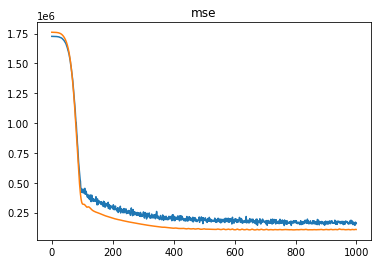

<Figure size 432x288 with 0 Axes>

In [293]:
# 평균 제곱 오차
mse     = history.history['mse']
val_mse = history.history['val_mse']

epochs   = range(len(mse)) # Get number of epochs

#------------------------------------------------
# 훈련 데이터, 검증 데이터에 대한 에포크당 mse
#------------------------------------------------
plt.plot  ( epochs,     mse )
plt.plot  ( epochs, val_mse )
plt.title ('mse')
plt.figure()


In [294]:
prediction = model.predict(x_test_np)

In [295]:
prediction.reshape(261)

array([1204.5571 , 1123.9313 ,  514.78375, 1133.1818 ,  868.5402 ,
       1100.4513 ,  752.89075,  324.24945, 1404.2513 ,  399.32562,
       2192.5254 ,  720.93036, 1493.9745 ,  637.69476, 1774.1285 ,
        994.00476, 1548.462  ,  909.9982 , 1069.5726 , 1655.9623 ,
       2041.9    ,  602.66016, 1280.3718 ,  300.51398,  998.98834,
        877.31396,  729.761  ,  685.9649 , 1125.6925 , 1113.4156 ,
        663.292  , 1433.7755 , 1436.7386 , 1004.07385, 1227.0171 ,
        817.96906,  623.2727 ,  479.73398, 1390.3524 ,  237.34708,
       1746.3799 ,  573.66766,  742.837  , 1921.3632 ,  704.1001 ,
       1261.7113 , 1745.0468 ,  346.24713, 1076.4479 , 1235.8182 ,
       1061.9519 ,  640.2365 ,  875.51715,  915.9259 ,  861.32733,
       1069.4095 ,  346.24713, 1052.3961 ,  920.0593 , 1133.1818 ,
       1484.9534 ,  976.1955 ,  364.2649 ,  786.5943 ,  283.9519 ,
       1766.9451 ,  499.06012, 1044.1869 , 1215.3701 , 2657.1533 ,
       2903.728  , 1072.6582 ,  536.7324 ,  860.8576 ,  363.43

In [170]:
test_for_product = pd.read_csv('/Users/minguinho/Documents/인공지능 대회 데이터/쿠아이 노트북 가격 예측/Adv_IMC_test.csv')

predict_toCsv = {"Product": test_for_product['Product'], "Price": prediction}

In [171]:
#csv파일 생성
submission = pd.DataFrame()

submission['Product'] = 0
submission['Price'] = 0

submission['Product'] = predict_toCsv["Product"]
submission['Price'] = predict_toCsv["Price"]

In [172]:
submission.to_csv('김민규_Adv_price.csv', index=False) # 파일 저장